## Scrub

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

df = pd.read_csv('../dsc-phase-2-project/data/kc_house_data.csv', thousands=r',')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503

In [2]:
# Date should be a datetime object
# Sftft_basement contains strings

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
# id isn't truly an int
# price has a very large SD and outliers
# it seems that there may be a couple of outlier values driving up the max across columns
# floors, waterfront, view, condition, and grade are ordinal categorical values
# zipcode, lat, long isn't truly an int
# waterfront may be a binary variable
# year renovated contains null values, probably due to homes that have not yet been renovated

df.describe()

id      price  bedrooms  bathrooms  sqft_living   sqft_lot  \
count      21597.00   21597.00  21597.00   21597.00     21597.00   21597.00   
mean  4580474287.77  540296.57      3.37       2.12      2080.32   15099.41   
std   2876735715.75  367368.14      0.93       0.77       918.11   41412.64   
min      1000102.00   78000.00      1.00       0.50       370.00     520.00   
25%   2123049175.00  322000.00      3.00       1.75      1430.00    5040.00   
50%   3904930410.00  450000.00      3.00       2.25      1910.00    7618.00   
75%   7308900490.00  645000.00      4.00       2.50      2550.00   10685.00   
max   9900000190.00 7700000.00     33.00       8.00     13540.00 1651359.00   

        floors  waterfront     view  condition    grade  sqft_above  yr_built  \
count 21597.00    19221.00 21534.00   21597.00 21597.00    21597.00  21597.00   
mean      1.49        0.01     0.23       3.41     7.66     1788.60   1971.00   
std       0.54        0.09     0.77       0.65     1.17      827.76     29.38   
min       1.00        0.00     0.00       1.00     3.00      370.00   1900.00   
25%       1.00        0.00     0.00       3.00     7.00     1190.00   1951.00   
50%       1.50        0.00     0.00       3.00     7.00     1560.00   1975.00   
75%       2.00        0.00     0.00       4.00     8.00     2210.00   1997.00   
max       3.50        1.00     4.00       5.00    13.00     9410.00   2015.00   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
count      17755.00 21597.00 21597.00 21597.00       21597.00    21597.00  
mean          83.64 98077.95    47.56  -122.21        1986.62    12758.28  
std          399.95    53.51     0.14     0.14         685.23    27274.44  
min            0.00 98001.00    47.16  -122.52         399.00      651.00  
25%            0.00 98033.00    47.47  -122.33        1490.00     5100.00  
50%            0.00 98065.00    47.57  -122.23        1840.00     7620.00  
75%            0.00 98118.00    47.68  -122.12        2360.00    10083.00  
max         2015.00 98199.00    47.78  -121.31        6210.00   871200.00

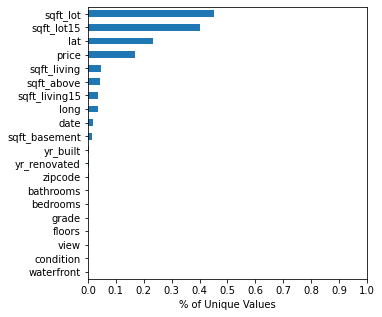

In [5]:
# Show the proportion of unique values per column

# Bathrooms, bedrooms, grade, floors, view, condition, and waterfront to have a very small number 
# of unique values. They may be categorical/ordinal
# Zipcode, year renovated, year built, basement, sqft living, sqft above, sqft living15 are all below 10%

nu_dict = dict(df.nunique())
val_list = list(nu_dict.values())

percent = []
for col, val in zip(df.columns, val_list):
    percent.append(val/len(df[col]))  
unique_per_column = pd.Series(data=percent, index=df.columns)
unique_per_column.drop('id').sort_values(ascending=True).plot(kind='barh', figsize=(5,5), xticks=np.linspace(0,1,11))
plt.xlabel('% of Unique Values');

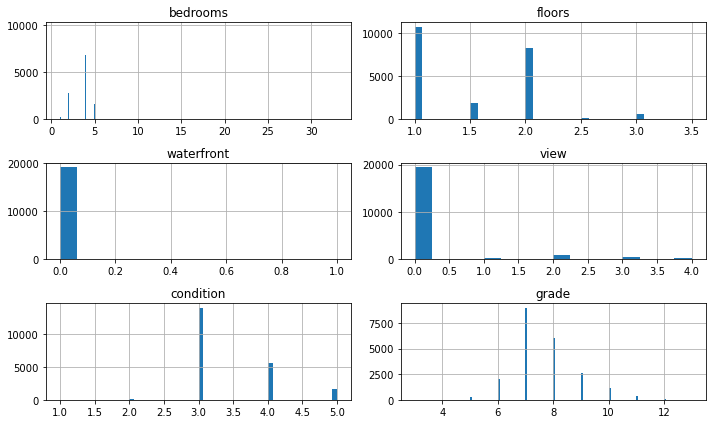

In [6]:
# It appears all but waterfront are categorical variables with ordinal values
# Waterfront is the only binary variable

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

low_nunique = []
for k,v in nu_dict.items():
    if v < 15:
        low_nunique.append(k)
    else:
        pass
low_nunique

df[low_nunique].hist(figsize=(10,6), bins='auto');
plt.tight_layout();

### Fill in missing values

<AxesSubplot:>

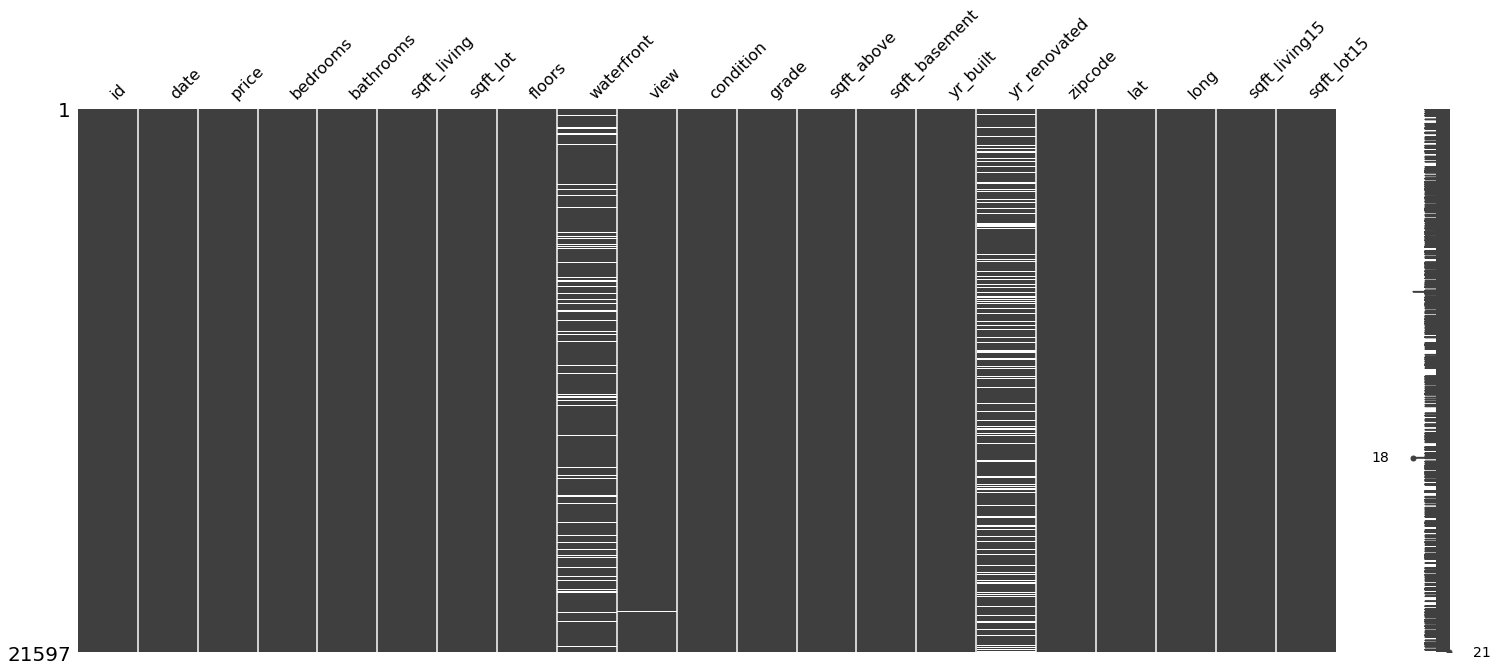

In [7]:
# Start checking for null values
# Waterfront, view, and yr_renovated are the only columns with missing data

import missingno
missingno.matrix(df)

In [8]:
null = df.isna().sum()
null[null>1]

waterfront      2376
view              63
yr_renovated    3842
dtype: int64

In [9]:
# No recognizable pattern for why certain view values are missing

print(df['view'].value_counts(1, dropna=False))
df[df['view'].isnull()]

0.00   0.90
2.00   0.04
3.00   0.02
1.00   0.02
4.00   0.01
nan    0.00
Name: view, dtype: float64


id       date      price  bedrooms  bathrooms  sqft_living  \
7      2008000270 2015-01-15  291850.00         3       1.50         1060   
114    8961960160 2014-10-28  480000.00         4       2.50         3230   
129    7853210060 2015-04-06  430000.00         4       2.50         2070   
205    3456000310 2014-08-04  840000.00         4       1.75         2480   
487    1895000260 2014-07-21  207950.00         2       2.00          890   
...           ...        ...        ...       ...        ...          ...   
19989   148000475 2014-05-28 1400000.00         4       3.25         4700   
20148   291310170 2014-08-04  384500.00         3       2.50         1600   
20380  1196003740 2014-09-24  734000.00         5       4.25         4110   
21057  3448900290 2014-08-28  636230.00         4       2.50         2840   
21589  3448900210 2014-10-14  610685.00         4       2.50         2520   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
7          9711    1.00        0.00   nan          3      7        1060   
114       16171    2.00        0.00   nan          3      9        2520   
129        4310    2.00        0.00   nan          3      7        2070   
205       11010    1.00        0.00   nan          4      9        1630   
487        5000    1.00        0.00   nan          3      6         890   
...         ...     ...         ...   ...        ...    ...         ...   
19989      9160    1.00        0.00   nan          3     11        2520   
20148      2610    2.00        0.00   nan          3      8        1600   
20380     42755    2.00        0.00   nan          3     10        2970   
21057      6284    2.00        0.00   nan          3      9        2840   
21589      6023    2.00        0.00   nan          3      9        2520   

      sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
7               0.0      1963          0.00    98198 47.41 -122.31   
114           710.0      2001          0.00    98001 47.32 -122.25   
129             0.0      2004          0.00    98065 47.53 -121.85   
205           850.0      1966           nan    98040 47.54 -122.22   
487             0.0      1917          0.00    98118 47.52 -122.26   
...             ...       ...           ...      ...   ...     ...   
19989        2180.0      2005          0.00    98116 47.57 -122.41   
20148           0.0      2005           nan    98027 47.53 -122.07   
20380        1140.0      2000           nan    98023 47.34 -122.34   
21057           0.0      2013          0.00    98056 47.51 -122.17   
21589           0.0      2014          0.00    98056 47.51 -122.17   

       sqft_living15  sqft_lot15  
7               1650        9711  
114             2640        8517  
129             1970        3748  
205             2770       10744  
487             1860        5000  
...              ...         ...  
19989           2240        8700  
20148           1445        1288  
20380           2730       12750  
21057           2790        7168  
21589           2520        6023  

[63 rows x 21 columns]

In [10]:
# Going to assume null value represents a home that has never been renovated

print(df['yr_renovated'].value_counts(1, dropna=False))
df[df['yr_renovated'].isnull()]

0.00      0.79
nan       0.18
2014.00   0.00
2003.00   0.00
2013.00   0.00
          ... 
1944.00   0.00
1948.00   0.00
1976.00   0.00
1934.00   0.00
1953.00   0.00
Name: yr_renovated, Length: 71, dtype: float64


id       date      price  bedrooms  bathrooms  sqft_living  \
2      5631500400 2015-02-25  180000.00         2       1.00          770   
12      114101516 2014-05-28  310000.00         3       1.00         1430   
23     8091400200 2014-05-16  252700.00         2       1.50         1070   
26     1794500383 2014-06-26  937000.00         3       1.75         2450   
28     5101402488 2014-06-24  438000.00         3       1.75         1520   
...           ...        ...        ...       ...        ...          ...   
21576  1931300412 2015-04-16  475000.00         3       2.25         1190   
21577  8672200110 2015-03-17 1090000.00         5       3.75         4170   
21579  1972201967 2014-10-31  520000.00         2       2.25         1530   
21581   191100405 2015-04-21 1580000.00         4       3.25         3410   
21583  7202300110 2014-09-15  810000.00         4       3.00         3990   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2         10000    1.00        0.00  0.00          3      6         770   
12        19901    1.50        0.00  0.00          4      7        1430   
23         9643    1.00         nan  0.00          3      7        1070   
26         2691    2.00        0.00  0.00          3      8        1750   
28         6380    1.00        0.00  0.00          3      7         790   
...         ...     ...         ...   ...        ...    ...         ...   
21576      1200    3.00        0.00  0.00          3      8        1190   
21577      8142    2.00        0.00  2.00          3     10        4170   
21579       981    3.00        0.00  0.00          3      8        1480   
21581     10125    2.00        0.00  0.00          3     10        3410   
21583      7838    2.00        0.00  0.00          3      9        3990   

      sqft_basement  yr_built  yr_renovated  zipcode   lat    long  \
2               0.0      1933           nan    98028 47.74 -122.23   
12              0.0      1927           nan    98028 47.76 -122.23   
23              0.0      1985           nan    98030 47.35 -122.17   
26            700.0      1915           nan    98119 47.64 -122.36   
28            730.0      1948           nan    98115 47.70 -122.30   
...             ...       ...           ...      ...   ...     ...   
21576           0.0      2008           nan    98103 47.65 -122.35   
21577           0.0      2006           nan    98056 47.54 -122.18   
21579          50.0      2006           nan    98103 47.65 -122.35   
21581             ?      2007           nan    98040 47.57 -122.22   
21583           0.0      2003           nan    98053 47.69 -122.05   

       sqft_living15  sqft_lot15  
2               2720        8062  
12              1780       12697  
23              1220        8386  
26              1760        3573  
28              1520        6235  
...              ...         ...  
21576           1180        1224  
21577           3030        7980  
21579           1530        1282  
21581           2290       10125  
21583           3370        6814  

[3842 rows x 21 columns]

In [11]:
# Handle waterfront null values
# Check if it can be explained by location

print('Has view of water (Latitude)')
print(df[df['waterfront']==1.0]['lat'].describe())
print('------------------------------------------')
print('Does not have view of water (Latitude)')
print(df[df['waterfront']==0.0]['lat'].describe())
print('------------------------------------------')
print('Has view of water (Price)')
print(df[df['waterfront']==1.0]['price'].describe())
print('------------------------------------------')
print('Does not have view of water')
print(df[df['waterfront']==0.0]['price'].describe())

Has view of water (Latitude)
count   146.00
mean     47.54
std       0.11
min      47.33
25%      47.45
50%      47.55
75%      47.61
max      47.77
Name: lat, dtype: float64
------------------------------------------
Does not have view of water (Latitude)
count   19075.00
mean       47.56
std         0.14
min        47.16
25%        47.47
50%        47.57
75%        47.68
max        47.78
Name: lat, dtype: float64
------------------------------------------
Has view of water (Price)
count       146.00
mean    1717214.73
std     1145384.86
min      285000.00
25%      827500.00
50%     1510000.00
75%     2282500.00
max     7060000.00
Name: price, dtype: float64
------------------------------------------
Does not have view of water
count     19075.00
mean     532641.99
std      344959.18
min       78000.00
25%      320000.00
50%      450000.00
75%      638600.00
max     7700000.00
Name: price, dtype: float64


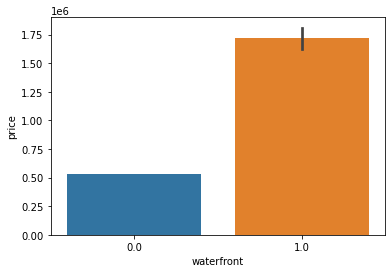

In [12]:
# Clearly waterfront homes are much more expensive

sns.barplot(data=df, x='waterfront', y='price', ci=68);

In [13]:
mplus_water =len(df[(df['price']>1000000) & df['waterfront']==1.0])
print(f'Number of houses over $1,000,000 with waterfront view:\t{mplus_water}')
mminus_water = len(df[(df['price']<1000000) & df['waterfront']==1.0])
print(f'Number of houses under $1,000,000 with waterfront view:\t{mminus_water}')

Number of houses over $1,000,000 with waterfront view:	96
Number of houses under $1,000,000 with waterfront view:	49


In [14]:
# Going to impute categorical variables the probability that they appear in the dataset
# Begin with waterfront and functionize

# Prior count below:
# 0.00    19075
# 1.00      146
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# Prob of having waterfront view for homes over $1,000,000
print('$1M+ with waterfront');
print(df.loc[df['price']>1000000]['waterfront'].value_counts(1));
print('------------------------------------------')
# Prob of having waterfront view for homes under $1,000,000
print('$1M- with waterfront');
print(df.loc[df['price']<1000000]['waterfront'].value_counts(1))

$1M+ with waterfront
0.00000   0.92666
1.00000   0.07334
Name: waterfront, dtype: float64
------------------------------------------
$1M- with waterfront
0.00000   0.99726
1.00000   0.00274
Name: waterfront, dtype: float64


In [15]:
def impute_cat(df, col):
    '''
    Impute null value with value based on liklihood
    of occurring in the original column
    '''
    val_prob = dict(df[col].value_counts(1))
    prob = list(val_prob.values())
    val = list(val_prob.keys())
    np.random.choice(val, p=prob)
    df[col].fillna(np.random.choice(val, p=prob), inplace=True)
    return df

In [16]:
# Handling question mark as null value

df['sqft_basement'].replace(to_replace='?', value='0.0',inplace=True)
s = df['sqft_basement']
pd.to_numeric(s, downcast='integer')

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement, Length: 21597, dtype: int16

In [17]:
df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
2240.0        1
3480.0        1
1798.0        1
243.0         1
417.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [18]:
df['basementyes'] = (df['sqft_basement']!='0.0').map({True:1,
                                                      False: 0})

In [19]:
df['basementyes'].value_counts(1)

0   0.61490
1   0.38510
Name: basementyes, dtype: float64

In [20]:
df_1mplus=df.loc[df['price']>1000000]
df_1mminus=df.loc[df['price']<1000000]

In [21]:
df_1mplus =impute_cat(df_1mplus, 'waterfront')

/Users/ethankunin/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [22]:
df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)

<ipython-input-22-d246c886c934>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1mminus['waterfront'] =df_1mminus['waterfront'].fillna(0)


In [23]:
df=pd.concat([df_1mminus, df_1mplus])

In [24]:
# Quality of the view from the home based on scale of 1-4

impute_cat(df, 'view')

id       date         price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.00000         3    1.00000         1180   
1      6414100192 2014-12-09  538000.00000         3    2.25000         2570   
2      5631500400 2015-02-25  180000.00000         2    1.00000          770   
3      2487200875 2014-12-09  604000.00000         4    3.00000         1960   
4      1954400510 2015-02-18  510000.00000         3    2.00000         1680   
...           ...        ...           ...       ...        ...          ...   
21574  7430200100 2014-05-14 1220000.00000         4    3.50000         4910   
21577  8672200110 2015-03-17 1090000.00000         5    3.75000         4170   
21581   191100405 2015-04-21 1580000.00000         4    3.25000         3410   
21584   249000205 2014-10-15 1540000.00000         5    3.75000         4470   
21590  7936000429 2015-03-26 1010000.00000         4    3.50000         3510   

       sqft_lot  floors  waterfront    view  condition  grade  sqft_above  \
0          5650 1.00000     0.00000 0.00000          3      7        1180   
1          7242 2.00000     0.00000 0.00000          3      7        2170   
2         10000 1.00000     0.00000 0.00000          3      6         770   
3          5000 1.00000     0.00000 0.00000          5      7        1050   
4          8080 1.00000     0.00000 0.00000          3      8        1680   
...         ...     ...         ...     ...        ...    ...         ...   
21574      9444 1.50000     0.00000 0.00000          3     11        3110   
21577      8142 2.00000     0.00000 2.00000          3     10        4170   
21581     10125 2.00000     0.00000 0.00000          3     10        3410   
21584      8088 2.00000     0.00000 0.00000          3     11        4470   
21590      7200 2.00000     0.00000 0.00000          3      9        2600   

      sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
0               0.0      1955       0.00000    98178 47.51120 -122.25700   
1             400.0      1951    1991.00000    98125 47.72100 -122.31900   
2               0.0      1933           nan    98028 47.73790 -122.23300   
3             910.0      1965       0.00000    98136 47.52080 -122.39300   
4               0.0      1987       0.00000    98074 47.61680 -122.04500   
...             ...       ...           ...      ...      ...        ...   
21574        1800.0      2007       0.00000    98074 47.65020 -122.06600   
21577           0.0      2006           nan    98056 47.53540 -122.18100   
21581           0.0      2007           nan    98040 47.56530 -122.22300   
21584           0.0      2008       0.00000    98004 47.63210 -122.20000   
21590         910.0      2009       0.00000    98136 47.55370 -122.39800   

       sqft_living15  sqft_lot15  basementyes  
0               1340        5650            0  
1               1690        7639            1  
2               2720        8062            0  
3               1360        5000            1  
4               1800        7503            0  
...              ...         ...          ...  
21574           4560       11063            1  
21577           3030        7980            0  
21581           2290       10125            0  
21584           2780        8964            0  
21590           2050        6200            1  

[21565 rows x 22 columns]

In [25]:
# Consider 0 to mean the home has not been renovated
# Conservativley determined null values should be considered non-renovated homes

df['yr_renovated'].value_counts().sort_values(ascending=False).nlargest(30)

0.00000       16988
2014.00000       73
2003.00000       31
2013.00000       31
2007.00000       30
2000.00000       29
2005.00000       29
1990.00000       22
2004.00000       22
2009.00000       21
1989.00000       20
2006.00000       20
2002.00000       17
1998.00000       16
1984.00000       16
2010.00000       15
1983.00000       15
2001.00000       15
1999.00000       15
2008.00000       15
1991.00000       15
2015.00000       14
1985.00000       14
1986.00000       14
1987.00000       14
1994.00000       14
1992.00000       13
1993.00000       12
1997.00000       12
1995.00000       12
Name: yr_renovated, dtype: int64

In [26]:
# No null values remaining

df['yr_renovated'].fillna(0, inplace=True)

### Handle Duplicates

In [27]:
# I found duplicates in the id column. I interpreted them as changes in ownership because the characterestics
# were the same outside of the date. I decided to keep 'last' because that reflects the most recent listing

pd.set_option('display.max_rows', 500)

df[df.duplicated(subset=['id'],keep=False)]
df=df.drop_duplicates(subset=['id'], keep='last')

In [28]:
# df.sort_values(by='total_rooms', ascending=False)
## 33 bedrooms, believed to be human error because it did not correspond with sqft living
df=df.drop(15856)

## Baseline Model

In [29]:
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf

from scipy import stats
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

In [30]:
def model_summary(df, X_targets, y, qq=True):
    '''
    Produces OLS Linear Regression summary. True/False toggles if the QQ
    plot is displayed below the summary
    '''
    outcome = y
    x_cols = X_targets
    predictors = '+'.join(x_cols)
    formula = outcome + '~' + predictors
    model = ols(formula=formula, data=df).fit()
    resid1 = model.resid
    display(model.summary())
    if qq==True:
        
        sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True);
    
    return model

In [31]:

x_baseline = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basementyes']


In [32]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


def sked_show(df, X_cols, lr=None, val='price'):
    '''
    Produces scatter plot showing measue of homoskedacicity
    '''
    if lr is None:
        lr = LinearRegression()
        lr.fit(df[X_cols], df[val])

        y_hat = lr.predict(df[X_cols])
    else:
        y_hat = lr.predict(df)

    
    resid = (df[val] - y_hat)
    fig, ax= plt.subplots(figsize=(5,5))
    ax.scatter(x=y_hat,y=resid, alpha=0.1)
    ax.axhline(0, color='red')
    ax.set_xlabel('Price')
    ax.set_ylabel('Residual')
    return fig,ax

In [33]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2773.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:29:39   Log-Likelihood:            -2.9152e+05
No. Observations:               21387   AIC:                         5.831e+05
Df Residuals:                   21368   BIC:                         5.832e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.706e+06   2.96e+06      2.265      0.024    9.02e+05    1.25e+07
bedrooms      -3.948e+04   1995.040    -19.790      0.000   -4.34e+04   -3.56e+04
bathrooms      4.396e+04   3311.533     13.276      0.000    3.75e+04    5.05e+04
sqft_living     153.9370      6.047     25.455      0.000     142.084     165.790
sqft_lot          0.1241      0.048      2.587      0.010       0.030       0.218
floors         6198.9228   3615.370      1.715      0.086    -887.474    1.33e+04
waterfront     6.214e+05   1.82e+04     34.159      0.000    5.86e+05    6.57e+05
view           5.271e+04   2117.878     24.888      0.000    4.86e+04    5.69e+04
condition      2.633e+04   2366.643     11.127      0.000    2.17e+04     3.1e+04
grade          9.643e+04   2179.377     44.245      0.000    9.22e+04    1.01e+05
sqft_above       28.3925      6.608      4.296      0.000      15.440      41.345
yr_built      -2657.5678     72.361    -36.727      0.000   -2799.401   -2515.735
yr_renovated     23.8560      3.995      5.971      0.000      16.025      31.687
zipcode        -584.6527     33.218    -17.601      0.000    -649.762    -519.544
lat            6.008e+05   1.08e+04     55.684      0.000     5.8e+05    6.22e+05
long          -2.178e+05   1.32e+04    -16.442      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.2177      3.464      6.125      0.000      14.428      28.007
sqft_lot15       -0.3956      0.073     -5.388      0.000      -0.540      -0.252
basementyes   -2959.0642   5095.821     -0.581      0.561   -1.29e+04    7029.128
==============================================================================
Omnibus:                    18085.326   Durbin-Watson:                   1.620
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1787804.900
Skew:                           3.540   Prob(JB):                         0.00
Kurtosis:                      47.228   Cond. No.                     2.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

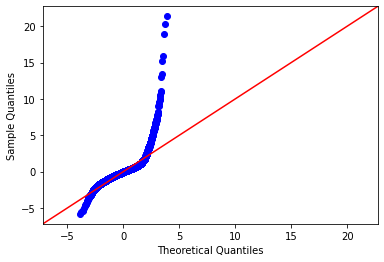

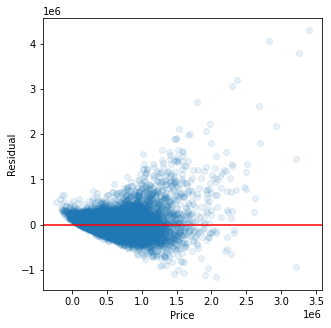

In [34]:
model_base = model_summary(df, x_baseline, 'price')
sked_show(df, x_baseline, model_base)

### Baseline Model Conclusion
- R^2 is 0.70
- QQ Plot deviates significantly around the 3rd quantile
- Floors and basement are not statistically significant
- Residuals trail off around $1.5 million, begins to become cone shaped
- Model not meet assumption of homoscedasticity

## EDA/New Feature Model

In [35]:
def distr_(df, col):
    fig, ax = plt.subplots(figsize=(8,7), nrows=3, gridspec_kw={'height_ratios': [2,1,4]});
    mean=df[col].mean()
    median=df[col].median()
    max_=df[col].max()
    min_=df[col].min()
    std_=df[col].std()
    sns.histplot(df[col],alpha=0.5,stat='density',ax=ax[0]);
    sns.kdeplot(df[col],color='green',ax=ax[0]);
    ax[0].set_xlabel(col)
    ax[0].set_title(f'{col} Distribution')
    ax[0].axvline(mean, label=f'Mean: {mean}', c='red')
    ax[0].axvline(median, label=f'median: {median}', c='red', linestyle=':')
    ax[0].legend()
    
    sns.boxplot(data=df, x=col, ax=ax[1]);
    
    sns.scatterplot(data=df, x=df[col], y=df['price']);
    
    fig.tight_layout();
    print(f'{col.capitalize()} Summary')
    print(f'Median: {median}')
    print(f'Mean: {mean:.4}')
    print(f'Max: {max_}')
    print(f'Min: {min_}')
    print(f'Std: {std_:.4}')
    plt.show()


Price Summary
Median: 450000.0
Mean: 5.412e+05
Max: 7700000.0
Min: 78000.0
Std: 3.674e+05


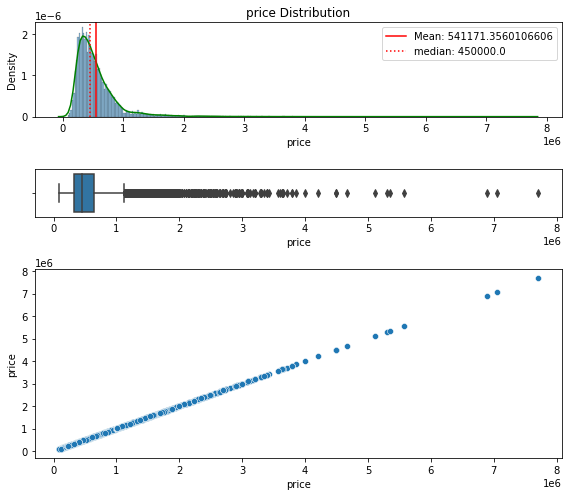

None
---------------------------------------------------------------------------------------
Bedrooms Summary
Median: 3.0
Mean: 3.372
Max: 11
Min: 1
Std: 0.9028


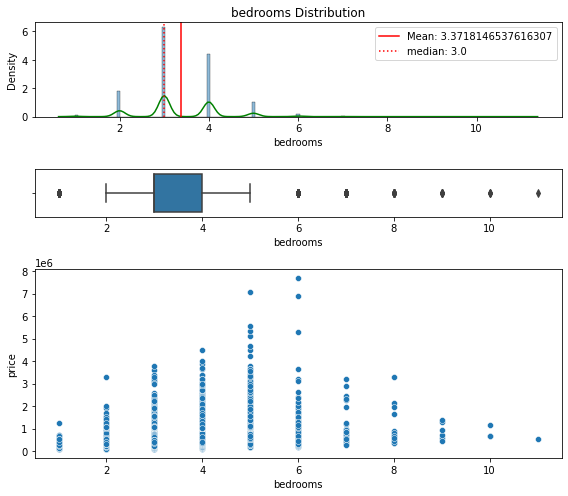

None
---------------------------------------------------------------------------------------
Bathrooms Summary
Median: 2.25
Mean: 2.118
Max: 8.0
Min: 0.5
Std: 0.7685


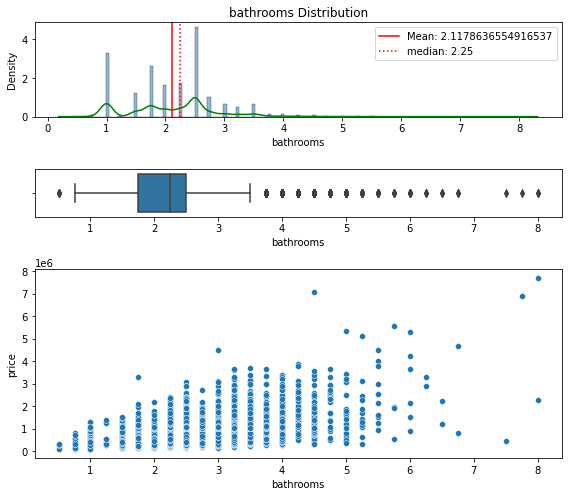

None
---------------------------------------------------------------------------------------
Sqft_living Summary
Median: 1920.0
Mean: 2.082e+03
Max: 13540
Min: 370
Std: 918.7


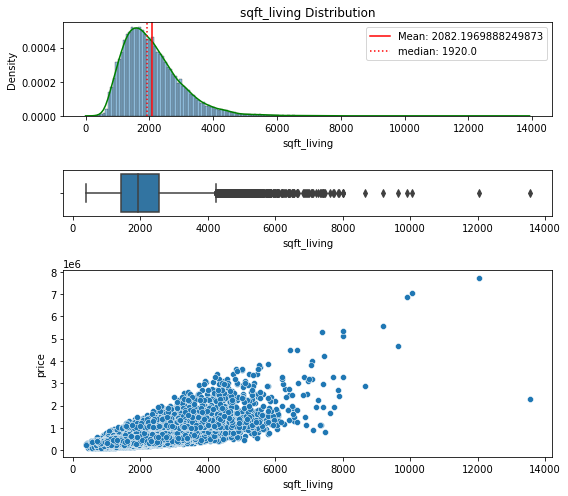

None
---------------------------------------------------------------------------------------
Sqft_lot Summary
Median: 7610.0
Mean: 1.513e+04
Max: 1651359
Min: 520
Std: 4.156e+04


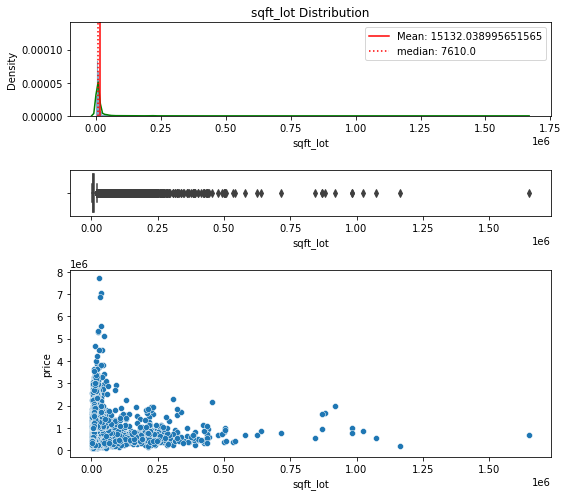

None
---------------------------------------------------------------------------------------
Floors Summary
Median: 1.5
Mean: 1.496
Max: 3.5
Min: 1.0
Std: 0.54


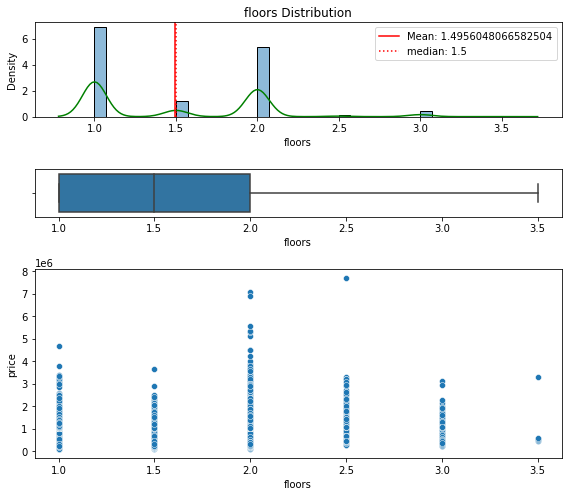

None
---------------------------------------------------------------------------------------
Waterfront Summary
Median: 0.0
Mean: 0.00678
Max: 1.0
Min: 0.0
Std: 0.08206


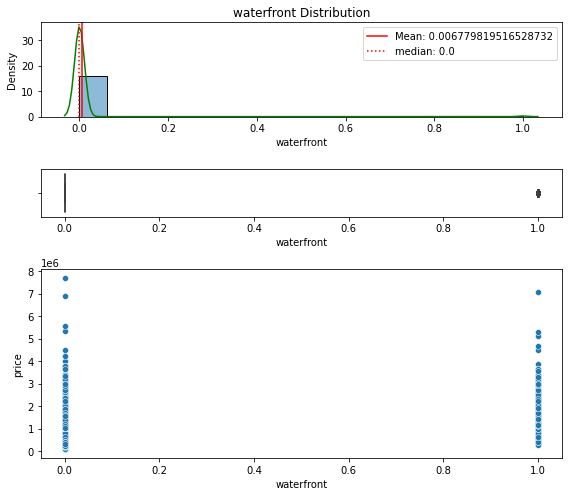

None
---------------------------------------------------------------------------------------
View Summary
Median: 0.0
Mean: 0.2391
Max: 4.0
Min: 0.0
Std: 0.7698


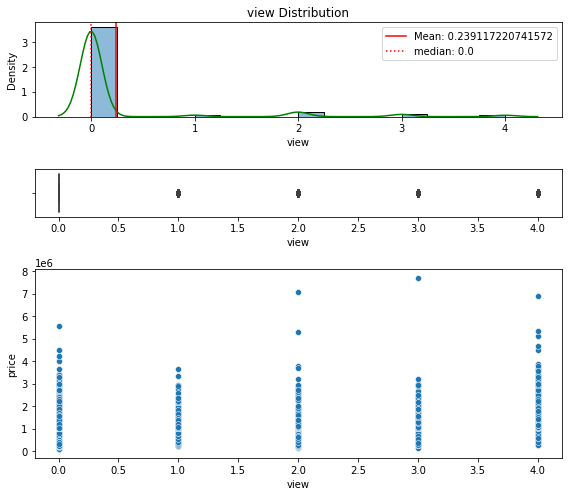

None
---------------------------------------------------------------------------------------
Condition Summary
Median: 3.0
Mean: 3.41
Max: 5
Min: 1
Std: 0.6495


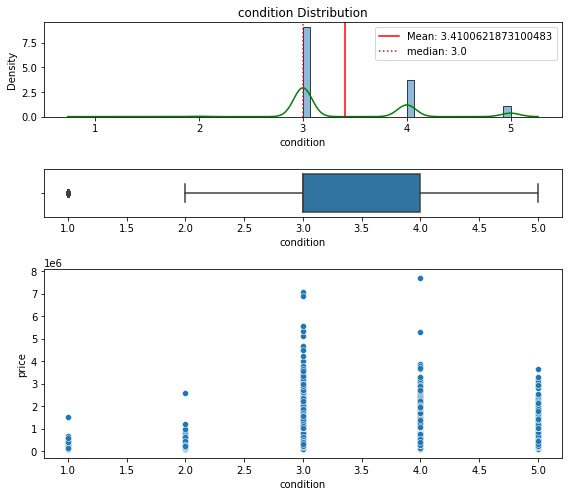

None
---------------------------------------------------------------------------------------
Grade Summary
Median: 7.0
Mean: 7.661
Max: 13
Min: 3
Std: 1.171


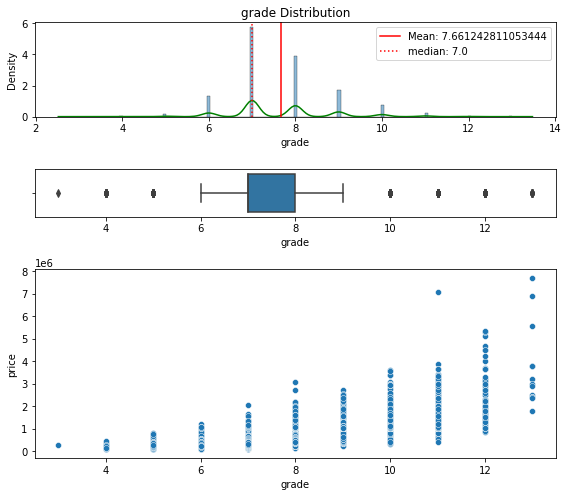

None
---------------------------------------------------------------------------------------
Sqft_above Summary
Median: 1560.0
Mean: 1.79e+03
Max: 9410
Min: 370
Std: 828.6


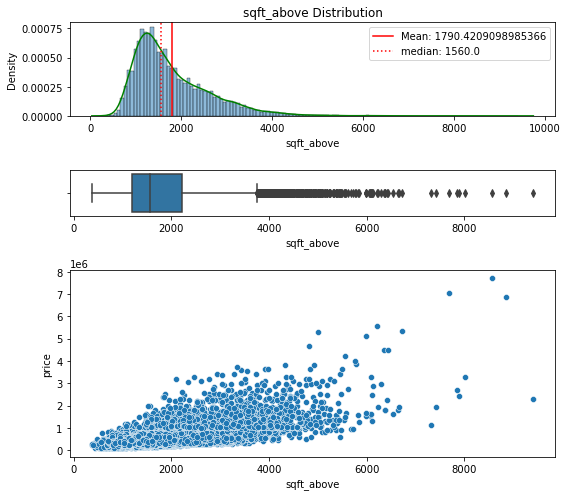

None
---------------------------------------------------------------------------------------
Yr_built Summary
Median: 1975.0
Mean: 1.971e+03
Max: 2015
Min: 1900
Std: 29.37


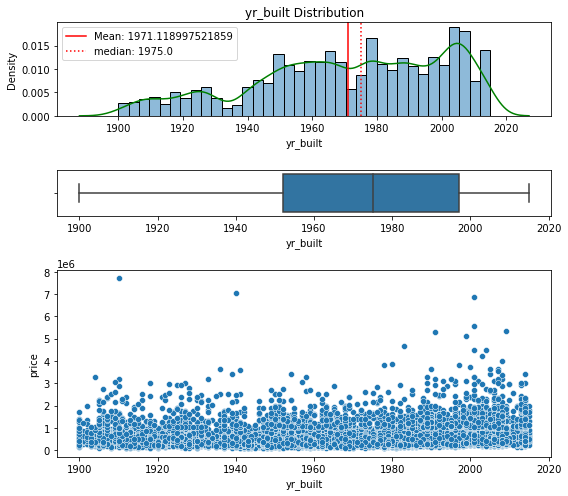

None
---------------------------------------------------------------------------------------
Yr_renovated Summary
Median: 0.0
Mean: 68.88
Max: 2015.0
Min: 0.0
Std: 364.4


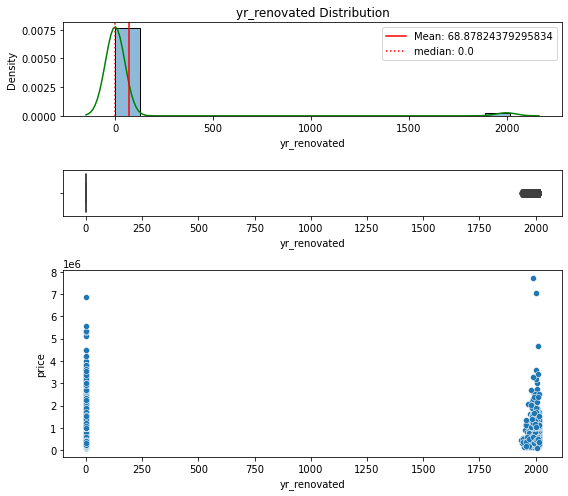

None
---------------------------------------------------------------------------------------
Zipcode Summary
Median: 98065.0
Mean: 9.808e+04
Max: 98199
Min: 98001
Std: 53.48


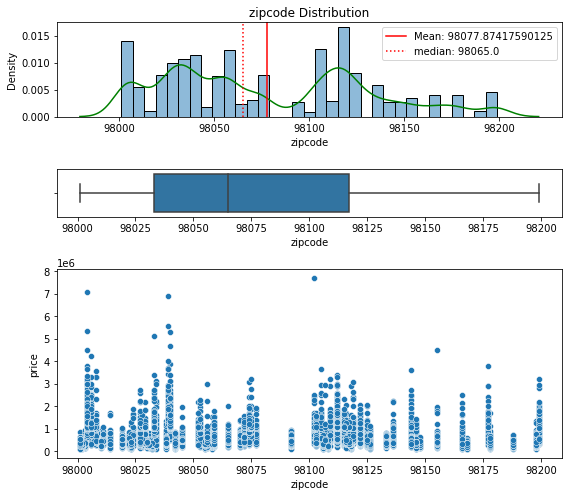

None
---------------------------------------------------------------------------------------
Sqft_living15 Summary
Median: 1840.0
Mean: 1.988e+03
Max: 6210
Min: 399
Std: 685.4


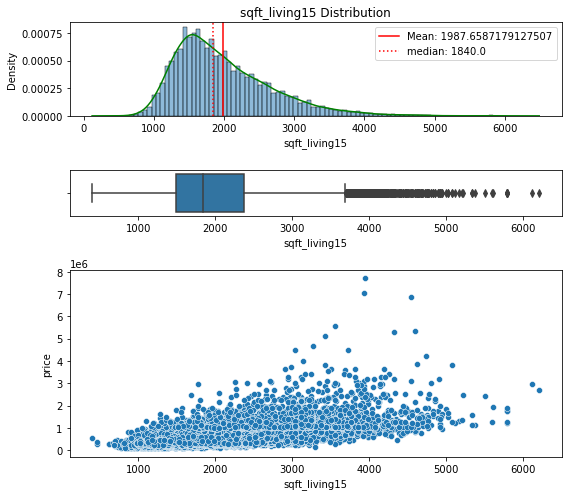

None
---------------------------------------------------------------------------------------
Sqft_lot15 Summary
Median: 7620.0
Mean: 1.278e+04
Max: 871200
Min: 651
Std: 2.736e+04


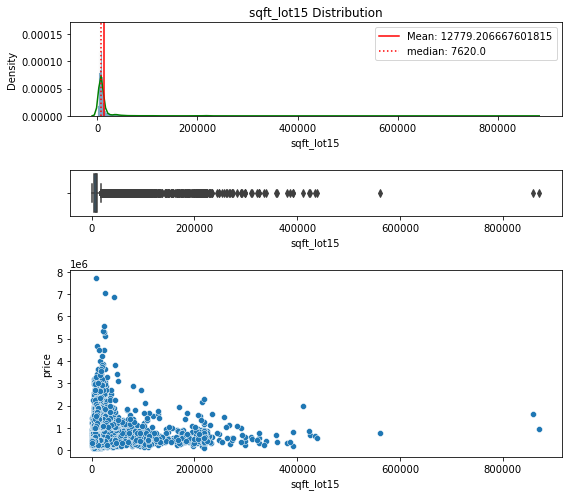

None
---------------------------------------------------------------------------------------
Basementyes Summary
Median: 0.0
Mean: 0.385
Max: 1
Min: 0
Std: 0.4866


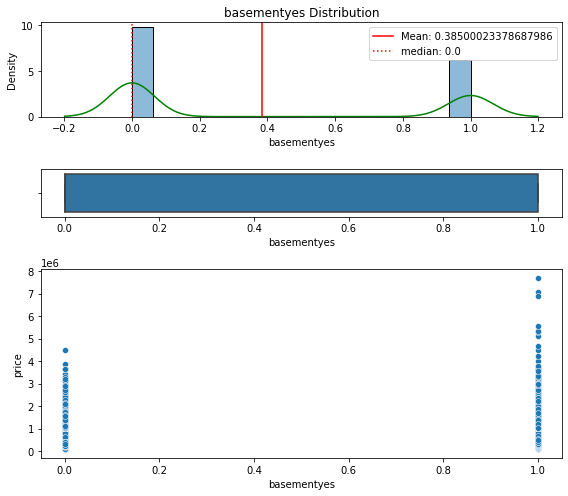

None
---------------------------------------------------------------------------------------


In [36]:
eda_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode',
       'sqft_living15', 'sqft_lot15', 'basementyes']
for col in eda_check:
    print(distr_(df, col))
    print('---------------------------------------------------------------------------------------')

EDA Results
- Price is right skewed
- Bedrooms increases up to 5/6 and then decreases
- Bathrooms increases with price
- Sqft living is right skewed and has a positive relationship with price
- Floors doesn't seem to have a relationship with price
- View doesn't seem to have a relationship with price
- Condition increases as price increases
- Grade increases as price increases
- Sqft above increases with price
- Year built doesn't have a relationship with price
- Year renovated looks equivalent
- Zipcode varies
- Sqft lot does not look linear

In [37]:
# Total rooms
# Addition, multiplication would create too large of a SD. ie (2 beds 1 bath=3, 4 beds 1 bath=5)
df['total_rooms'] = df['bedrooms']+df['bathrooms']

In [38]:
# Had erroniously stated 33 bedrooms and 1.5 bathrooms
# df=df.drop(15856)
df.sort_values(by='total_rooms', ascending=False)

id       date         price  bedrooms  bathrooms  sqft_living  \
8537    424049043 2014-08-11  450000.00000         9    7.50000         4050   
13301   627300145 2014-08-14 1150000.00000        10    5.25000         4590   
12764  1225069038 2014-05-05 2280000.00000         7    8.00000        13540   
8748   1773100755 2014-08-21  520000.00000        11    3.00000         3000   
7245   6762700020 2014-10-13 7700000.00000         6    8.00000        12050   
...           ...        ...           ...       ...        ...          ...   
1973   5101404170 2014-11-13  200000.00000         1    0.75000          680   
9811   3598600049 2015-04-24  224000.00000         1    0.75000          840   
8614   6303400395 2015-01-30  325000.00000         1    0.75000          410   
10469  7129304375 2014-07-14  202000.00000         1    0.75000          590   
11662  7987400316 2014-08-14  255000.00000         1    0.50000          880   

       sqft_lot  floors  waterfront    view  condition  grade  sqft_above  \
8537       6504 2.00000     0.00000 0.00000          3      7        4050   
13301     10920 1.00000     0.00000 2.00000          3      9        2500   
12764    307752 3.00000     0.00000 4.00000          3     12        9410   
8748       4960 2.00000     0.00000 0.00000          3      7        2400   
7245      27600 2.50000     0.00000 3.00000          4     13        8570   
...         ...     ...         ...     ...        ...    ...         ...   
1973       9600 1.00000     0.00000 0.00000          3      5         680   
9811       7203 1.50000     0.00000 0.00000          3      6         840   
8614       8636 1.00000     0.00000 0.00000          2      4         410   
10469      5650 1.00000     0.00000 0.00000          3      6         590   
11662      1642 1.00000     0.00000 0.00000          3      6         500   

      sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
8537            0.0      1996       0.00000    98144 47.59230 -122.30100   
13301        2090.0      2008       0.00000    98004 47.58610 -122.11300   
12764        4130.0      1999       0.00000    98053 47.66750 -121.98600   
8748          600.0      1918    1999.00000    98106 47.55600 -122.36300   
7245         3480.0      1910    1987.00000    98102 47.62980 -122.32300   
...             ...       ...           ...      ...      ...        ...   
1973            0.0      1947       0.00000    98115 47.69640 -122.30600   
9811            0.0      1949       0.00000    98168 47.47560 -122.30100   
8614            0.0      1953       0.00000    98146 47.50770 -122.35700   
10469           0.0      1944       0.00000    98118 47.51810 -122.26700   
11662         380.0      1910       0.00000    98126 47.57320 -122.37200   

       sqft_living15  sqft_lot15  basementyes  total_rooms  
8537            1448        3866            0     16.50000  
13301           2730       10400            1     15.25000  
12764           4850      217800            1     15.00000  
8748            1420        4960            1     14.00000  
7245            3940        8800            1     14.00000  
...              ...         ...          ...          ...  
1973            1580        6624            0      1.75000  
9811            1560        8603            0      1.75000  
8614            1190        8636            0      1.75000  
10469            980        5650            0      1.75000  
11662           1410        2992            1      1.50000  

[21387 rows x 23 columns]

Total_rooms Summary
Median: 5.5
Mean: 5.49
Max: 16.5
Min: 1.5
Std: 1.463


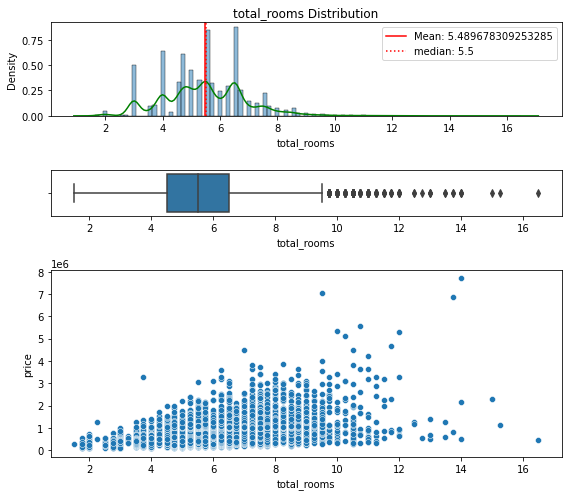

In [39]:
distr_(df, 'total_rooms')

In [40]:
# SQF vs. neighborhood average Living
df['living_vs_neighbor'] = df['sqft_living']/df['sqft_living15']

Living_vs_neighbor Summary
Median: 1.0
Mean: 1.054
Max: 6.0
Min: 0.1872791519434629
Std: 0.3203


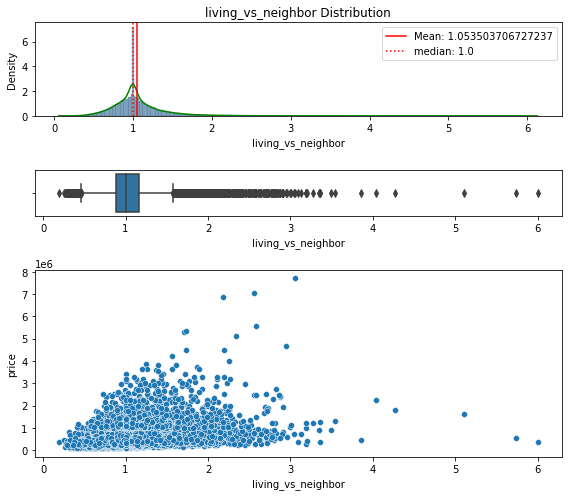

In [41]:
distr_(df, 'living_vs_neighbor')

In [42]:
df['lot_vs_neighbor'] = df['sqft_lot']/df['sqft_lot15']

Lot_vs_neighbor Summary
Median: 1.0
Mean: 1.134
Max: 87.52717948717948
Min: 0.054971997700810314
Std: 1.286


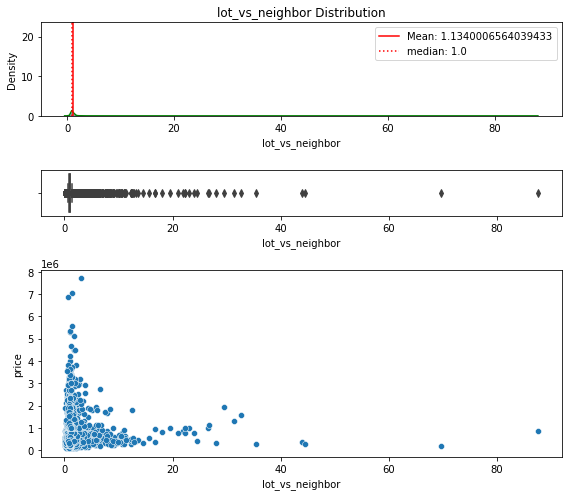

In [43]:
distr_(df, 'lot_vs_neighbor')

In [44]:
# SQF vs. lot size
df['live_lot'] = df['sqft_living']/df['sqft_lot']

Live_lot Summary
Median: 0.248
Mean: 0.3244
Max: 4.653846153846154
Min: 0.0006095498431482305
Std: 0.2692


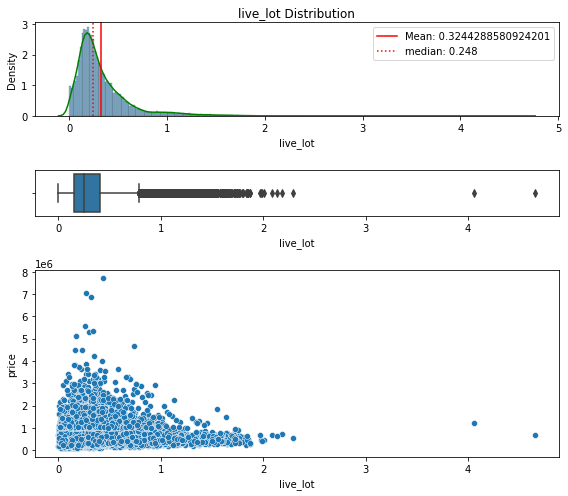

In [45]:
distr_(df, 'live_lot')

In [46]:
df['renovated_yes'] = (df['yr_renovated']!=0).map({True:1,
                                                   False: 0})
df['renovated_yes'].value_counts(1)

0   0.96549
1   0.03451
Name: renovated_yes, dtype: float64

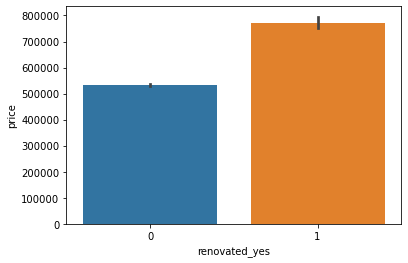

Has had renovation mean price: 770466.14
Has NOT had renovation mean price: 532976.31


In [47]:
# Homes that have been renovated have greater mean price

sns.barplot(data=df, x='renovated_yes', y='price', ci=68);
plt.show()
print(f"Has had renovation mean price: {round(df[df['renovated_yes']==1]['price'].mean(),2)}")
print(f"Has NOT had renovation mean price: {round(df[df['renovated_yes']==0]['price'].mean(),2)}")

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2615.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:04   Log-Likelihood:            -2.9117e+05
No. Observations:               21387   AIC:                         5.824e+05
Df Residuals:                   21366   BIC:                         5.825e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.449e+07   2.95e+06      4.910      0.000     8.7e+06    2.03e+07
bedrooms           -3.557e+04   1865.864    -19.061      0.000   -3.92e+04   -3.19e+04
bathrooms           4.073e+04   2380.995     17.107      0.000    3.61e+04    4.54e+04
sqft_living          279.4816      7.980     35.024      0.000     263.841     295.122
sqft_lot               0.1747      0.061      2.885      0.004       0.056       0.293
floors             -2.201e+04   4272.907     -5.150      0.000   -3.04e+04   -1.36e+04
waterfront          6.246e+05   1.79e+04     34.879      0.000    5.89e+05     6.6e+05
view                5.296e+04   2083.189     25.423      0.000    4.89e+04     5.7e+04
condition           2.584e+04   2301.828     11.224      0.000    2.13e+04    3.03e+04
grade               9.668e+04   2146.707     45.038      0.000    9.25e+04    1.01e+05
sqft_above            48.1902      6.555      7.352      0.000      35.342      61.038
yr_built           -2945.2055     69.081    -42.634      0.000   -3080.610   -2809.801
sqft_living15       -129.8898      7.325    -17.733      0.000    -144.247    -115.532
sqft_lot15            -0.2132      0.084     -2.526      0.012      -0.379      -0.048
basementyes        -1708.1717   5109.098     -0.334      0.738   -1.17e+04    8306.044
zipcode             -607.0607     32.742    -18.541      0.000    -671.238    -542.883
lat                 5.837e+05   1.07e+04     54.760      0.000    5.63e+05    6.05e+05
long               -1.857e+05   1.31e+04    -14.131      0.000   -2.12e+05    -1.6e+05
total_rooms         5167.1803   1157.147      4.465      0.000    2899.086    7435.275
living_vs_neighbor -2.949e+05   1.23e+04    -24.050      0.000   -3.19e+05   -2.71e+05
lot_vs_neighbor     -726.5435   1374.074     -0.529      0.597   -3419.832    1966.745
live_lot            1.022e+05   7652.096     13.358      0.000    8.72e+04    1.17e+05
==============================================================================
Omnibus:                    16189.098   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1091062.914
Skew:                           3.067   Prob(JB):                         0.00
Kurtosis:                      37.449   Cond. No.                     4.73e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.7e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

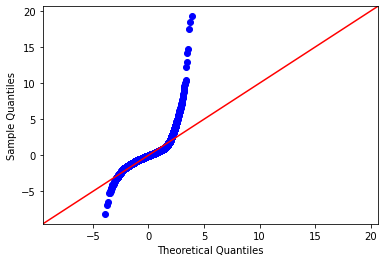

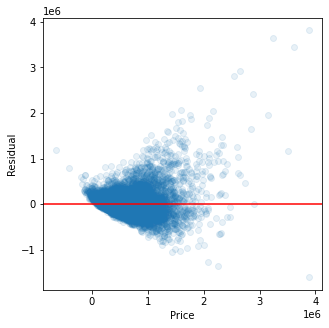

In [48]:
X_feats = ['bedrooms', 'bathrooms', 'sqft_living',
           'sqft_lot', 'floors', 'waterfront', 'view',
           'condition', 'grade','sqft_above', 'yr_built',
           'sqft_living15', 'sqft_lot15', 'basementyes', 'zipcode',
           'lat', 'long', 'total_rooms', 'living_vs_neighbor',
           'lot_vs_neighbor','live_lot']

new_feat_model = model_summary(df, X_feats, 'price')
sked_show(df, X_feats, new_feat_model)

### New Feature Model Conclusion
- R^2 imporved to 0.71
- Basementyes and lot_vs_neighbor are statistically insignificant
- Does not meet assumption of homoscedasticity
- Next step should be to remove outliers and run tests again

## Z-Score Outlier Removal
- Removing Z-Scores may address my issue of heteroskedacicity
- It will also reduce my right skew because values on the tails will be removed, especially on the right

In [49]:
scaler = StandardScaler()
scaler

StandardScaler()

In [50]:
df_scaled = df.copy()

In [51]:
# Don't need to scale locatation or binary variables

num_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','view', 'condition', 'grade',
       'sqft_above', 'yr_built','sqft_living15', 'sqft_lot15',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [52]:
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])
df_scaled

id       date         price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.00000  -0.41185   -1.45459     -0.98204   
1      6414100192 2014-12-09  538000.00000  -0.41185    0.17194      0.53098   
2      5631500400 2015-02-25  180000.00000  -1.51952   -1.45459     -1.42833   
3      2487200875 2014-12-09  604000.00000   0.69582    1.14785     -0.13301   
4      1954400510 2015-02-18  510000.00000  -0.41185   -0.15337     -0.43779   
...           ...        ...           ...       ...        ...          ...   
21574  7430200100 2014-05-14 1220000.00000   0.69582    1.79846      3.07807   
21577  8672200110 2015-03-17 1090000.00000   1.80349    2.12377      2.27258   
21581   191100405 2015-04-21 1580000.00000   0.69582    1.47316      1.44532   
21584   249000205 2014-10-15 1540000.00000   1.80349    2.12377      2.59913   
21590  7936000429 2015-03-26 1010000.00000   0.69582    1.79846      1.55417   

       sqft_lot   floors  waterfront     view  condition    grade  sqft_above  \
0      -0.22816 -0.91774     0.00000 -0.31063   -0.63136 -0.56451    -0.73673   
1      -0.18985  0.93402     0.00000 -0.31063   -0.63136 -0.56451     0.45812   
2      -0.12349 -0.91774     0.00000 -0.31063   -0.63136 -1.41822    -1.23157   
3      -0.24380 -0.91774     0.00000 -0.31063    2.44799 -0.56451    -0.89363   
4      -0.16969 -0.91774     0.00000 -0.31063   -0.63136  0.28920    -0.13327   
...         ...      ...         ...      ...        ...      ...         ...   
21574  -0.13687  0.00814     0.00000 -0.31063   -0.63136  2.85033     1.59263   
21577  -0.16819  0.93402     0.00000  2.28751   -0.63136  1.99662     2.87197   
21581  -0.12048  0.93402     0.00000 -0.31063   -0.63136  1.99662     1.95471   
21584  -0.16949  0.93402     0.00000 -0.31063   -0.63136  2.85033     3.23404   
21590  -0.19086  0.93402     0.00000 -0.31063   -0.63136  1.14291     0.97710   

      sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
0               0.0  -0.54875       0.00000    98178 47.51120 -122.25700   
1             400.0  -0.68492    1991.00000    98125 47.72100 -122.31900   
2               0.0  -1.29771       0.00000    98028 47.73790 -122.23300   
3             910.0  -0.20831       0.00000    98136 47.52080 -122.39300   
4               0.0   0.54065       0.00000    98074 47.61680 -122.04500   
...             ...       ...           ...      ...      ...        ...   
21574        1800.0   1.22152       0.00000    98074 47.65020 -122.06600   
21577           0.0   1.18748       0.00000    98056 47.53540 -122.18100   
21581           0.0   1.22152       0.00000    98040 47.56530 -122.22300   
21584           0.0   1.25557       0.00000    98004 47.63210 -122.20000   
21590         910.0   1.28961       0.00000    98136 47.55370 -122.39800   

       sqft_living15  sqft_lot15  basementyes  total_rooms  \
0           -0.94499    -0.26054            0     -1.01840   
1           -0.43431    -0.18785            1     -0.16385   
2            1.06855    -0.17239            0     -1.70204   
3           -0.91581    -0.28429            1      1.03251   
4           -0.27381    -0.19282            0     -0.33476   
...              ...         ...          ...          ...   
21574        3.75328    -0.06272            1      1.37433   
21577        1.52087    -0.17539            0      2.22888   
21581        0.44114    -0.09700            0      1.20342   
21584        1.15610    -0.13943            0      2.22888   
21590        0.09096    -0.24044            1      1.37433   

       living_vs_neighbor  lot_vs_neighbor  live_lot  renovated_yes  
0                -0.53992         -0.10418  -0.42942              0  
1                 1.45891         -0.14459   0.11312              1  
2                -2.40571          0.08271  -0.91929              0  
3                 1.21055         -0.10418   0.25105              0  
4                -0.37525         -0.04439  -0.43287              0  
...

Since everything is either continuous or binary, we don't need to one hot encode any variables at the moment

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     2615.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:04   Log-Likelihood:            -2.9117e+05
No. Observations:               21387   AIC:                         5.824e+05
Df Residuals:                   21366   BIC:                         5.825e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.616e+06    2.9e+06      3.313      0.001    3.93e+06    1.53e+07
bedrooms           -2.804e+04   1553.990    -18.042      0.000   -3.11e+04    -2.5e+04
bathrooms           3.477e+04   2173.352     15.998      0.000    3.05e+04     3.9e+04
sqft_living         2.568e+05   7330.884     35.024      0.000    2.42e+05    2.71e+05
sqft_lot            7260.9781   2516.633      2.885      0.004    2328.189    1.22e+04
floors             -1.188e+04   2307.488     -5.150      0.000   -1.64e+04   -7361.024
waterfront          6.246e+05   1.79e+04     34.879      0.000    5.89e+05     6.6e+05
view                4.077e+04   1603.600     25.423      0.000    3.76e+04    4.39e+04
condition           1.678e+04   1495.008     11.224      0.000    1.38e+04    1.97e+04
grade               1.133e+05   2514.564     45.038      0.000    1.08e+05    1.18e+05
sqft_above          3.993e+04   5431.143      7.352      0.000    2.93e+04    5.06e+04
yr_built           -8.651e+04   2029.190    -42.634      0.000   -9.05e+04   -8.25e+04
sqft_living15      -8.902e+04   5020.166    -17.733      0.000   -9.89e+04   -7.92e+04
sqft_lot15         -5833.8390   2309.332     -2.526      0.012   -1.04e+04   -1307.376
basementyes        -1708.1717   5109.098     -0.334      0.738   -1.17e+04    8306.044
zipcode             -607.0607     32.742    -18.541      0.000    -671.238    -542.883
lat                 5.837e+05   1.07e+04     54.760      0.000    5.63e+05    6.05e+05
long               -1.857e+05   1.31e+04    -14.131      0.000   -2.12e+05    -1.6e+05
total_rooms          962.5428    934.590      1.030      0.303    -869.324    2794.409
living_vs_neighbor -9.443e+04   3926.571    -24.050      0.000   -1.02e+05   -8.67e+04
lot_vs_neighbor     -934.4996   1767.371     -0.529      0.597   -4398.679    2529.680
live_lot            2.751e+04   2059.569     13.358      0.000    2.35e+04    3.15e+04
==============================================================================
Omnibus:                    16189.098   Durbin-Watson:                   1.629
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1091062.914
Skew:                           3.067   Prob(JB):                         0.00
Kurtosis:                      37.449   Cond. No.                     1.40e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.05e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

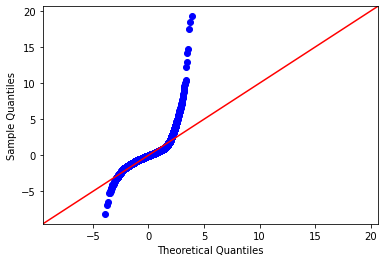

In [53]:
# Run regression with standardized variables. See if there is any differernce
model_summary(df_scaled, X_feats, 'price')

Confirmed that standardized yields the same results as non-standardized

In [54]:
# Scale Price and add onto outlier df
df_scaled2 = df_scaled.copy()

In [55]:
df_scaled2['price'] = scaler.fit_transform(df_scaled2[['price']])
df_scaled2

id       date    price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 -0.86899  -0.41185   -1.45459     -0.98204   
1      6414100192 2014-12-09 -0.00863  -0.41185    0.17194      0.53098   
2      5631500400 2015-02-25 -0.98304  -1.51952   -1.45459     -1.42833   
3      2487200875 2014-12-09  0.17101   0.69582    1.14785     -0.13301   
4      1954400510 2015-02-18 -0.08484  -0.41185   -0.15337     -0.43779   
...           ...        ...      ...       ...        ...          ...   
21574  7430200100 2014-05-14  1.84764   0.69582    1.79846      3.07807   
21577  8672200110 2015-03-17  1.49380   1.80349    2.12377      2.27258   
21581   191100405 2015-04-21  2.82749   0.69582    1.47316      1.44532   
21584   249000205 2014-10-15  2.71862   1.80349    2.12377      2.59913   
21590  7936000429 2015-03-26  1.27606   0.69582    1.79846      1.55417   

       sqft_lot   floors  waterfront     view  condition    grade  sqft_above  \
0      -0.22816 -0.91774     0.00000 -0.31063   -0.63136 -0.56451    -0.73673   
1      -0.18985  0.93402     0.00000 -0.31063   -0.63136 -0.56451     0.45812   
2      -0.12349 -0.91774     0.00000 -0.31063   -0.63136 -1.41822    -1.23157   
3      -0.24380 -0.91774     0.00000 -0.31063    2.44799 -0.56451    -0.89363   
4      -0.16969 -0.91774     0.00000 -0.31063   -0.63136  0.28920    -0.13327   
...         ...      ...         ...      ...        ...      ...         ...   
21574  -0.13687  0.00814     0.00000 -0.31063   -0.63136  2.85033     1.59263   
21577  -0.16819  0.93402     0.00000  2.28751   -0.63136  1.99662     2.87197   
21581  -0.12048  0.93402     0.00000 -0.31063   -0.63136  1.99662     1.95471   
21584  -0.16949  0.93402     0.00000 -0.31063   -0.63136  2.85033     3.23404   
21590  -0.19086  0.93402     0.00000 -0.31063   -0.63136  1.14291     0.97710   

      sqft_basement  yr_built  yr_renovated  zipcode      lat       long  \
0               0.0  -0.54875       0.00000    98178 47.51120 -122.25700   
1             400.0  -0.68492    1991.00000    98125 47.72100 -122.31900   
2               0.0  -1.29771       0.00000    98028 47.73790 -122.23300   
3             910.0  -0.20831       0.00000    98136 47.52080 -122.39300   
4               0.0   0.54065       0.00000    98074 47.61680 -122.04500   
...             ...       ...           ...      ...      ...        ...   
21574        1800.0   1.22152       0.00000    98074 47.65020 -122.06600   
21577           0.0   1.18748       0.00000    98056 47.53540 -122.18100   
21581           0.0   1.22152       0.00000    98040 47.56530 -122.22300   
21584           0.0   1.25557       0.00000    98004 47.63210 -122.20000   
21590         910.0   1.28961       0.00000    98136 47.55370 -122.39800   

       sqft_living15  sqft_lot15  basementyes  total_rooms  \
0           -0.94499    -0.26054            0     -1.01840   
1           -0.43431    -0.18785            1     -0.16385   
2            1.06855    -0.17239            0     -1.70204   
3           -0.91581    -0.28429            1      1.03251   
4           -0.27381    -0.19282            0     -0.33476   
...              ...         ...          ...          ...   
21574        3.75328    -0.06272            1      1.37433   
21577        1.52087    -0.17539            0      2.22888   
21581        0.44114    -0.09700            0      1.20342   
21584        1.15610    -0.13943            0      2.22888   
21590        0.09096    -0.24044            1      1.37433   

       living_vs_neighbor  lot_vs_neighbor  live_lot  renovated_yes  
0                -0.53992         -0.10418  -0.42942              0  
1                 1.45891         -0.14459   0.11312              1  
2                -2.40571          0.08271  -0.91929              0  
3                 1.21055         -0.10418   0.25105              0  
4                -0.37525         -0.04439  -0.43287              0  
...                   ...              ...       ...           

In [56]:
cols_to_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15', 'sqft_lot15', 
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [57]:
outliers_z = pd.DataFrame()

for col in cols_to_check:
    outliers_z[col] = df_scaled2[col].abs()>3

outliers_z['total'] = outliers_z.any(axis=1)
df_scaledz_orem = df_scaled[~outliers_z['total']].copy()

In [58]:
df_scaledz_orem.describe()

id         price    bedrooms   bathrooms  sqft_living  \
count      18739.00000   18739.00000 18739.00000 18739.00000  18739.00000   
mean  4642413539.57815  483952.00406    -0.04684    -0.11802     -0.13537   
std   2864427156.31319  234698.26149     0.93754     0.89297      0.80788   
min      1000102.00000   82500.00000    -2.62718    -2.10519     -1.86373   
25%   2202500202.50000  312000.00000    -0.41185    -0.80398     -0.74257   
50%   4019301386.00000  434975.00000    -0.41185    -0.15337     -0.25275   
75%   7348200155.00000  600000.00000     0.69582     0.49724      0.36770   
max   9900000190.00000 1640000.00000     2.91116     2.77438      2.94745   

         sqft_lot      floors  waterfront        view   condition       grade  \
count 18739.00000 18739.00000 18739.00000 18739.00000 18739.00000 18739.00000   
mean     -0.12247    -0.08184     0.00027    -0.17468     0.02538    -0.11964   
std       0.26986     0.95007     0.01633     0.55578     0.99882     0.87434   
min      -0.34553    -0.91774     0.00000    -0.31063    -2.17104    -2.27193   
25%      -0.24249    -0.91774     0.00000    -0.31063    -0.63136    -0.56451   
50%      -0.18364    -0.91774     0.00000    -0.31063    -0.63136    -0.56451   
75%      -0.12246     0.93402     0.00000    -0.31063     0.90831     0.28920   
max       2.87196     2.78577     1.00000     2.28751     2.44799     2.85033   

       sqft_above    yr_built  yr_renovated     zipcode         lat  \
count 18739.00000 18739.00000   18739.00000 18739.00000 18739.00000   
mean     -0.11325    -0.04140      59.32921 98077.57025    47.55865   
std       0.84950     0.98689     338.99128    53.41876     0.14070   
min      -1.71434    -2.42115       0.00000 98001.00000    47.15590   
25%      -0.74880    -0.68492       0.00000 98033.00000    47.46290   
50%      -0.33845     0.02999       0.00000 98065.00000    47.56950   
75%       0.37364     0.77895       0.00000 98117.00000    47.68050   
max       2.99266     1.49387    2015.00000 98199.00000    47.77760   

             long  sqft_living15  sqft_lot15  basementyes  total_rooms  \
count 18739.00000    18739.00000 18739.00000  18739.00000  18739.00000   
mean   -122.21411       -0.09102    -0.12234      0.36501     -0.09092   
std       0.13789        0.87702     0.33910      0.48145      0.91097   
min    -122.51100       -1.99554    -0.44323      0.00000     -2.72750   
25%    -122.32600       -0.74072    -0.28064      0.00000     -0.67658   
50%    -122.22800       -0.25922    -0.19187      0.00000      0.00706   
75%    -122.12800        0.42655    -0.11180      1.00000      0.69069   
max    -121.31500        2.99455     2.96184      1.00000      2.91252   

       living_vs_neighbor  lot_vs_neighbor    live_lot  renovated_yes  
count         18739.00000      18739.00000 18739.00000    18739.00000  
mean             -0.09671         -0.05894    -0.08101        0.02972  
std               0.80957          0.27328     0.77142        0.16983  
min              -2.43218         -0.79723    -1.17798        0.00000  
25%              -0.56570         -0.14893    -0.60972        0.00000  
50%              -0.16707         -0.10418    -0.29794        0.00000  
75%               0.25755         -0.04133     0.24014        0.00000  
max               2.99458          2.93377     2.99903        1.00000

In [59]:
print(f'Num observations before dropping with Z-score: {len(df_scaled2)}')
print('----Dropping all rows where an outlier occurrs accross columns----')
print(f'Num observations after dropping with Z-score: {len(df_scaledz_orem)}')
print(f'Num observations removed: {len(df_scaled2)-len(df_scaledz_orem)}')
print(f'Num observations removed as percent of original DF: {round(100*float(((len(df_scaled2)-len(df_scaledz_orem))/len(df_scaled2))),2)}%')

Num observations before dropping with Z-score: 21387
----Dropping all rows where an outlier occurrs accross columns----
Num observations after dropping with Z-score: 18739
Num observations removed: 2648
Num observations removed as percent of original DF: 12.38%


In [60]:
print(f"Max price observation: {df_scaledz_orem['price'].max()}")
print(f"Min price observation: {df_scaledz_orem['price'].min()}")

Max price observation: 1640000.0
Min price observation: 82500.0


In [61]:
df_scaledz_orem.drop('sqft_basement', axis=1, inplace=True)

In [62]:
# Run regression to check QQ Plot

X_ztarg = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     1988.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:05   Log-Likelihood:            -2.4733e+05
No. Observations:               18739   AIC:                         4.947e+05
Df Residuals:                   18717   BIC:                         4.949e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.891e+06   2.05e+06      1.895      0.058   -1.33e+05    7.91e+06
bedrooms           -1.137e+04   1157.484     -9.827      0.000   -1.36e+04   -9105.938
bathrooms           1.784e+04   1648.194     10.826      0.000    1.46e+04    2.11e+04
sqft_living         6.618e+04   7535.239      8.783      0.000    5.14e+04    8.09e+04
sqft_lot            1.308e+04   9880.047      1.324      0.185   -6282.172    3.24e+04
floors              -489.9147   1736.591     -0.282      0.778   -3893.790    2913.960
waterfront          2.847e+05   5.88e+04      4.843      0.000    1.69e+05       4e+05
view                2.996e+04   1791.086     16.729      0.000    2.65e+04    3.35e+04
condition            1.86e+04   1073.502     17.329      0.000    1.65e+04    2.07e+04
grade                9.64e+04   1870.113     51.548      0.000    9.27e+04       1e+05
sqft_above          2.857e+04   4359.627      6.553      0.000       2e+04    3.71e+04
yr_built           -6.955e+04   1529.338    -45.477      0.000   -7.25e+04   -6.66e+04
yr_renovated          20.6788      2.955      6.999      0.000      14.887      26.470
zipcode             -378.1702     23.030    -16.420      0.000    -423.312    -333.028
lat                  5.46e+05   7421.177     73.577      0.000    5.31e+05    5.61e+05
long               -6.336e+04   9442.438     -6.710      0.000   -8.19e+04   -4.49e+04
sqft_living15       3.075e+04   5307.791      5.793      0.000    2.03e+04    4.12e+04
sqft_lot15         -2116.3065   7630.106     -0.277      0.782   -1.71e+04    1.28e+04
basementyes         1.267e+04   3835.809      3.303      0.001    5151.885    2.02e+04
total_rooms         2354.3413    716.405      3.286      0.001     950.123    3758.559
living_vs_neighbor -8527.4656   4392.933     -1.941      0.052   -1.71e+04      83.081
lot_vs_neighbor      1.85e+04   5190.696      3.564      0.000    8325.583    2.87e+04
live_lot            3.705e+04   2069.578     17.900      0.000     3.3e+04    4.11e+04
==============================================================================
Omnibus:                     5324.081   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25113.797
Skew:                           1.307   Prob(JB):                         0.00
Kurtosis:                       8.033   Cond. No.                     7.04e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.64e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

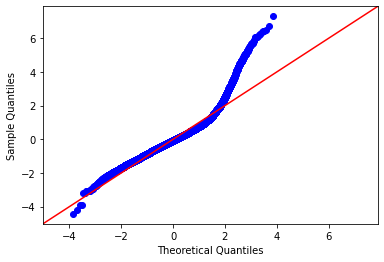

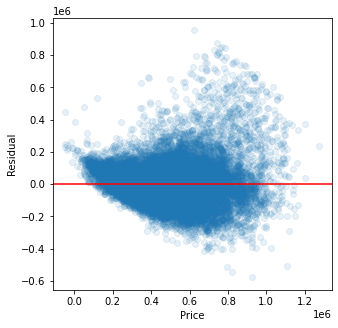

In [63]:
model_scaled = model_summary(df_scaledz_orem, X_ztarg, 'price')
sked_show(df_scaledz_orem, X_ztarg, model_scaled)

### Z-Score Outlier Removal Conclusion
- Our R^2 dropped to 0.691
- QQ plot is more normal
- Sqft_lot, floors, sqft_lot15 are insignificant
- Does not achieve homoscedasticity

## IQR Outlier Removal
- Checking if IQR outlier removal does a better job at normaling QQ plot and achieving homoscedasticity

In [64]:
def find_outliers_IQR(data):
    """Detects outliers using the 1.5*IQR thresholds.
    Returns a boolean Series where True=outlier"""
    res = data.describe()
    q1 = res['25%']
    q3 = res['75%']
    thresh = 1.5*(q3-q1)
    idx_outliers =(data < (q1-thresh)) | (data > (q3+thresh))
    return idx_outliers

In [65]:
df_iqr = df.copy()

In [66]:
df_iqr.drop(['sqft_basement'], axis=1, inplace=True)

In [67]:
# Only checking IQR outliers for columns that are continuous/ordinal

iqr_check = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot','sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot']

In [68]:
iqr_outliers = pd.DataFrame()
for col in iqr_check:
    iqr_outliers[col]=find_outliers_IQR(df_iqr[col])
iqr_outliers['total'] = iqr_outliers.any(axis=1)
df_iqr2 = df_iqr[~iqr_outliers['total']].copy()

In [69]:
print(f'Num observations before dropping with IQR: {len(df_iqr)}')
print(f'Num observations after dropping with IQR: {len(df_iqr2)}')
print(f'Num observations removed: {len(df_iqr)-len(df_iqr2)}')
print(f'Num observations removed as percent of original DF: {(len(df_iqr)-len(df_iqr2))/len(df_iqr):.2}%')

Num observations before dropping with IQR: 21387
Num observations after dropping with IQR: 13389
Num observations removed: 7998
Num observations removed as percent of original DF: 0.37%


In [70]:
print(f"Max price outliers removed: {df_iqr2['price'].max()}")
print(f"Min price outliers removed: {df_iqr2['price'].min()}")

Max price outliers removed: 1120000.0
Min price outliers removed: 81000.0


In [71]:
df_iqr2.columns
iqr_pred = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'total_rooms',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1493.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:05   Log-Likelihood:            -1.7382e+05
No. Observations:               13389   AIC:                         3.477e+05
Df Residuals:                   13366   BIC:                         3.479e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.076e+07   2.01e+06      5.360      0.000    6.83e+06    1.47e+07
bedrooms           -1.079e+04   1417.779     -7.610      0.000   -1.36e+04   -8009.582
bathrooms           1.279e+04   1832.825      6.979      0.000    9199.294    1.64e+04
sqft_living           33.3057     10.253      3.248      0.001      13.208      53.404
sqft_lot              -8.6685      2.871     -3.019      0.003     -14.297      -3.040
floors              8210.9963   3307.982      2.482      0.013    1726.883    1.47e+04
waterfront          1.805e+05   3.25e+04      5.547      0.000    1.17e+05    2.44e+05
view                3.235e+04   1739.312     18.599      0.000    2.89e+04    3.58e+04
condition            3.05e+04   1557.156     19.589      0.000    2.75e+04    3.36e+04
grade               6.864e+04   1636.963     41.931      0.000    6.54e+04    7.18e+04
sqft_above            26.1011      5.582      4.676      0.000      15.159      37.043
yr_built           -2231.6572     54.097    -41.253      0.000   -2337.694   -2125.620
yr_renovated        2582.1943    352.584      7.324      0.000    1891.080    3273.308
zipcode             -297.8456     21.565    -13.812      0.000    -340.115    -255.576
lat                 5.303e+05   6960.928     76.181      0.000    5.17e+05    5.44e+05
long                2.405e+04   9207.771      2.612      0.009    6005.351    4.21e+04
sqft_living15         80.4639      9.801      8.209      0.000      61.252      99.676
sqft_lot15             6.1096      3.000      2.036      0.042       0.229      11.991
basementyes         1.862e+04   3824.010      4.868      0.000    1.11e+04    2.61e+04
total_rooms         2003.2541    925.580      2.164      0.030     188.986    3817.523
living_vs_neighbor  1.634e+04   1.77e+04      0.921      0.357   -1.84e+04    5.11e+04
lot_vs_neighbor     8.926e+04   2.41e+04      3.701      0.000     4.2e+04    1.37e+05
live_lot            1.318e+05   1.65e+04      7.982      0.000    9.94e+04    1.64e+05
renovated_yes      -5.116e+06   7.04e+05     -7.266      0.000    -6.5e+06   -3.74e+06
==============================================================================
Omnibus:                     1311.523   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2695.672
Skew:                           0.635   Prob(JB):                         0.00
Kurtosis:                       4.794   Cond. No.                     3.92e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.49e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

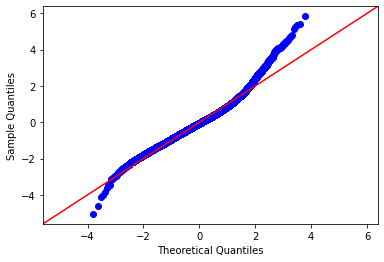

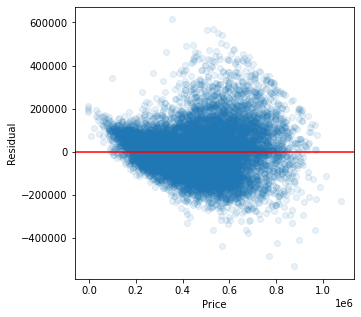

In [72]:
model_initiqr = model_summary(df_iqr2, iqr_pred, 'price')
sked_show(df_iqr2, iqr_pred, model_initiqr)

### IQR Outlier Removal Conclusion
- R^2 has increased to 0.71
- sqft_lot15 and living_vs_neighbor are insignificant
- QQ plot is significantly more normal. Small peak towards 2nd quantile
- homoscedasticity has improved because we have removed more outlier variables
- This model is working better but concerned that too much data has been removed (37%)

## Explore OHE Orindal Variables

In [73]:
# Does not look like clear linear relationship between ordinal variables
# yr_built does not have a linear relationship
# lot_vs_neighbor does not have a linear relationship

def ordinal_check(df, col, val='price'):
    fig, axes = plt.subplots(ncols=2, figsize=(20,6))
    sns.stripplot(data=df, x=col, y=val, ax=axes[0])
    sns.barplot(data=df, x=col, y=val, ax=axes[1])

    fig.suptitle(f'Z-{col.upper()} vs. Price')
    plt.show()
    print('------------------------------------------------------------')
    print(df[col].value_counts(1))

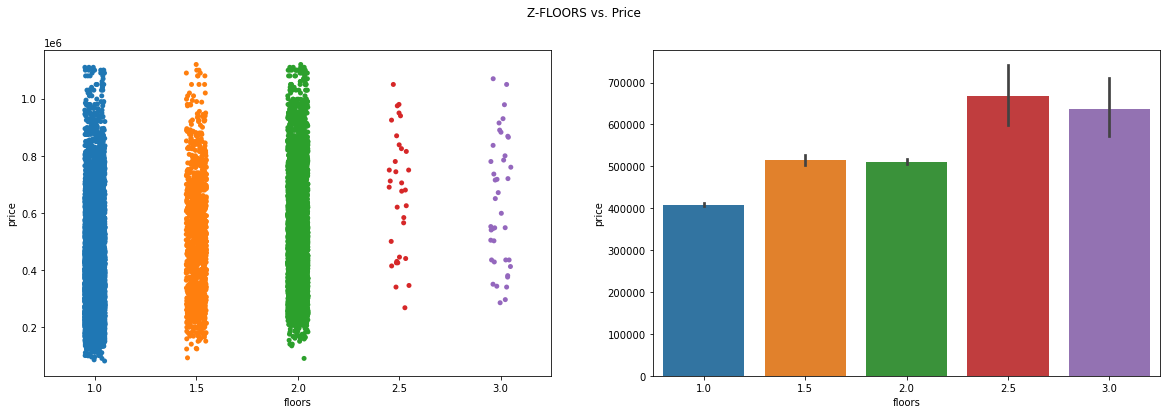

------------------------------------------------------------
1.00000   0.56853
2.00000   0.34155
1.50000   0.08447
3.00000   0.00299
2.50000   0.00246
Name: floors, dtype: float64


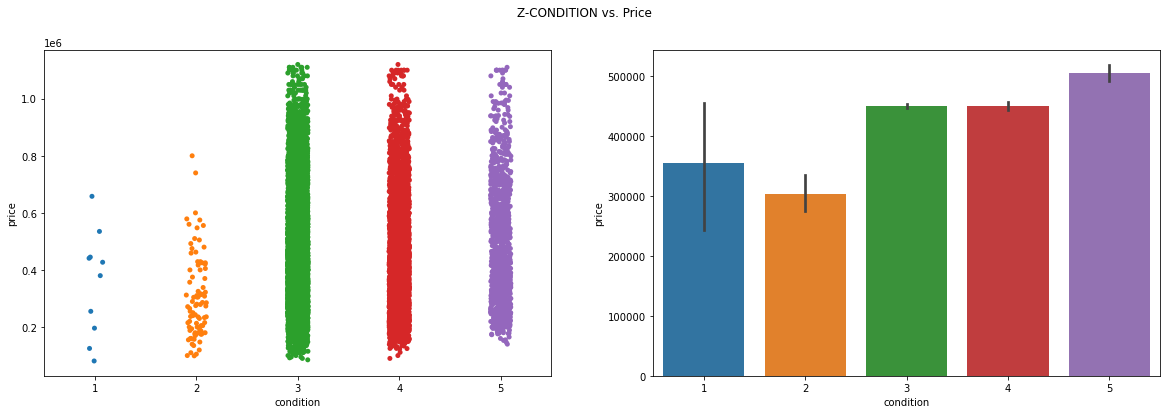

------------------------------------------------------------
3   0.62753
4   0.28494
5   0.07999
2   0.00680
1   0.00075
Name: condition, dtype: float64


In [74]:
for col in ['floors', 'condition']:
    ordinal_check(df_iqr2, col)

In [75]:
# OHE: Floors/condition
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

OneHotEncoder(drop='first', sparse=False)

In [76]:
cat_cols=['floors', 'condition']

In [77]:
encoder.fit(df_iqr2[cat_cols])

ohe_vars = encoder.transform(df_iqr2[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [78]:
# Do this for formula OLS

name_dict = {}
for col in cat_vars.columns:
    name_dict[col]=col.replace('.','_')
name_dict

{'floors_1.5': 'floors_1_5',
 'floors_2.0': 'floors_2_0',
 'floors_2.5': 'floors_2_5',
 'floors_3.0': 'floors_3_0',
 'condition_2': 'condition_2',
 'condition_3': 'condition_3',
 'condition_4': 'condition_4',
 'condition_5': 'condition_5'}

In [79]:
cat_vars.rename(columns=name_dict, inplace=True)
cat_vars

floors_1_5  floors_2_0  floors_2_5  floors_3_0  condition_2  \
0         0.00000     0.00000     0.00000     0.00000      0.00000   
1         0.00000     1.00000     0.00000     0.00000      0.00000   
2         0.00000     0.00000     0.00000     0.00000      0.00000   
3         0.00000     0.00000     0.00000     0.00000      0.00000   
4         0.00000     1.00000     0.00000     0.00000      0.00000   
...           ...         ...         ...         ...          ...   
13384     0.00000     1.00000     0.00000     0.00000      0.00000   
13385     0.00000     1.00000     0.00000     0.00000      0.00000   
13386     0.00000     1.00000     0.00000     0.00000      0.00000   
13387     0.00000     1.00000     0.00000     0.00000      0.00000   
13388     0.00000     1.00000     0.00000     0.00000      0.00000   

       condition_3  condition_4  condition_5  
0          1.00000      0.00000      0.00000  
1          1.00000      0.00000      0.00000  
2          0.00000      0.00000      1.00000  
3          1.00000      0.00000      0.00000  
4          1.00000      0.00000      0.00000  
...            ...          ...          ...  
13384      1.00000      0.00000      0.00000  
13385      1.00000      0.00000      0.00000  
13386      1.00000      0.00000      0.00000  
13387      1.00000      0.00000      0.00000  
13388      1.00000      0.00000      0.00000  

[13389 rows x 8 columns]

In [80]:
df_iqr2 = df_iqr2.reset_index()

In [81]:
df_iqr2.drop('index', axis=1)

id       date         price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13  221900.00000         3    1.00000         1180   
1      6414100192 2014-12-09  538000.00000         3    2.25000         2570   
2      2487200875 2014-12-09  604000.00000         4    3.00000         1960   
3      1954400510 2015-02-18  510000.00000         3    2.00000         1680   
4      1321400060 2014-06-27  257500.00000         3    2.25000         1715   
...           ...        ...           ...       ...        ...          ...   
13384  5556300109 2014-11-21 1080000.00000         5    3.50000         3230   
13385  1121000357 2014-08-27 1090000.00000         4    3.00000         3410   
13386  2428100080 2014-10-01 1060000.00000         4    3.00000         2990   
13387  8924100308 2015-02-03 1050000.00000         4    2.50000         3260   
13388  1070000180 2014-10-15 1110000.00000         4    3.50000         3660   

       sqft_lot  floors  waterfront    view  condition  grade  sqft_above  \
0          5650 1.00000     0.00000 0.00000          3      7        1180   
1          7242 2.00000     0.00000 0.00000          3      7        2170   
2          5000 1.00000     0.00000 0.00000          5      7        1050   
3          8080 1.00000     0.00000 0.00000          3      8        1680   
4          6819 2.00000     0.00000 0.00000          3      7        1715   
...         ...     ...         ...     ...        ...    ...         ...   
13384      7560 2.00000     0.00000 0.00000          3     10        3230   
13385      6541 2.00000     0.00000 2.00000          3      9        2680   
13386      6695 2.00000     0.00000 0.00000          3     10        2990   
13387      5974 2.00000     0.00000 1.00000          3      9        2820   
13388      4760 2.00000     0.00000 0.00000          3      9        2840   

       yr_built  yr_renovated  zipcode      lat       long  sqft_living15  \
0          1955       0.00000    98178 47.51120 -122.25700           1340   
1          1951    1991.00000    98125 47.72100 -122.31900           1690   
2          1965       0.00000    98136 47.52080 -122.39300           1360   
3          1987       0.00000    98074 47.61680 -122.04500           1800   
4          1995       0.00000    98003 47.30970 -122.32700           2238   
...         ...           ...      ...      ...        ...            ...   
13384      2007       0.00000    98052 47.64670 -122.11800           3230   
13385      2007       0.00000    98126 47.54160 -122.38000           2300   
13386      2014       0.00000    98075 47.58170 -122.04700           2760   
13387      2007       0.00000    98115 47.67720 -122.26700           2260   
13388      2014       0.00000    98199 47.64820 -122.40900           3210   

       sqft_lot15  basementyes  total_rooms  living_vs_neighbor  \
0            5650            0      4.00000             0.88060   
1            7639            1      5.25000             1.52071   
2            5000            1      7.00000             1.44118   
3            7503            0      5.00000             0.93333   
4            6819            0      5.25000             0.76631   
...           ...          ...          ...                 ...   
13384        8580            0      8.50000             1.00000   
13385        6345            1      7.00000             1.48261   
13386        6600            0      7.00000             1.08333   
13387        6780            1      6.50000             1.44248   
13388        4640            1      7.50000             1.14019   

       lot_vs_neighbor  live_lot  renovated_yes  
0              1.00000   0.20885              0  
1              0.94803   0.35487              1  
2              1.00000   0.39200              0  
3              1.07690   0.20792              0  
4              1.00000   0.25150              0  
...                ...       ...            ...  
13384          0.88112   0.42725              0  

In [82]:
df_iqr3 = pd.concat([df_iqr2, cat_vars], axis=1)

In [83]:
df_iqr3.drop('index', axis=1, inplace=True)

In [84]:
df_iqr3.drop(['floors', 'condition'], axis=1, inplace=True)

In [85]:
df_iqr3.columns
X_iqr_ohetargs = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'grade', 'sqft_above', 'yr_built',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'lat', 'long', 'zipcode',
       'total_rooms', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes', 'floors_1_5', 'floors_2_0', 'floors_2_5', 'floors_3_0',
       'condition_2', 'condition_3', 'condition_4', 'condition_5']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.710
Method:                 Least Squares   F-statistic:                     1213.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:06   Log-Likelihood:            -1.7383e+05
No. Observations:               13389   AIC:                         3.477e+05
Df Residuals:                   13361   BIC:                         3.479e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.097e+07   2.02e+06      5.423      0.000       7e+06    1.49e+07
bedrooms           -1.104e+04   1434.696     -7.696      0.000   -1.39e+04   -8229.588
bathrooms           1.364e+04   1846.563      7.389      0.000       1e+04    1.73e+04
sqft_living           33.3156     10.299      3.235      0.001      13.129      53.502
sqft_lot              -8.2510      2.877     -2.868      0.004     -13.889      -2.613
waterfront          1.699e+05   3.27e+04      5.196      0.000    1.06e+05    2.34e+05
view                3.209e+04   1741.527     18.428      0.000    2.87e+04    3.55e+04
grade               6.899e+04   1639.410     42.084      0.000    6.58e+04    7.22e+04
sqft_above            27.3497      5.604      4.880      0.000      16.364      38.335
yr_built           -2231.2992     59.256    -37.655      0.000   -2347.450   -2115.149
sqft_living15         80.6337      9.827      8.205      0.000      61.371      99.896
sqft_lot15             5.3293      3.009      1.771      0.077      -0.569      11.228
basementyes         1.846e+04   3829.648      4.821      0.000     1.1e+04     2.6e+04
lat                 5.284e+05   6981.228     75.696      0.000    5.15e+05    5.42e+05
long                2.774e+04   9252.610      2.998      0.003    9599.759    4.59e+04
zipcode             -293.5382     21.702    -13.526      0.000    -336.078    -250.998
total_rooms         2603.1371    928.570      2.803      0.005     783.009    4423.266
living_vs_neighbor  1.652e+04   1.78e+04      0.928      0.354   -1.84e+04    5.14e+04
lot_vs_neighbor     8.317e+04   2.42e+04      3.438      0.001    3.58e+04    1.31e+05
live_lot            1.251e+05   1.67e+04      7.506      0.000    9.24e+04    1.58e+05
renovated_yes       4.073e+04   6153.029      6.620      0.000    2.87e+04    5.28e+04
floors_1_5          3287.6994   3947.600      0.833      0.405   -4450.155     1.1e+04
floors_2_0          3738.3594   3456.649      1.081      0.279   -3037.161    1.05e+04
floors_2_5          3.168e+04   1.87e+04      1.690      0.091   -5062.634    6.84e+04
floors_3_0          9.489e+04   1.75e+04      5.431      0.000    6.06e+04    1.29e+05
condition_2        -7995.0949   3.53e+04     -0.227      0.821   -7.72e+04    6.12e+04
condition_3         1.344e+04   3.36e+04      0.400      0.689   -5.24e+04    7.93e+04
condition_4         4.501e+04   3.36e+04      1.341      0.180   -2.08e+04    1.11e+05
condition_5         7.274e+04   3.37e+04      2.159      0.031    6686.578    1.39e+05
==============================================================================
Omnibus:                     1316.232   Durbin-Watson:                   1.865
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2700.657
Skew:                           0.638   Prob(JB):             

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

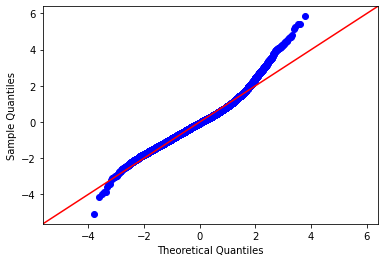

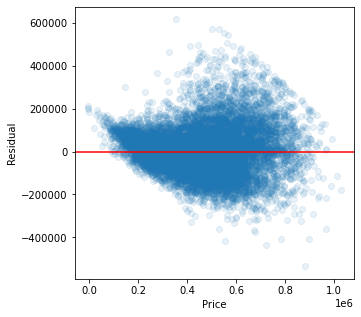

In [86]:
model_iqr_ohe = model_summary(df_iqr3, X_iqr_ohetargs, 'price')
sked_show(df_iqr3, X_iqr_ohetargs, model_iqr_ohe)

### OHE Ordinal Conclusion
- R^2 of 0.71
- Majority of the OHE variables are not statistically significant so may drop them
- QQ plot looks normal
- Homoscedasticity looks passable

## Check assumptions of multicollinearity and correlation

In [87]:
#https://nbviewer.jupyter.org/github/flatiron-school/Online-DS-FT-022221-Cohort-Notes/blob/master/Phase_2/topic_19_part1_multiple_regression/topic_19_Multiple_Regression_v2-SG.ipynb

df_iqr2.corr()['price'].round(2).sort_values(ascending=False)

price                 1.00000
grade                 0.58000
sqft_living           0.57000
sqft_living15         0.56000
lat                   0.48000
sqft_above            0.44000
live_lot              0.40000
bathrooms             0.38000
total_rooms           0.37000
bedrooms              0.27000
floors                0.26000
view                  0.24000
basementyes           0.19000
living_vs_neighbor    0.18000
renovated_yes         0.09000
yr_renovated          0.09000
condition             0.07000
waterfront            0.04000
long                  0.04000
index                 0.04000
id                    0.03000
zipcode               0.01000
sqft_lot15           -0.01000
lot_vs_neighbor      -0.01000
yr_built             -0.02000
sqft_lot             -0.02000
Name: price, dtype: float64

<AxesSubplot:>

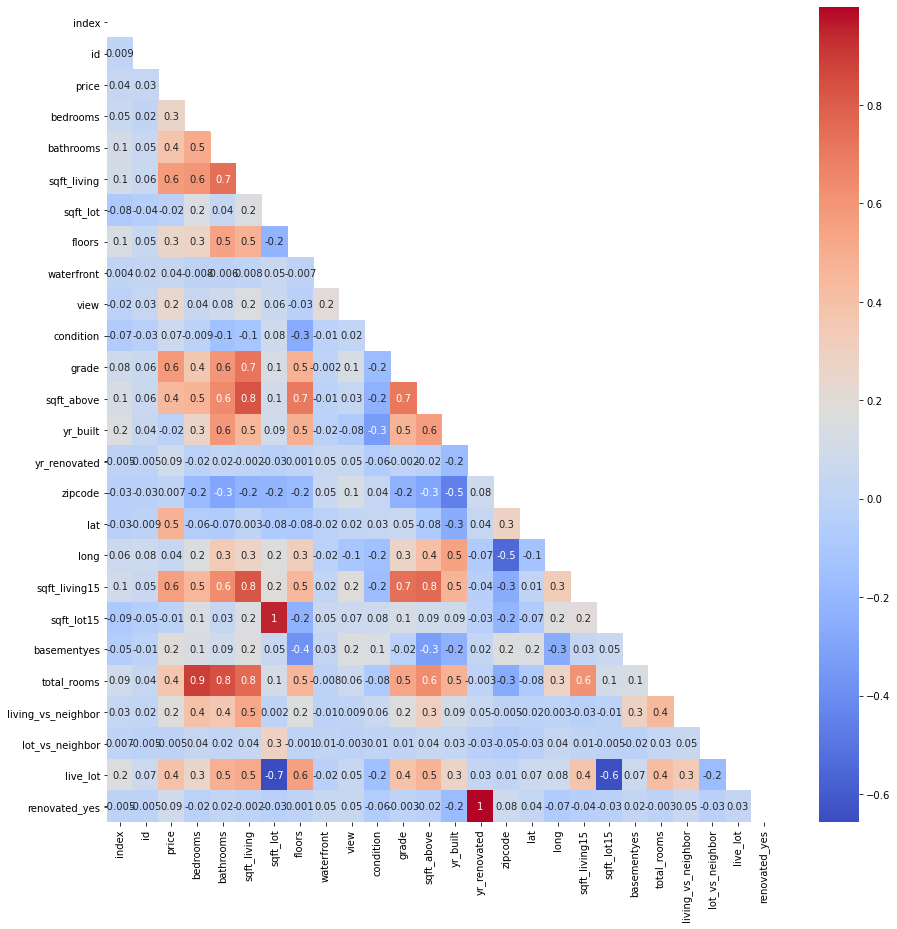

In [88]:
# https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
corr2 = df_iqr2.corr()

fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(corr2)
sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

In [89]:
def corr_finder(df):
    df_corr = df.corr().abs().stack().reset_index().sort_values(0, ascending=False)
    df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
    df_corr.set_index(['pairs'], inplace = True)
    df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

    # # cc for correlation coefficient
    df_corr.columns = ['cc']
    df_corr.drop_duplicates(inplace=True)

    return df_corr[(df_corr.cc>.75) & (df_corr.cc<1)]

In [90]:
#https://github.com/learn-co-curriculum/dsc-multicollinearity-of-features-lab/tree/solution
corr_finder(df_iqr2)

cc
pairs                                
(yr_renovated, renovated_yes) 0.99997
(sqft_lot15, sqft_lot)        0.95056
(total_rooms, bedrooms)       0.89193
(total_rooms, bathrooms)      0.84303
(sqft_living, sqft_above)     0.82733
(sqft_living15, sqft_living)  0.82134
(sqft_above, sqft_living15)   0.76633
(sqft_living, total_rooms)    0.76241

Methodology will be to check each pair for correlation with price and drop the feature that 
has a lower correlation with price

- yr_renovated, renovated_yes: DROP - yr_renovated (should be dropped anyway)
- sqft_lot, sqft_lot15: DROP - sqft_lot15
- total_rooms, bedrooms: DROP - total rooms because it takes away from nuance of bath/bed
- bathrooms, total_rooms: DROP - total rooms because it takes away from nuance of bath/bed
- sqft_living, sqft_above: DROP - sqft_above
- sqft_living, sqft_living15: DROP - sqft_living_15
- sqft_above, sqft_living15: DROP - sqft_living_15
- sqft_living, total_rooms: DROP - total_rooms

In [91]:
df_iqr_nocolin = df_iqr2.copy()

In [92]:
cols_to_drop = ['index','yr_renovated', 'sqft_lot15', 'total_rooms', 'sqft_above', 'sqft_living15']

In [93]:
df_iqr_nocolin.drop(columns=cols_to_drop, axis=1, inplace=True)

In [94]:
df_iqr_nocolin.columns
X_nocolin_targs = ['bedrooms', 'bathrooms', 'sqft_living', 'zipcode', 'lat', 'long',
       'sqft_lot', 'waterfront', 'floors','view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
       'live_lot', 'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.707
Method:                 Least Squares   F-statistic:                     1796.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:08   Log-Likelihood:            -1.7390e+05
No. Observations:               13389   AIC:                         3.478e+05
Df Residuals:                   13370   BIC:                         3.480e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.188e+07   2.02e+06      5.895      0.000    7.93e+06    1.58e+07
bedrooms           -7811.2041   1544.522     -5.057      0.000   -1.08e+04   -4783.722
bathrooms            1.61e+04   2529.434      6.366      0.000    1.11e+04    2.11e+04
sqft_living          128.7250      3.609     35.663      0.000     121.650     135.800
zipcode             -300.3712     21.674    -13.859      0.000    -342.855    -257.887
lat                 5.292e+05   6992.670     75.679      0.000    5.15e+05    5.43e+05
long                2.932e+04   9237.006      3.174      0.002    1.12e+04    4.74e+04
sqft_lot              -2.5624      0.687     -3.732      0.000      -3.908      -1.216
waterfront          1.724e+05   3.27e+04      5.270      0.000    1.08e+05    2.36e+05
floors              1.334e+04   3129.564      4.262      0.000    7204.789    1.95e+04
view                3.198e+04   1733.906     18.444      0.000    2.86e+04    3.54e+04
condition           2.976e+04   1557.488     19.105      0.000    2.67e+04    3.28e+04
grade               7.191e+04   1617.424     44.460      0.000    6.87e+04    7.51e+04
yr_built           -2232.9777     54.301    -41.122      0.000   -2339.415   -2126.541
basementyes         6756.7809   2560.305      2.639      0.008    1738.220    1.18e+04
living_vs_neighbor -1.235e+05   5898.948    -20.930      0.000   -1.35e+05   -1.12e+05
lot_vs_neighbor     4.252e+04   8756.572      4.855      0.000    2.54e+04    5.97e+04
live_lot            1.286e+05   1.59e+04      8.080      0.000    9.74e+04     1.6e+05
renovated_yes       3.985e+04   6146.511      6.483      0.000    2.78e+04    5.19e+04
==============================================================================
Omnibus:                     1366.556   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2847.472
Skew:                           0.653   Prob(JB):                         0.00
Kurtosis:                       4.843   Cond. No.                     2.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

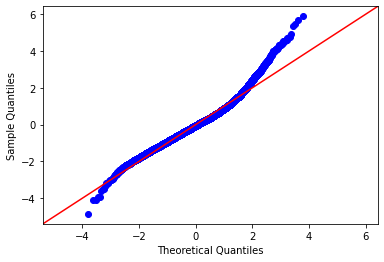

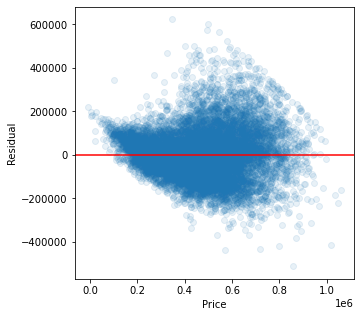

In [95]:
df_iqr_mult = model_summary(df_iqr_nocolin, X_nocolin_targs, 'price')
sked_show(df_iqr_nocolin, X_nocolin_targs, df_iqr_mult)

- R^2 of 0.708
- QQ plot looks normal
- No features with insignificant p-values
- homoscedasticity looks passable

Check Assumption of Linearity

In [96]:
# Figure out how to delete empty axis

def lin_check(df, cols, ncols=4, figsize=(20,15)):
    fig, axes = plt.subplots(nrows=(len(cols)//ncols) +1, ncols=ncols, figsize=figsize)
    for ax, col in zip(axes.flatten(), cols):
        sns.regplot(data=df, x=col, y='price', ax=ax, line_kws={'color': 'red'})
        ax.set_title(f'{col} vs. price')
    fig.tight_layout()

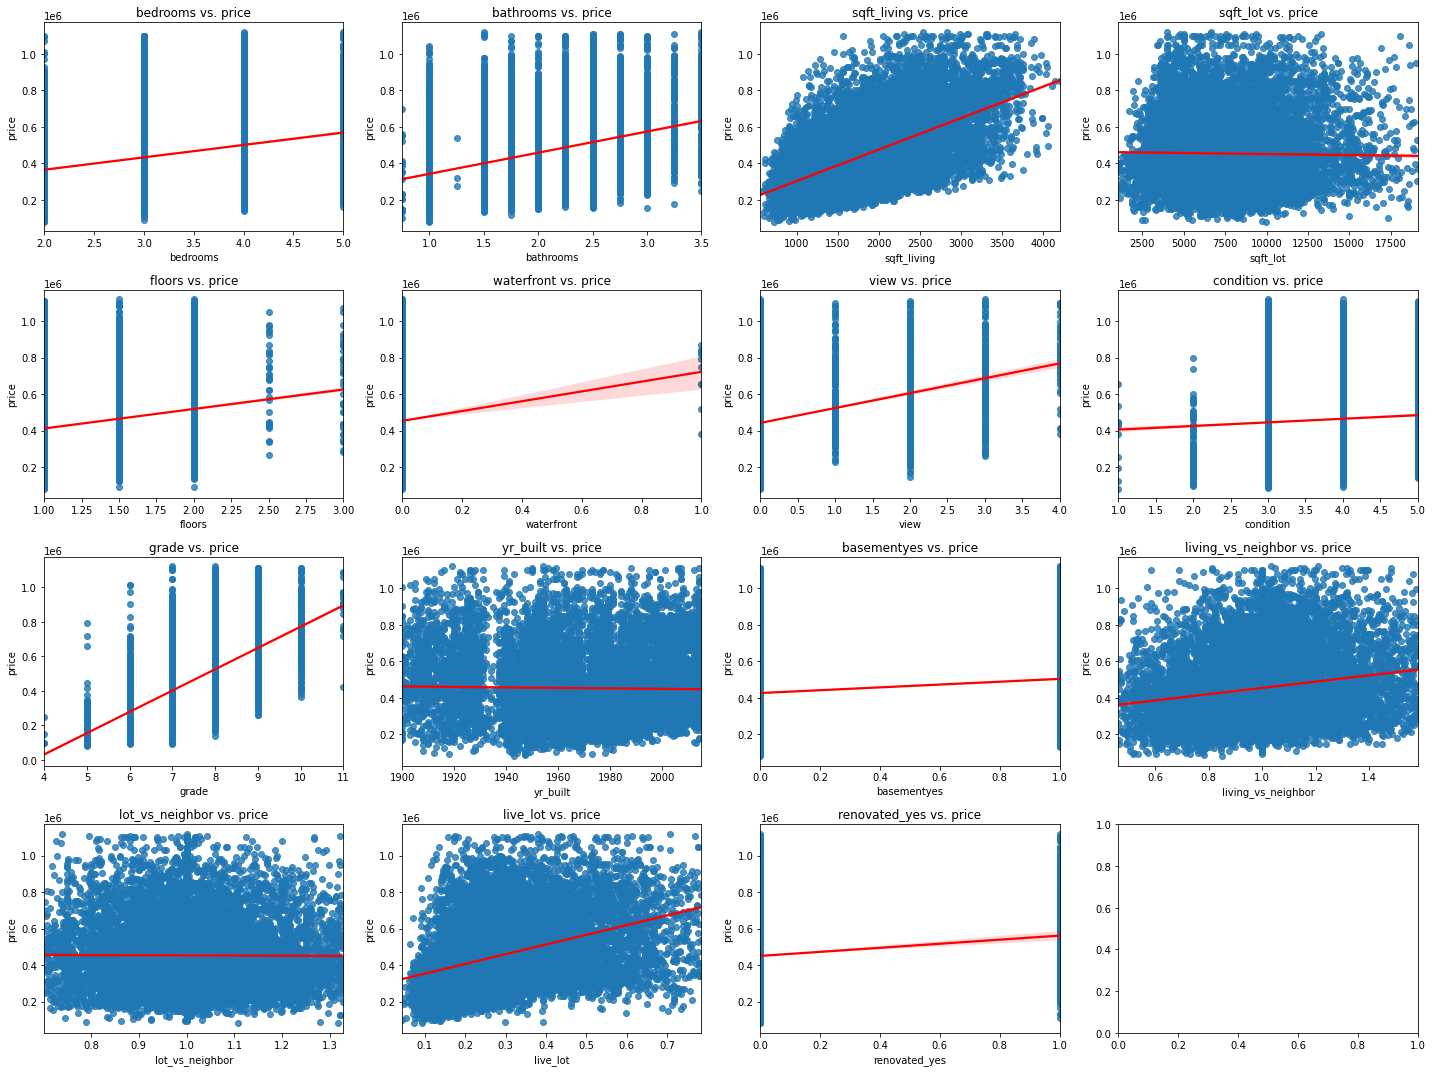

In [97]:
nocolin_cols = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor',
       'live_lot', 'renovated_yes']
## commenting out for speed

lin_check(df_iqr_nocolin, nocolin_cols)

- sqft_lot does not have a linear relationship
- yr_built does not have a linear relationship
- lot_vs_neighbor does not have a linear relationship

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1805.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:41   Log-Likelihood:            -1.7472e+05
No. Observations:               13389   AIC:                         3.495e+05
Df Residuals:                   13373   BIC:                         3.496e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.072e+07   1.97e+06    -10.521      0.000   -2.46e+07   -1.69e+07
bedrooms           -5231.0322   1639.709     -3.190      0.001   -8445.093   -2016.971
bathrooms          -2.173e+04   2505.852     -8.671      0.000   -2.66e+04   -1.68e+04
sqft_living          124.3866      3.357     37.055      0.000     117.807     130.966
lat                 5.949e+05   7234.574     82.237      0.000    5.81e+05    6.09e+05
long                -8.34e+04   9368.570     -8.902      0.000   -1.02e+05    -6.5e+04
floors              1.073e+04   3316.795      3.236      0.001    4232.965    1.72e+04
waterfront          1.523e+05   3.47e+04      4.388      0.000    8.43e+04     2.2e+05
view                3.819e+04   1835.516     20.808      0.000    3.46e+04    4.18e+04
condition           4.881e+04   1577.244     30.945      0.000    4.57e+04    5.19e+04
grade               6.145e+04   1695.715     36.237      0.000    5.81e+04    6.48e+04
zipcode             -184.2113     22.833     -8.068      0.000    -228.966    -139.456
basementyes         1.993e+04   2695.145      7.396      0.000    1.47e+04    2.52e+04
living_vs_neighbor  -1.19e+05   6258.039    -19.016      0.000   -1.31e+05   -1.07e+05
live_lot            1.682e+05   9114.665     18.453      0.000     1.5e+05    1.86e+05
renovated_yes       1.027e+05   6319.250     16.256      0.000    9.03e+04    1.15e+05
==============================================================================
Omnibus:                     1298.062   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2325.768
Skew:                           0.673   Prob(JB):                         0.00
Kurtosis:                       4.535   Cond. No.                     1.99e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.99e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

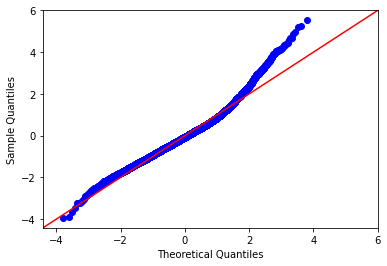

In [98]:
# comming out for speed
X_iqr_nolin = ['bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long',
             'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode',
             'basementyes', 'living_vs_neighbor',
             'live_lot', 'renovated_yes']
df_iqr_nocolin = model_summary(df_iqr_nocolin, X_iqr_nolin, 'price')
df_iqr_nocolin

### Linearity Conclusion
- R^2 has dropped to 0.67
- No insignificant p-values
- QQ plot looks normal
- Sked looks normal
- One of the features we dropped must have had a significant impact on our target variable

## Pivoting Back to Z-Score
- R^2 was reduced
- Testing if I can achieve similar results and drop less data

In [99]:
df_z = df_scaledz_orem.copy()
df_z.drop('yr_renovated', axis=1, inplace=True)

## Check for multicolinearity

Not going to OHE the variables that were unsuccesful in IQR method


In [100]:
# Check correlation
def initial_corr_check(df, col='price'):
    return df_z.corr()['price'].round(2).sort_values(ascending=False)
initial_corr_check(df_z)

price                 1.00000
grade                 0.63000
sqft_living           0.62000
sqft_living15         0.57000
sqft_above            0.52000
bathrooms             0.45000
total_rooms           0.43000
lat                   0.43000
bedrooms              0.31000
floors                0.28000
living_vs_neighbor    0.24000
live_lot              0.24000
view                  0.20000
basementyes           0.17000
sqft_lot              0.10000
renovated_yes         0.09000
sqft_lot15            0.09000
condition             0.05000
long                  0.04000
waterfront            0.03000
yr_built              0.03000
lot_vs_neighbor       0.03000
id                    0.00000
zipcode              -0.04000
Name: price, dtype: float64

In [101]:
def corr_triangle(df):
    corr2 = df.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    matrix = np.triu(corr2)
    return sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

<AxesSubplot:>

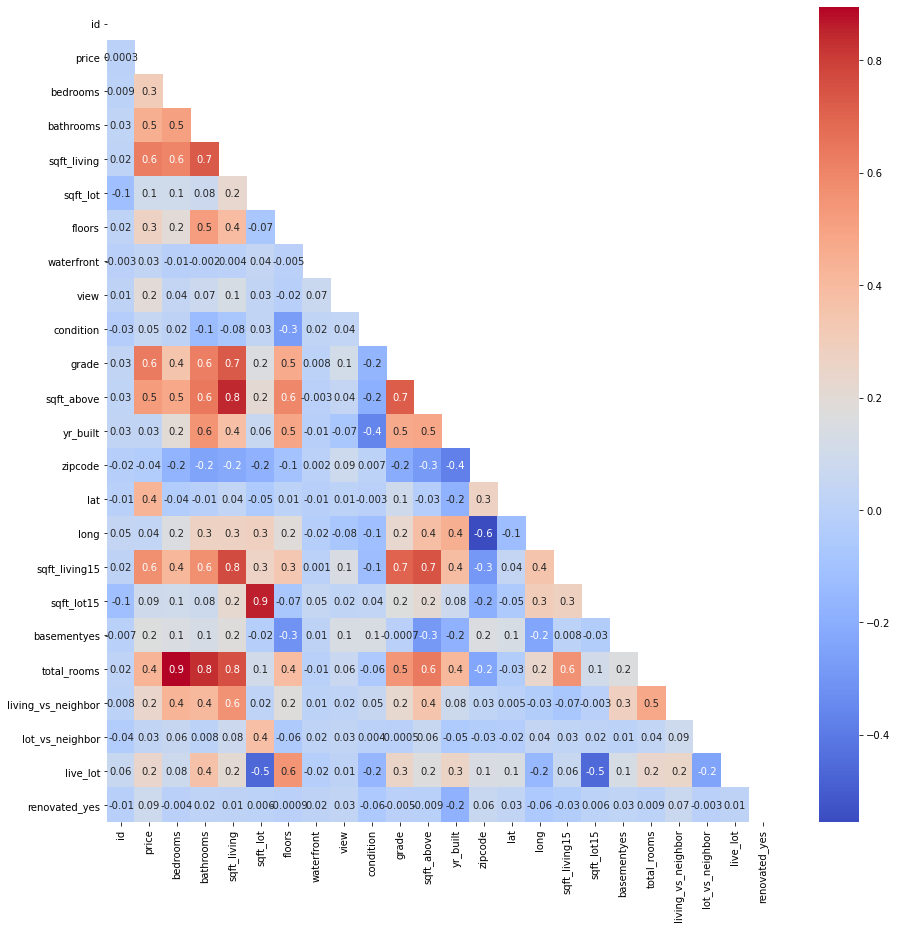

In [102]:
corr_triangle(df_z)

In [103]:
# To Drop based on mulitcolinearity:
# total_rooms, bedrooms -DROP total_rooms (nuance)
# sqft_lot, sqft_lot15 -DROP sqft_lot15
# sqft_living, sqft_above -DROP sqft_above
# bathrooms, total_rooms -DROP total_rooms(nuance)
# sqft_living, sqft_living15 -DROP sqft_living15
# total_rooms, sqft_living -DROP total_rooms

corr_finder(df_z)

cc
pairs                               
(bedrooms, total_rooms)      0.89598
(sqft_lot, sqft_lot15)       0.85946
(sqft_above, sqft_living)    0.84780
(total_rooms, bathrooms)     0.83665
(sqft_living15, sqft_living) 0.77120
(total_rooms, sqft_living)   0.75943

In [104]:
# Confirm no more multicolinearity issues

corr_finder(df_z.drop(['total_rooms', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1))

Empty DataFrame
Columns: [cc]
Index: []

<AxesSubplot:xlabel='total_rooms', ylabel='price'>

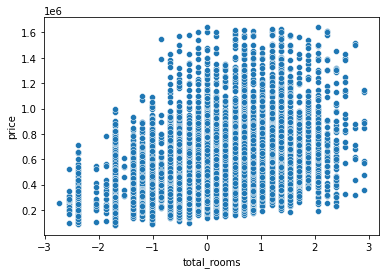

In [105]:
# It really doesn't look like there's a linear relationship between total rooms and price

sns.scatterplot(data=df_z, x='total_rooms', y='price', ci=68)

In [106]:
df_z_multirem = df_z.copy()

In [107]:
df_z_multirem.drop(['total_rooms', 'sqft_lot15', 'sqft_above', 'sqft_living15'], axis=1, inplace=True)

In [108]:
df_z_multirem.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes'],
      dtype='object')

In [109]:
X_multirem_targ = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     2304.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:42   Log-Likelihood:            -2.4737e+05
No. Observations:               18739   AIC:                         4.948e+05
Df Residuals:                   18720   BIC:                         4.949e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           4.836e+06   2.05e+06      2.355      0.019    8.11e+05    8.86e+06
bedrooms           -9365.8393   1340.420     -6.987      0.000    -1.2e+04   -6738.494
bathrooms           1.917e+04   1900.244     10.086      0.000    1.54e+04    2.29e+04
sqft_living         1.285e+05   2639.585     48.673      0.000    1.23e+05    1.34e+05
sqft_lot            1.074e+04   4646.933      2.310      0.021    1628.089    1.98e+04
floors              3089.4827   1657.212      1.864      0.062    -158.803    6337.768
waterfront          2.912e+05   5.88e+04      4.949      0.000    1.76e+05    4.06e+05
view                2.937e+04   1788.635     16.421      0.000    2.59e+04    3.29e+04
condition             1.8e+04   1070.270     16.820      0.000    1.59e+04    2.01e+04
grade               9.959e+04   1841.924     54.068      0.000     9.6e+04    1.03e+05
yr_built           -6.979e+04   1531.873    -45.561      0.000   -7.28e+04   -6.68e+04
zipcode             -379.9658     23.054    -16.481      0.000    -425.154    -334.778
lat                 5.451e+05   7431.977     73.346      0.000    5.31e+05     5.6e+05
long               -5.748e+04   9416.926     -6.104      0.000   -7.59e+04    -3.9e+04
basementyes        -5196.2910   2588.381     -2.008      0.045   -1.03e+04    -122.829
living_vs_neighbor -3.325e+04   1611.279    -20.633      0.000   -3.64e+04   -3.01e+04
lot_vs_neighbor     1.983e+04   3851.877      5.149      0.000    1.23e+04    2.74e+04
live_lot            3.582e+04   1998.492     17.923      0.000    3.19e+04    3.97e+04
renovated_yes       4.118e+04   5907.203      6.970      0.000    2.96e+04    5.28e+04
==============================================================================
Omnibus:                     5313.566   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25259.797
Skew:                           1.302   Prob(JB):                         0.00
Kurtosis:                       8.057   Cond. No.                     2.11e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

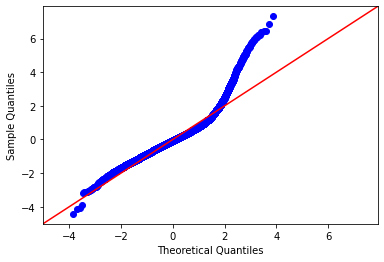

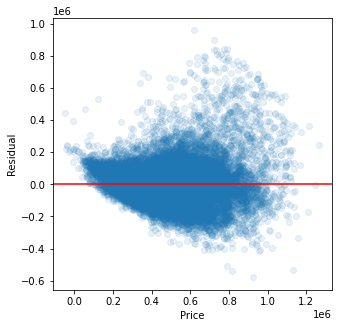

In [110]:
model_z_multirem = model_summary(df_z_multirem, X_multirem_targ, 'price')
sked_show(df_z_multirem, X_multirem_targ, model_z_multirem)

### Multicolinearity Assumptions Conclusion
- R^2 is 68.8
- No statistically insignificant features but floors, basement, and sqft loss are close to threshold
- QQ plot seems passable
- Skedacity vears upward as price increases

## Check for Linearity and possible OHE

In [111]:
df_z_multirem.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes'],
      dtype='object')

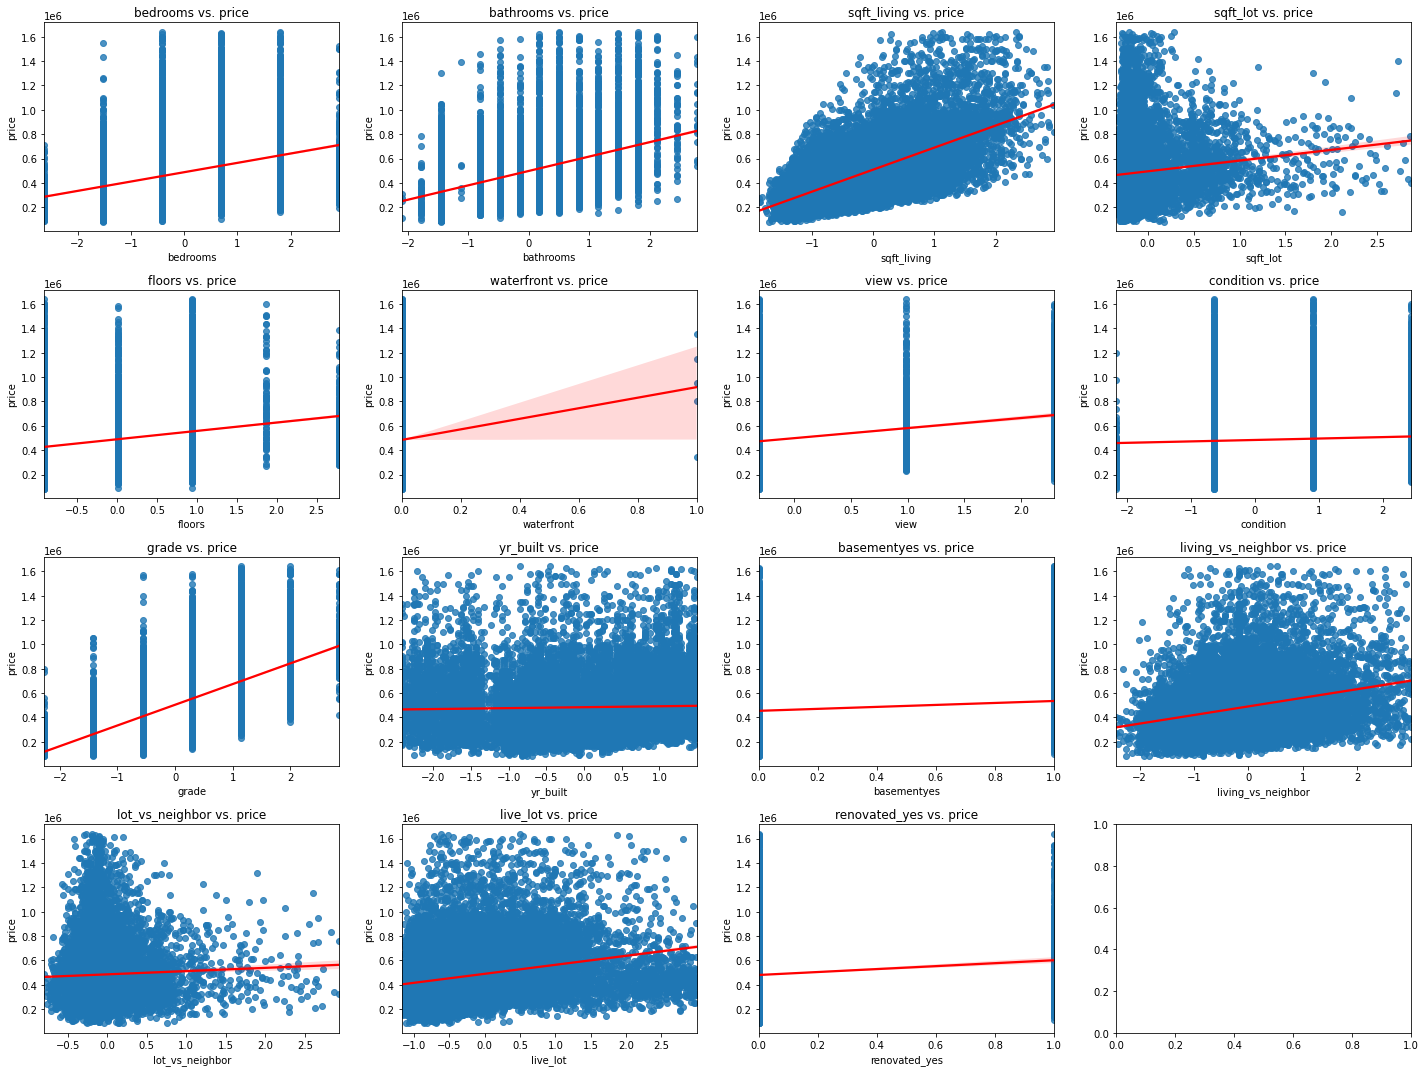

In [122]:
## commenting out for speed
z_multi_check = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']
lin_check(df_z_multirem, z_multi_check)

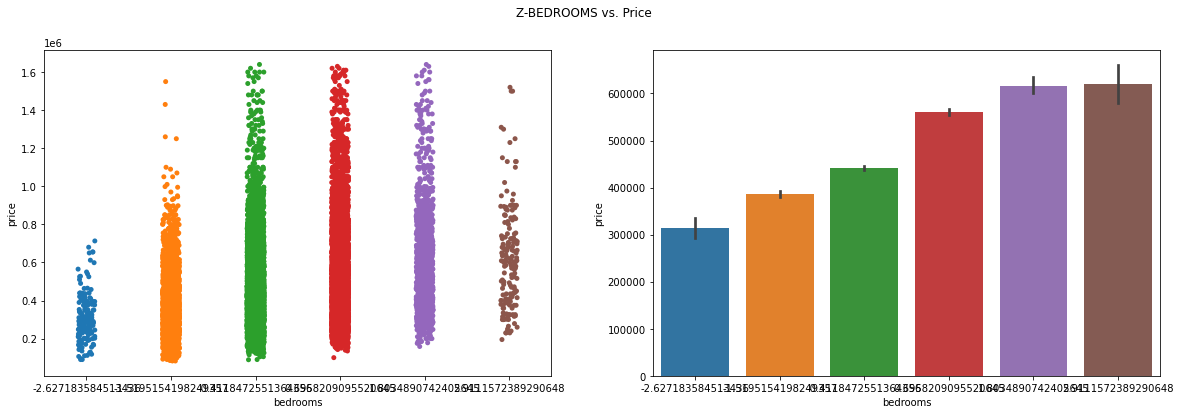

------------------------------------------------------------
-0.41185   0.46753
0.69582    0.31901
-1.51952   0.13064
1.80349    0.06569
2.91116    0.00881
-2.62718   0.00832
Name: bedrooms, dtype: float64
None
---------------------------------------------------------------------------------------


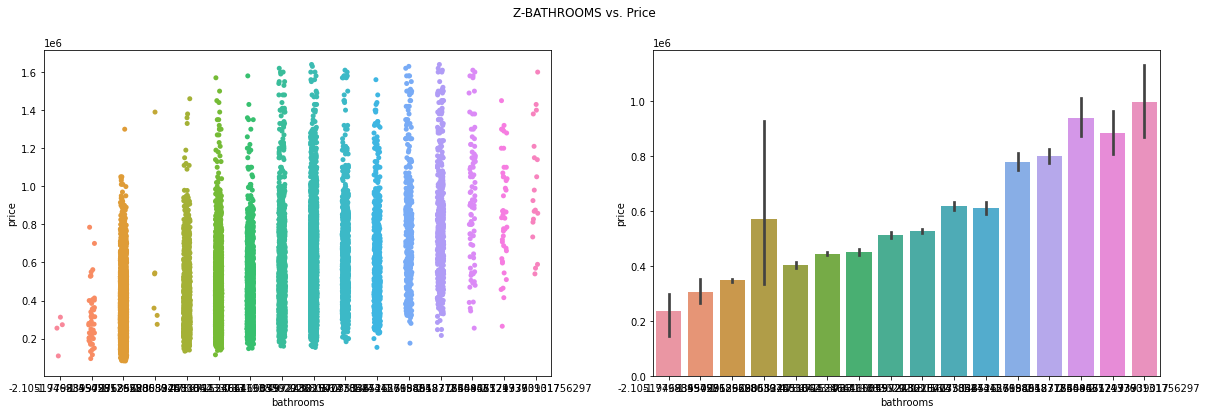

------------------------------------------------------------
0.49724    0.25594
-1.45459   0.19483
-0.47867   0.14953
0.17194    0.09600
-0.15337   0.09387
-0.80398   0.07108
0.82255    0.05326
1.14785    0.03004
1.79846    0.02497
1.47316    0.01953
2.12377    0.00438
-1.77989   0.00256
2.44907    0.00245
2.77438    0.00101
-1.12928   0.00032
-2.10519   0.00021
Name: bathrooms, dtype: float64
None
---------------------------------------------------------------------------------------


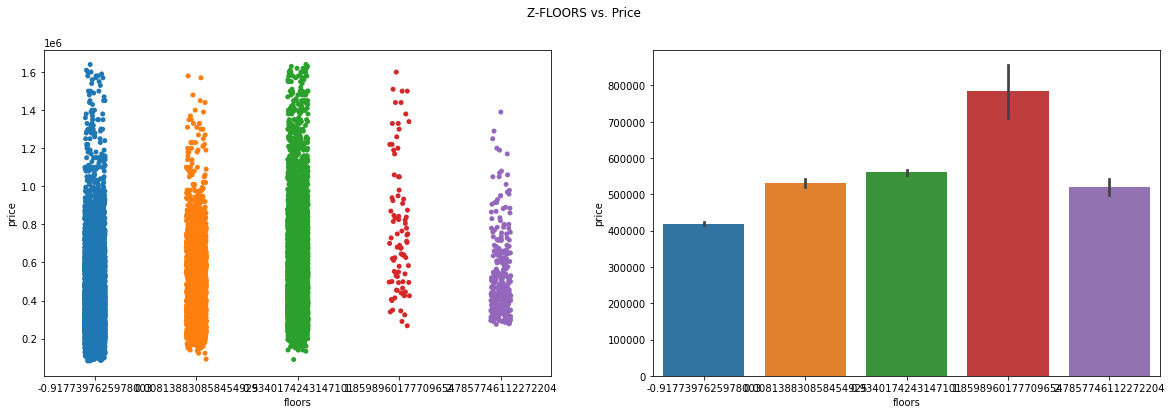

------------------------------------------------------------
-0.91774   0.52345
0.93402    0.36539
0.00814    0.08933
2.78577    0.01724
1.85990    0.00459
Name: floors, dtype: float64
None
---------------------------------------------------------------------------------------


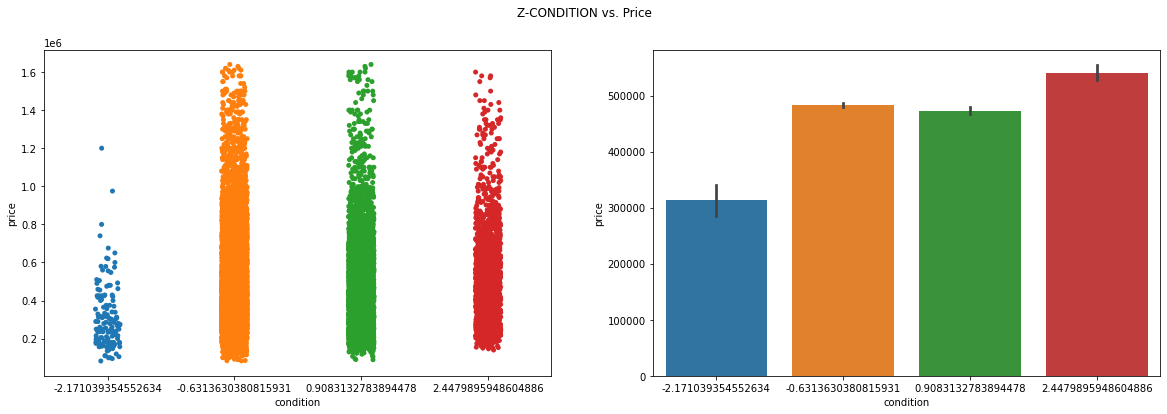

------------------------------------------------------------
-0.63136   0.63915
0.90831    0.27275
2.44799    0.08063
-2.17104   0.00747
Name: condition, dtype: float64
None
---------------------------------------------------------------------------------------


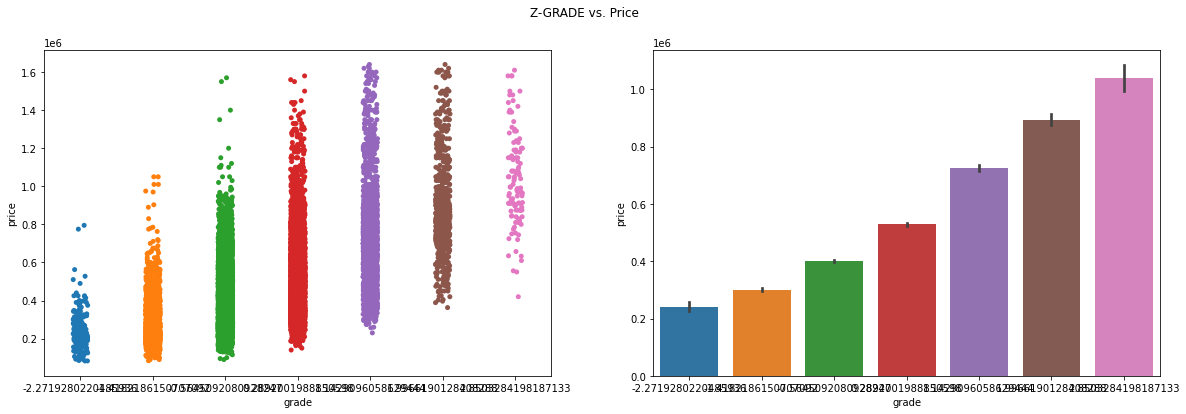

------------------------------------------------------------
-0.56451   0.44906
0.28920    0.28246
1.14291    0.11068
-1.41822   0.10166
1.99662    0.03869
-2.27193   0.01115
2.85033    0.00630
Name: grade, dtype: float64
None
---------------------------------------------------------------------------------------


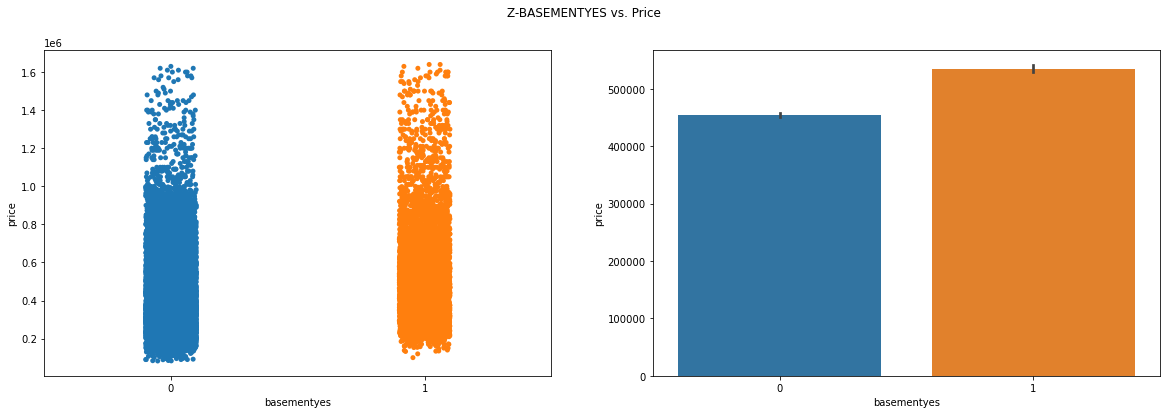

------------------------------------------------------------
0   0.63499
1   0.36501
Name: basementyes, dtype: float64
None
---------------------------------------------------------------------------------------


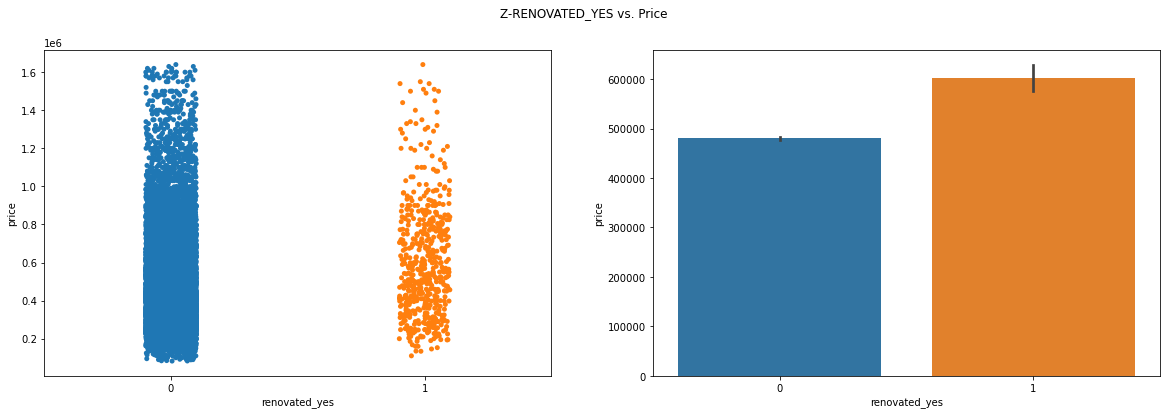

------------------------------------------------------------
0   0.97028
1   0.02972
Name: renovated_yes, dtype: float64
None
---------------------------------------------------------------------------------------


In [113]:
oridnal_cats = ['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'basementyes', 'renovated_yes']
for col in oridnal_cats:
    print(ordinal_check(df_z_multirem, col))
    print('---------------------------------------------------------------------------------------')

Most of the data apppears ordinal, floor is in between

In [114]:
df_z_loc = df_z_multirem.copy()

In [115]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder
loc_col=['zipcode']
encoder.fit(df_z_loc[loc_col])

ohe_vars2 = encoder.transform(df_z_loc[loc_col])
encoder.get_feature_names(loc_col)
cat_vars2 = pd.DataFrame(ohe_vars2,columns=encoder.get_feature_names(loc_col))

In [116]:
df_z_loc = df_z_loc.reset_index()

In [117]:
df_z_loc2 = pd.concat([df_z_loc, cat_vars2], axis=1)

In [118]:
df_z_loc2.drop('zipcode', axis=1, inplace=True)

In [119]:
X_z_zip = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'waterfront', 'view', 'condition', 'grade',
       'basementyes', 'living_vs_neighbor',
       'live_lot', 'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     1154.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:30:46   Log-Likelihood:            -2.4151e+05
No. Observations:               18739   AIC:                         4.832e+05
Df Residuals:                   18657   BIC:                         4.838e+05
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            3.33e+05   5232.930     63.635      0.000    3.23e+05    3.43e+05
bedrooms           -4820.5389    993.951     -4.850      0.000   -6768.774   -2872.304
bathrooms           1.162e+04   1299.038      8.949      0.000    9078.566    1.42e+04
sqft_living          1.36e+05   1989.545     68.382      0.000    1.32e+05     1.4e+05
sqft_lot            9331.6405   3435.611      2.716      0.007    2597.529    1.61e+04
waterfront          3.155e+05   4.39e+04      7.190      0.000    2.29e+05    4.01e+05
view                2.727e+04   1330.814     20.490      0.000    2.47e+04    2.99e+04
condition           1.739e+04    762.754     22.797      0.000    1.59e+04    1.89e+04
grade               5.777e+04   1368.594     42.214      0.000    5.51e+04    6.05e+04
basementyes        -1.955e+04   1669.265    -11.714      0.000   -2.28e+04   -1.63e+04
living_vs_neighbor -1.686e+04   1218.422    -13.839      0.000   -1.93e+04   -1.45e+04
live_lot           -2.297e+04   1389.580    -16.532      0.000   -2.57e+04   -2.02e+04
renovated_yes       4.895e+04   4206.560     11.635      0.000    4.07e+04    5.72e+04
zipcode_98002       2.377e+04   8765.145      2.712      0.007    6591.622     4.1e+04
zipcode_98003      -5066.2409   7832.990     -0.647      0.518   -2.04e+04    1.03e+04
zipcode_98004       6.197e+05   8456.241     73.278      0.000    6.03e+05    6.36e+05
zipcode_98005       3.234e+05   9512.438     33.994      0.000    3.05e+05    3.42e+05
zipcode_98006       2.624e+05   7257.938     36.151      0.000    2.48e+05    2.77e+05
zipcode_98007       2.572e+05   9805.498     26.227      0.000    2.38e+05    2.76e+05
zipcode_98008       2.416e+05   7949.532     30.391      0.000    2.26e+05    2.57e+05
zipcode_98010       7.909e+04   1.21e+04      6.522      0.000    5.53e+04    1.03e+05
zipcode_98011       1.403e+05   8740.323     16.056      0.000    1.23e+05    1.57e+05
zipcode_98014       1.019e+05    1.2e+04      8.482      0.000    7.84e+04    1.26e+05
zipcode_98019       8.483e+04   9102.332      9.320      0.000     6.7e+04    1.03e+05
zipcode_98022       2421.5764   9042.704      0.268      0.789   -1.53e+04    2.01e+04
zipcode_98023      -2.395e+04   6803.651     -3.520      0.000   -3.73e+04   -1.06e+04
zipcode_98024       1.433e+05   1.53e+04      9.381      0.000    1.13e+05    1.73e+05
zipcode_98027       1.873e+05   7566.707     24.756      0.000    1.72e+05    2.02e+05
zipcode_98028       1.314e+05   7834.066     16.774      0.000    1.16e+05    1.47e+05
zipcode_98029        2.28e+05   7681.632     29.686      0.000    2.13e+05    2.43e+05
zipcode_98030       1847.7858   8044.427      0.230      0.818   -1.39e+04    1.76e+04
zipcode_98031       8019.6992   7900.673      1.015      0.310   -7466.339    2.35e+04
zipcode_98032        496.6108   1.02e+

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

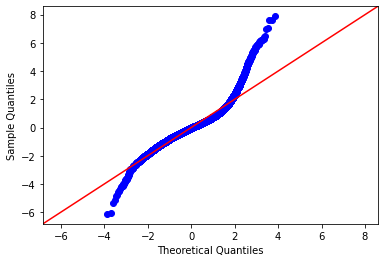

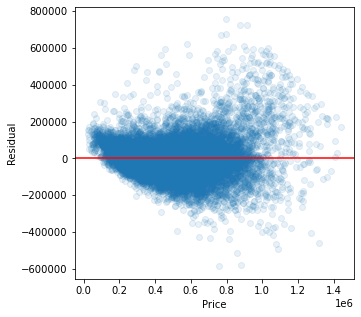

In [120]:
model_zip = model_summary(df_z_loc2, X_z_zip, 'price')
sked_show(df_z_loc2, X_z_zip, model_zip)

### Checking for Linearity Conclusion
- When adding zipcode, R^2 moves up to 0.834
- Floors are statistically insignificant
- Tried OHE and they came back as majority insignificant
- Dropped floors because no linear relationship
- Some zipcodes were statistically insignificant but enough to drop the variables
- QQ plot trails off 2 quantile
- Homoscedasticity breaks down around $1,000,000

## Invididually check for homoskedacicity per feature

bedrooms-----------------


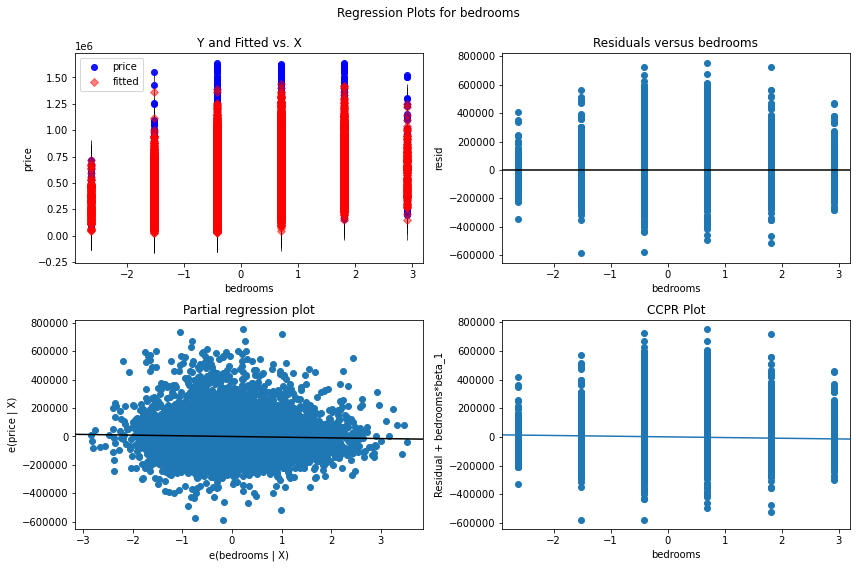

----------------------
bathrooms-----------------


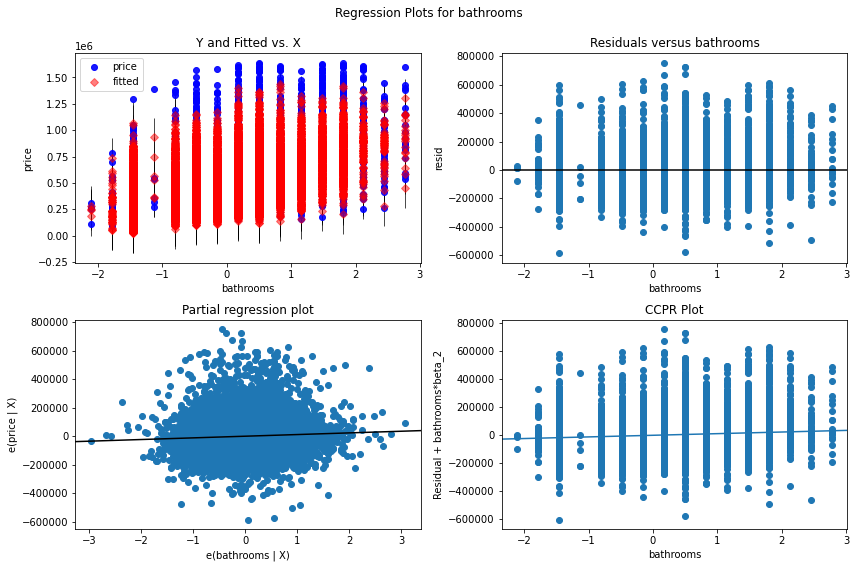

----------------------
sqft_living-----------------


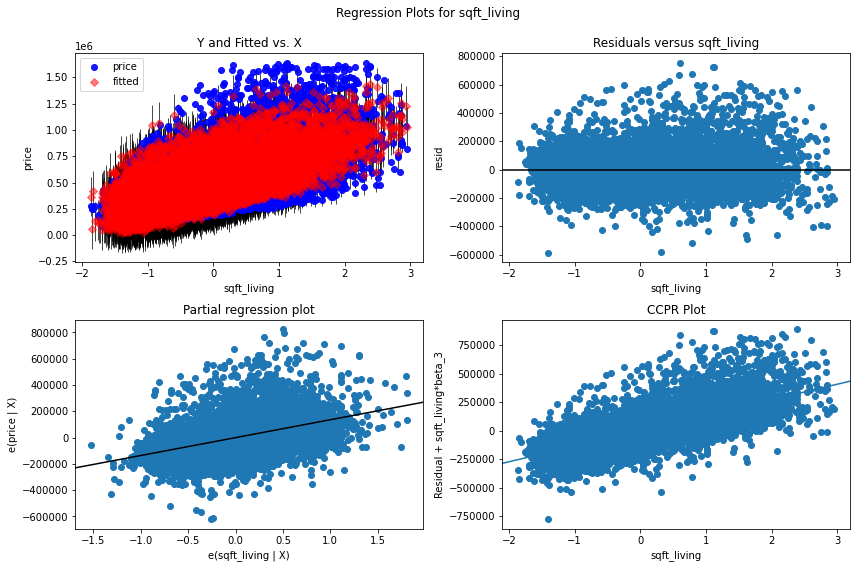

----------------------
sqft_lot-----------------


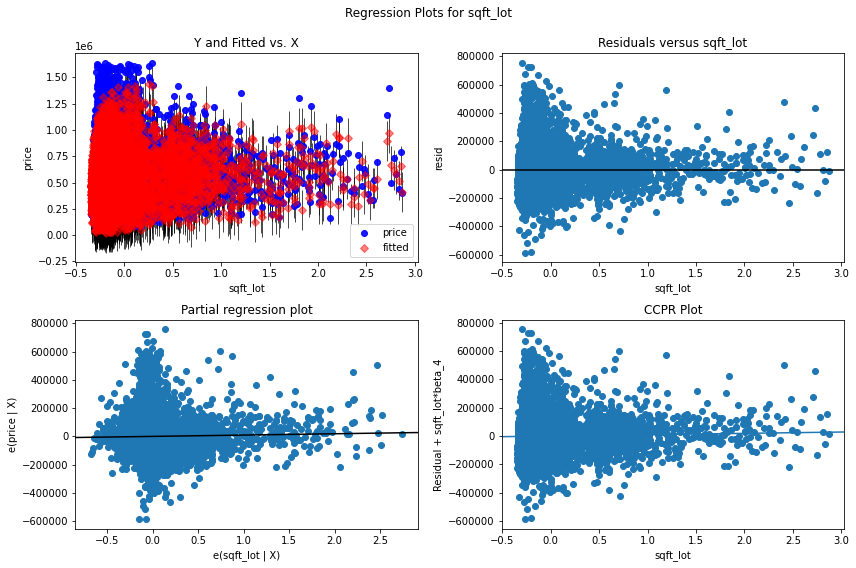

----------------------
floors-----------------


ValueError: 'floors' is not in list

<Figure size 864x576 with 0 Axes>

In [121]:
X_z_zip2 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'basementyes', 'living_vs_neighbor',
       'live_lot', 'renovated_yes']
for col in X_z_zip2:
    print(f'{col}-----------------')
    sm.graphics.plot_regress_exog(model_zip, col,plt.figure(figsize=(12,8)))
    plt.show()
    print('----------------------')

In [ ]:
# Sqft Lot, # live_lot are heteroscedasticstic

In [123]:
X_z_zip_ho = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'view', 'condition', 'grade',
       'yr_built', 'basementyes', 'living_vs_neighbor',
       'renovated_yes', 'zipcode_98002',
       'zipcode_98003', 'zipcode_98004', 'zipcode_98005', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98033',
       'zipcode_98034', 'zipcode_98038', 'zipcode_98039', 'zipcode_98040',
       'zipcode_98042', 'zipcode_98045', 'zipcode_98052', 'zipcode_98053',
       'zipcode_98055', 'zipcode_98056', 'zipcode_98058', 'zipcode_98059',
       'zipcode_98065', 'zipcode_98070', 'zipcode_98072', 'zipcode_98074',
       'zipcode_98075', 'zipcode_98077', 'zipcode_98092', 'zipcode_98102',
       'zipcode_98103', 'zipcode_98105', 'zipcode_98106', 'zipcode_98107',
       'zipcode_98108', 'zipcode_98109', 'zipcode_98112', 'zipcode_98115',
       'zipcode_98116', 'zipcode_98117', 'zipcode_98118', 'zipcode_98119',
       'zipcode_98122', 'zipcode_98125', 'zipcode_98126', 'zipcode_98133',
       'zipcode_98136', 'zipcode_98144', 'zipcode_98146', 'zipcode_98148',
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1155.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:35:33   Log-Likelihood:            -2.4160e+05
No. Observations:               18739   AIC:                         4.834e+05
Df Residuals:                   18658   BIC:                         4.840e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           3.498e+05   5258.706     66.520      0.000     3.4e+05     3.6e+05
bedrooms           -5225.9838    998.862     -5.232      0.000   -7183.844   -3268.124
bathrooms           1.402e+04   1403.633      9.991      0.000    1.13e+04    1.68e+04
sqft_living         1.346e+05   2009.048     66.988      0.000    1.31e+05    1.39e+05
floors             -4746.9575   1123.896     -4.224      0.000   -6949.896   -2544.019
view                2.757e+04   1336.241     20.636      0.000     2.5e+04    3.02e+04
condition           1.513e+04    807.653     18.737      0.000    1.35e+04    1.67e+04
grade               6.276e+04   1431.332     43.848      0.000       6e+04    6.56e+04
yr_built           -1.811e+04   1261.058    -14.362      0.000   -2.06e+04   -1.56e+04
basementyes        -2.452e+04   1881.208    -13.032      0.000   -2.82e+04   -2.08e+04
living_vs_neighbor -1.878e+04   1216.012    -15.447      0.000   -2.12e+04   -1.64e+04
renovated_yes       3.718e+04   4370.651      8.506      0.000    2.86e+04    4.57e+04
zipcode_98002       1.504e+04   8798.124      1.710      0.087   -2202.884    3.23e+04
zipcode_98003      -9693.6916   7871.024     -1.232      0.218   -2.51e+04    5734.232
zipcode_98004        6.07e+05   8516.636     71.270      0.000     5.9e+05    6.24e+05
zipcode_98005       3.151e+05   9581.464     32.884      0.000    2.96e+05    3.34e+05
zipcode_98006       2.548e+05   7293.012     34.942      0.000    2.41e+05    2.69e+05
zipcode_98007       2.456e+05   9859.192     24.909      0.000    2.26e+05    2.65e+05
zipcode_98008       2.286e+05   7998.581     28.576      0.000    2.13e+05    2.44e+05
zipcode_98010       8.803e+04   1.22e+04      7.233      0.000    6.42e+04    1.12e+05
zipcode_98011       1.346e+05   8779.257     15.327      0.000    1.17e+05    1.52e+05
zipcode_98014       1.137e+05    1.2e+04      9.449      0.000    9.01e+04    1.37e+05
zipcode_98019       8.858e+04   9150.153      9.680      0.000    7.06e+04    1.07e+05
zipcode_98022       2012.6203   9083.613      0.222      0.825   -1.58e+04    1.98e+04
zipcode_98023      -2.798e+04   6831.767     -4.096      0.000   -4.14e+04   -1.46e+04
zipcode_98024       1.456e+05   1.53e+04      9.519      0.000    1.16e+05    1.76e+05
zipcode_98027       1.829e+05   7576.805     24.142      0.000    1.68e+05    1.98e+05
zipcode_98028       1.249e+05   7872.573     15.869      0.000     1.1e+05     1.4e+05
zipcode_98029       2.124e+05   7688.894     27.627      0.000    1.97e+05    2.27e+05
zipcode_98030       -326.6919   8076.766     -0.040      0.968   -1.62e+04    1.55e+04
zipcode_98031       5605.0683   7933.508      0.707      0.480   -9945.331    2.12e+04
zipcode_98032      -6391.7776   1.02e+04     -0.624      0.532   -2.65e+04    1.37e+04
zipcode_98033       3.382e+05   7193.1

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

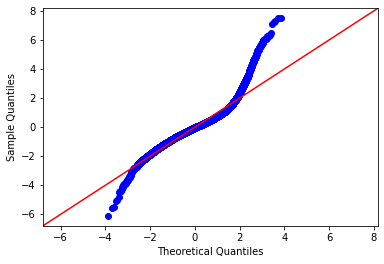

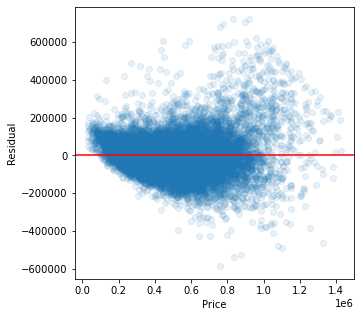

In [124]:
model_ind = model_summary(df_z_loc2, X_z_zip_ho, 'price', True)
sked_show(df_z_loc2, X_z_zip_ho, model_ind)

### Skedacicity Individual Conclusion:
- It has not changed much, concern is that too many high outlier values are left in the dataset

## Going back to IQR because of heteroscedasticity

In [125]:
# IQR method is more strict on removing outliers

df_iqr4 = df_iqr.copy()

In [126]:
df_iqr4.drop('yr_renovated', axis=1, inplace=True)

In [127]:
# Lower bound is negative

res=df_iqr4['price'].describe()
thresh = res['75%'] -res['25%']
u_bound=res['75%']+1.5*thresh
u_bound


1125564.75

In [128]:
df_iqr4['outlier'] = (df_iqr4['price']>u_bound).map({True:True,
                                False:False})

In [129]:
df_iqror=df_iqr4.loc[df_iqr4['outlier']==False]

Num observations before removal: 21387
Num observations after removal:  20235
Num observations removed:  1152
Percent observations removed:  5.39%
--------------------------------------------


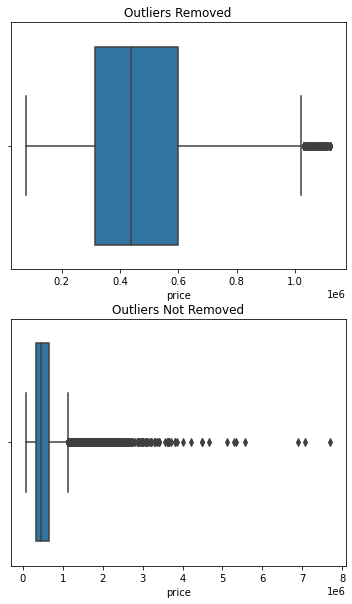

--------------------------------------------
Max Home Price: 1120000.0
Min Home Price: 78000.0


In [130]:
# Add number of removed values
print(f'Num observations before removal: {len(df)}')
print(f'Num observations after removal:  {len(df_iqror)}')
print(f'Num observations removed:  {len(df) - len(df_iqror)}')
print(f'Percent observations removed:  {round(100*((len(df) - len(df_iqror))/len(df)),2)}%')
print('--------------------------------------------')
fig, axes = plt.subplots(nrows=2, figsize=(6,10))
sns.boxplot(data=df_iqror, x='price', ax=axes[0])
axes[0].set_title('Outliers Removed')
sns.boxplot(data=df_iqr4, x='price', ax=axes[1])
axes[1].set_title('Outliers Not Removed')
plt.show();
print('--------------------------------------------')
print(f"Max Home Price: {df_iqror['price'].max()}")
print(f"Min Home Price: {df_iqror['price'].min()}")

## Baseline Model Price Removal

In [131]:
X_targs3= ['bedrooms', 'bathrooms', 'sqft_living', 'lat', 'long', 'zipcode',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'yr_built', 'sqft_living15',
       'sqft_lot15', 'basementyes', 'total_rooms', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     2297.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:35:47   Log-Likelihood:            -2.6401e+05
No. Observations:               20235   AIC:                         5.281e+05
Df Residuals:                   20213   BIC:                         5.282e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -3.938e+05   1.72e+06     -0.229      0.819   -3.77e+06    2.98e+06
bedrooms           -1.257e+04   1116.859    -11.251      0.000   -1.48e+04   -1.04e+04
bathrooms           1.551e+04   1435.679     10.806      0.000    1.27e+04    1.83e+04
sqft_living           18.0636      5.601      3.225      0.001       7.085      29.042
lat                 5.299e+05   6130.485     86.438      0.000    5.18e+05    5.42e+05
long               -2.338e+04   7617.832     -3.069      0.002   -3.83e+04   -8447.572
zipcode             -248.6443     19.146    -12.987      0.000    -286.172    -211.116
sqft_lot               0.2418      0.036      6.685      0.000       0.171       0.313
floors              4169.2359   2541.176      1.641      0.101    -811.676    9150.148
waterfront          1.447e+05   1.66e+04      8.719      0.000    1.12e+05    1.77e+05
view                3.038e+04   1348.375     22.527      0.000    2.77e+04     3.3e+04
condition           2.672e+04   1363.410     19.598      0.000     2.4e+04    2.94e+04
grade               6.898e+04   1292.879     53.355      0.000    6.64e+04    7.15e+04
sqft_above            38.1994      4.180      9.139      0.000      30.006      46.393
yr_built           -1918.8454     43.251    -44.365      0.000   -2003.621   -1834.069
sqft_living15         81.5610      5.075     16.071      0.000      71.613      91.509
sqft_lot15             0.0025      0.050      0.050      0.960      -0.095       0.100
basementyes         1.803e+04   3088.853      5.836      0.000     1.2e+04    2.41e+04
total_rooms         2947.8882    696.484      4.233      0.000    1582.723    4313.054
living_vs_neighbor  5.163e+04   8224.545      6.278      0.000    3.55e+04    6.78e+04
lot_vs_neighbor     1238.5576    830.631      1.491      0.136    -389.546    2866.662
live_lot             9.08e+04   4502.534     20.165      0.000     8.2e+04    9.96e+04
renovated_yes       3.016e+04   4828.298      6.247      0.000    2.07e+04    3.96e+04
==============================================================================
Omnibus:                     1697.013   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3165.248
Skew:                           0.588   Prob(JB):                         0.00
Kurtosis:                       4.541   Cond. No.                     8.81e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.63e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

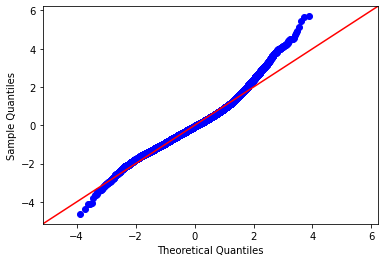

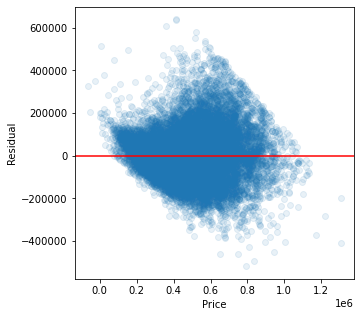

In [132]:
model_iqr_price = model_summary(df_iqror, X_targs3, 'price', True)
sked_show(df_iqror, X_targs3,model_iqr_price)

### Baseline IQR Model Conclusion
- While R^2 0.71
- We have homoskedacicity
- QQ model shows very few values tailing off, only past 2.5 quantiles
- Assumptions are better met

## Check for Multicolinearity

In [133]:
df_iqror.corr()['price'].round(2).sort_values(ascending=False)

price                 1.00000
grade                 0.63000
sqft_living           0.62000
sqft_living15         0.56000
sqft_above            0.53000
bathrooms             0.45000
lat                   0.43000
total_rooms           0.42000
bedrooms              0.30000
floors                0.27000
living_vs_neighbor    0.24000
view                  0.23000
live_lot              0.17000
basementyes           0.16000
sqft_lot              0.09000
renovated_yes         0.08000
sqft_lot15            0.08000
long                  0.07000
yr_built              0.06000
waterfront            0.05000
lot_vs_neighbor       0.04000
condition             0.03000
id                    0.01000
zipcode              -0.02000
outlier                   nan
Name: price, dtype: float64

<AxesSubplot:>

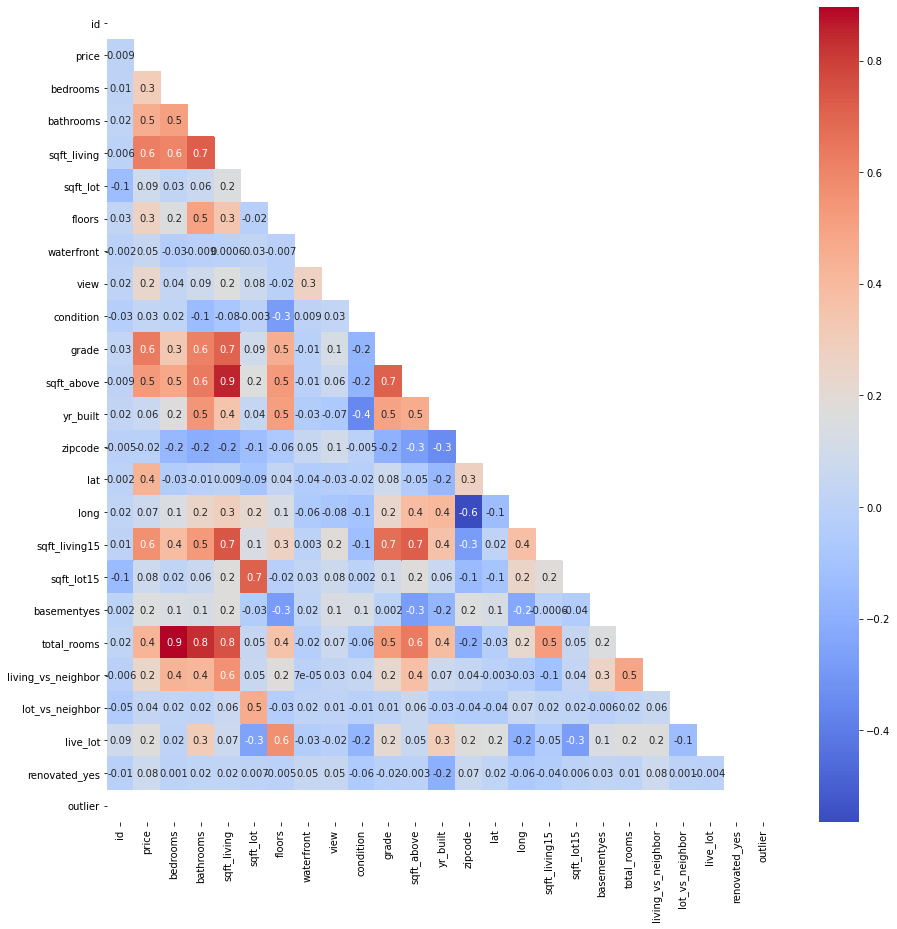

In [134]:
corr2 = df_iqror.corr()

fig, ax = plt.subplots(figsize=(15,15))
matrix = np.triu(corr2)
sns.heatmap(corr2,cmap="coolwarm", annot=True, fmt='.1g', mask=matrix)

In [135]:
# Remove total_rooms, sqft_above

corr_finder(df_iqror)

cc
pairs                             
(bedrooms, total_rooms)    0.89690
(sqft_living, sqft_above)  0.85335
(bathrooms, total_rooms)   0.83498
(sqft_living, total_rooms) 0.75134

In [136]:
# Confirm we don't have multicolinearity

corr_finder(df_iqror.drop(['total_rooms', 'sqft_above'], axis=1))

Empty DataFrame
Columns: [cc]
Index: []

In [137]:
df_iqror_mc = df_iqror.drop(['total_rooms', 'sqft_above'], axis=1)

### Multicolinearity Conclusion
- Had to drop total_rooms and sqft_above because they did not meet assumption of no multicolinearity

In [138]:
df_iqror_mc.columns
x_targs = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     2398.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:35:59   Log-Likelihood:            -2.6405e+05
No. Observations:               20235   AIC:                         5.282e+05
Df Residuals:                   20214   BIC:                         5.283e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.307e+05   1.73e+06     -0.134      0.894   -3.61e+06    3.15e+06
bedrooms           -9977.5812   1186.564     -8.409      0.000   -1.23e+04   -7651.819
bathrooms           1.807e+04   1964.441      9.200      0.000    1.42e+04    2.19e+04
sqft_living           44.4406      4.810      9.239      0.000      35.013      53.869
sqft_lot               0.2452      0.036      6.765      0.000       0.174       0.316
floors              1.077e+04   2441.239      4.413      0.000    5987.788    1.56e+04
waterfront          1.481e+05   1.66e+04      8.906      0.000    1.15e+05    1.81e+05
view                2.893e+04   1341.761     21.559      0.000    2.63e+04    3.16e+04
condition           2.561e+04   1360.739     18.820      0.000    2.29e+04    2.83e+04
grade               7.074e+04   1281.161     55.212      0.000    6.82e+04    7.32e+04
yr_built           -1918.4405     43.339    -44.265      0.000   -2003.389   -1833.492
zipcode             -244.4968     19.180    -12.748      0.000    -282.091    -206.903
lat                 5.274e+05   6136.610     85.936      0.000    5.15e+05    5.39e+05
long               -1.963e+04   7622.272     -2.575      0.010   -3.46e+04   -4687.387
sqft_living15         86.4843      5.057     17.103      0.000      76.573      96.396
sqft_lot15            -0.0039      0.050     -0.078      0.938      -0.102       0.094
basementyes        -2729.4166   2097.679     -1.301      0.193   -6841.039    1382.205
living_vs_neighbor  5.622e+04   8225.946      6.834      0.000    4.01e+04    7.23e+04
lot_vs_neighbor     1265.3766    832.319      1.520      0.128    -366.037    2896.790
live_lot            8.705e+04   4492.958     19.374      0.000    7.82e+04    9.59e+04
renovated_yes       2.954e+04   4837.659      6.106      0.000    2.01e+04     3.9e+04
==============================================================================
Omnibus:                     1661.442   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3093.886
Skew:                           0.578   Prob(JB):                         0.00
Kurtosis:                       4.527   Cond. No.                     2.19e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

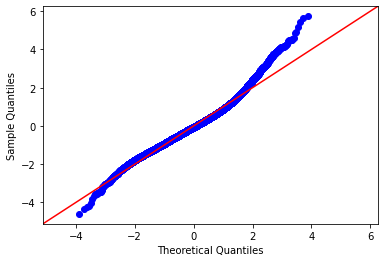

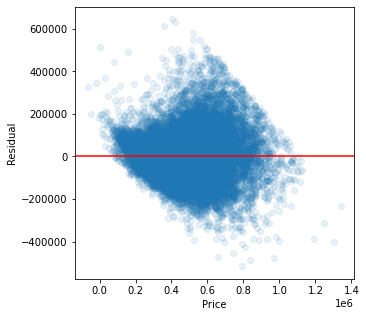

In [139]:
model_iqr_co = model_summary(df_iqror_mc, x_targs, 'price', True)
sked_show(df_iqror_mc, x_targs, model_iqr_co)

## Check for assumptions of Linearity

In [140]:
df_iqror_mc.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes', 'outlier'],
      dtype='object')

In [141]:
# yr_built, sqft_lot do not have linear relationships

# lin_check(df_iqror_mc, x_targs)

In [142]:
df_iqr_nocl = df_iqror_mc.drop(['yr_built', 'sqft_lot'], axis=1)

In [143]:
df_iqr_nocl.columns
x_targs = ['bedrooms', 'bathrooms', 'sqft_living', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'basementyes', 'living_vs_neighbor',
       'lot_vs_neighbor', 'live_lot', 'renovated_yes']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     2323.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:36:07   Log-Likelihood:            -2.6501e+05
No. Observations:               20235   AIC:                         5.301e+05
Df Residuals:                   20216   BIC:                         5.302e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -2.695e+07   1.69e+06    -15.912      0.000   -3.03e+07   -2.36e+07
bedrooms           -6927.6524   1241.773     -5.579      0.000   -9361.629   -4493.676
bathrooms          -9820.8440   1950.432     -5.035      0.000   -1.36e+04   -5997.839
sqft_living           52.3617      5.038     10.394      0.000      42.487      62.236
floors               706.8676   2548.024      0.277      0.781   -4287.466    5701.202
waterfront          1.301e+05   1.74e+04      7.469      0.000     9.6e+04    1.64e+05
view                3.423e+04   1400.739     24.437      0.000    3.15e+04     3.7e+04
condition           4.351e+04   1362.956     31.924      0.000    4.08e+04    4.62e+04
grade                5.82e+04   1308.619     44.477      0.000    5.56e+04    6.08e+04
zipcode             -136.6741     19.948     -6.852      0.000    -175.773     -97.575
lat                 5.812e+05   6300.897     92.236      0.000    5.69e+05    5.94e+05
long               -1.004e+05   7745.367    -12.965      0.000   -1.16e+05   -8.52e+04
sqft_living15         89.1416      5.297     16.828      0.000      78.759      99.524
sqft_lot15             0.2336      0.034      6.844      0.000       0.167       0.301
basementyes         3002.2427   2195.064      1.368      0.171   -1300.261    7304.747
living_vs_neighbor  6.338e+04   8617.361      7.355      0.000    4.65e+04    8.03e+04
lot_vs_neighbor     6069.4419    678.135      8.950      0.000    4740.242    7398.641
live_lot            5.535e+04   4650.142     11.902      0.000    4.62e+04    6.45e+04
renovated_yes       8.884e+04   4875.206     18.223      0.000    7.93e+04    9.84e+04
==============================================================================
Omnibus:                     1713.263   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2836.776
Skew:                           0.631   Prob(JB):                         0.00
Kurtosis:                       4.332   Cond. No.                     2.02e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

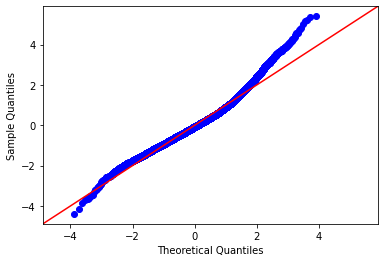

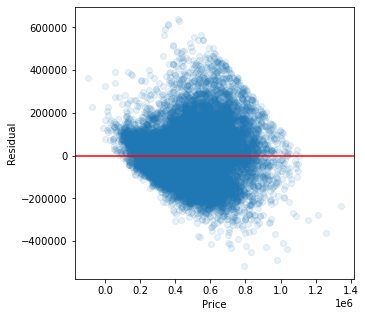

In [144]:
model_iqr5 = model_summary(df_iqr_nocl, x_targs, 'price', True)
sked_show(df_iqr_nocl, x_targs, model_iqr5)

### Checking for assumptions conclusion
- R^2 dropped to 0.674
- All Assumptions have been met

## Final Model

In [145]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop='first')
encoder

cat_cols=['zipcode']

encoder.fit(df_iqr_nocl[cat_cols])

ohe_vars = encoder.transform(df_iqr_nocl[cat_cols])
encoder.get_feature_names(cat_cols)
cat_vars = pd.DataFrame(ohe_vars,columns=encoder.get_feature_names(cat_cols))

In [146]:
df_iqr_nocl = df_iqr_nocl.reset_index()

In [147]:
df_iqr_zip = pd.concat([df_iqr_nocl,cat_vars], axis=1)

In [148]:
df_iqr_zip.columns
x_targs =['bedrooms', 'bathrooms', 'sqft_living',
        'waterfront', 'view', 'condition', 'grade','lat',
       'long', 'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1173.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:36:12   Log-Likelihood:            -2.5832e+05
No. Observations:               20235   AIC:                         5.168e+05
Df Residuals:                   20149   BIC:                         5.175e+05
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.861e+07   3.33e+06     -5.587      0.000   -2.51e+07   -1.21e+07
bedrooms           -5191.3639    905.501     -5.733      0.000   -6966.219   -3416.509
bathrooms           9731.4080   1382.333      7.040      0.000    7021.923    1.24e+04
sqft_living           77.5384      3.643     21.286      0.000      70.398      84.678
waterfront          1.661e+05   1.29e+04     12.887      0.000    1.41e+05    1.91e+05
view                2.909e+04   1033.653     28.141      0.000    2.71e+04    3.11e+04
condition           2.526e+04   1003.408     25.174      0.000    2.33e+04    2.72e+04
grade               4.249e+04    967.602     43.912      0.000    4.06e+04    4.44e+04
lat                 1.657e+05   3.45e+04      4.803      0.000    9.81e+04    2.33e+05
long               -8.465e+04   2.46e+04     -3.437      0.001   -1.33e+05   -3.64e+04
sqft_living15         62.3583      3.865     16.133      0.000      54.782      69.935
sqft_lot15             0.2089      0.026      7.926      0.000       0.157       0.261
basementyes        -1.634e+04   1406.534    -11.618      0.000   -1.91e+04   -1.36e+04
living_vs_neighbor  4.554e+04   6229.138      7.310      0.000    3.33e+04    5.77e+04
lot_vs_neighbor     4744.3204    489.925      9.684      0.000    3784.027    5704.614
live_lot           -6.138e+04   3081.297    -19.920      0.000   -6.74e+04   -5.53e+04
renovated_yes       4.515e+04   3534.876     12.774      0.000    3.82e+04    5.21e+04
zipcode_98002       1.853e+04   7692.823      2.409      0.016    3450.765    3.36e+04
zipcode_98003      -7230.2698   6875.863     -1.052      0.293   -2.07e+04    6246.983
zipcode_98004       4.655e+05   1.35e+04     34.381      0.000    4.39e+05    4.92e+05
zipcode_98005       2.848e+05   1.36e+04     20.895      0.000    2.58e+05    3.12e+05
zipcode_98006       2.377e+05   1.12e+04     21.189      0.000    2.16e+05     2.6e+05
zipcode_98007       2.221e+05    1.4e+04     15.855      0.000    1.95e+05     2.5e+05
zipcode_98008       2.092e+05   1.33e+04     15.673      0.000    1.83e+05    2.35e+05
zipcode_98010       1.013e+05   1.18e+04      8.604      0.000    7.82e+04    1.24e+05
zipcode_98011       7.759e+04   1.73e+04      4.479      0.000    4.36e+04    1.12e+05
zipcode_98014       8.195e+04   1.91e+04      4.299      0.000    4.46e+04    1.19e+05
zipcode_98019       5.313e+04   1.87e+04      2.837      0.005    1.64e+04    8.98e+04
zipcode_98022        4.39e+04   1.03e+04      4.271      0.000    2.37e+04     6.4e+04
zipcode_98023       -2.93e+04   6343.023     -4.619      0.000   -4.17e+04   -1.69e+04
zipcode_98024       1.432e+05   1.69e+04      8.478      0.000     1.1e+05    1.76e+05
zipcode_98027       1.802e+05   1.14e+04     15.852      0.000    1.58e+05    2.02e+05
zipcode_98028       6.292e+04   1.69e+

(<Figure size 360x360 with 1 Axes>,
 <AxesSubplot:xlabel='Price', ylabel='Residual'>)

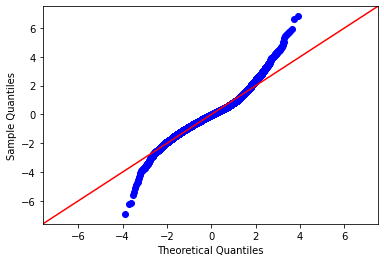

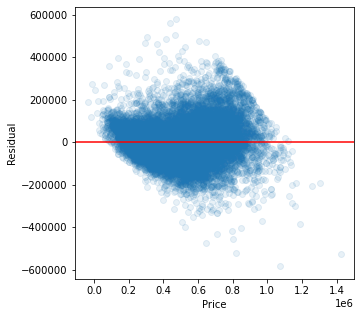

In [149]:
model_iqr6 = model_summary(df_iqr_zip, x_targs, 'price')
sked_show(df_iqr_zip, x_targs, model_iqr6)

bedrooms-----------------


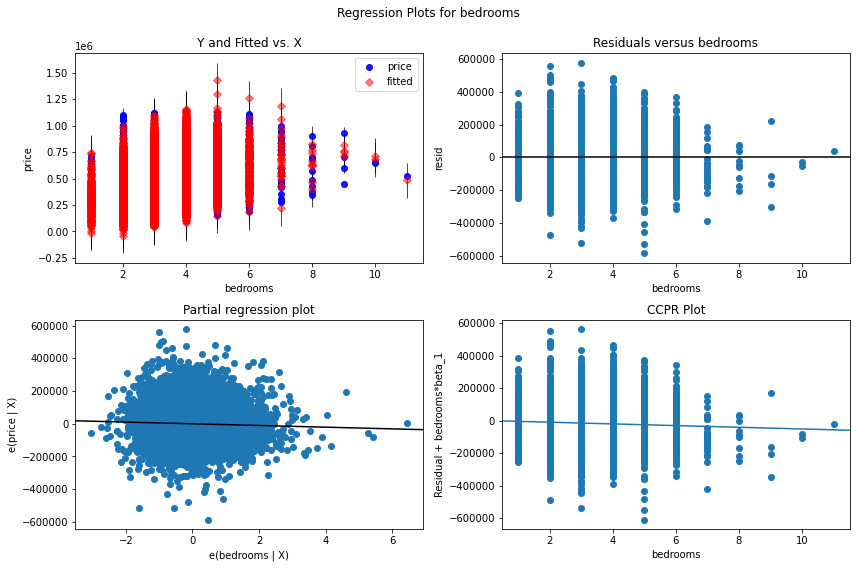

----------------------
bathrooms-----------------


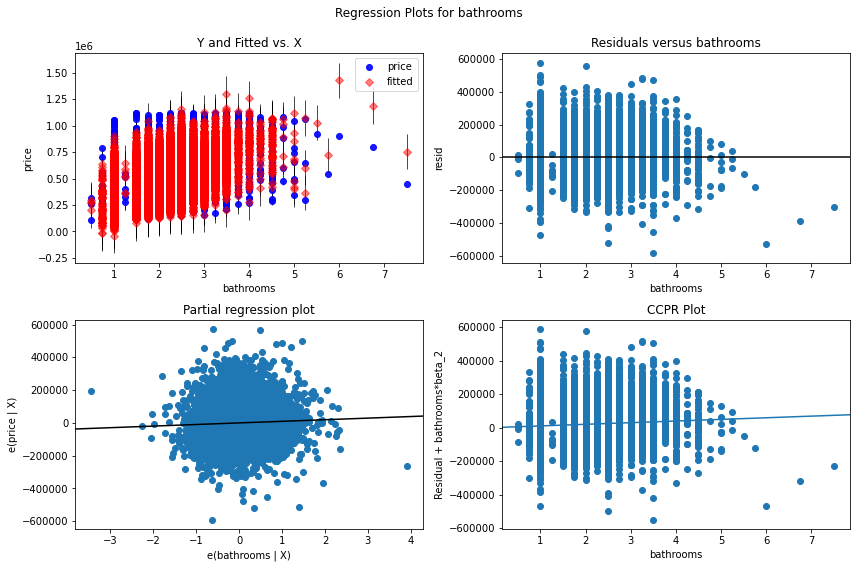

----------------------
sqft_living-----------------


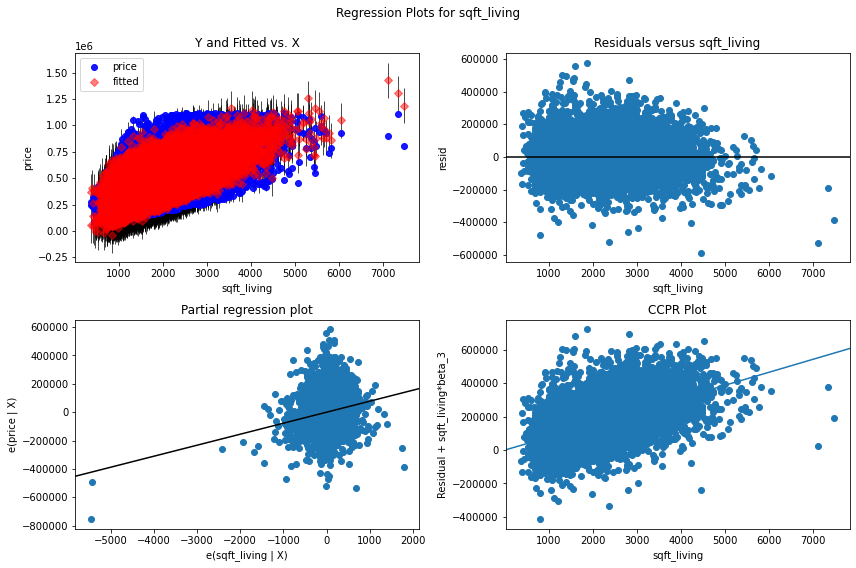

----------------------
waterfront-----------------


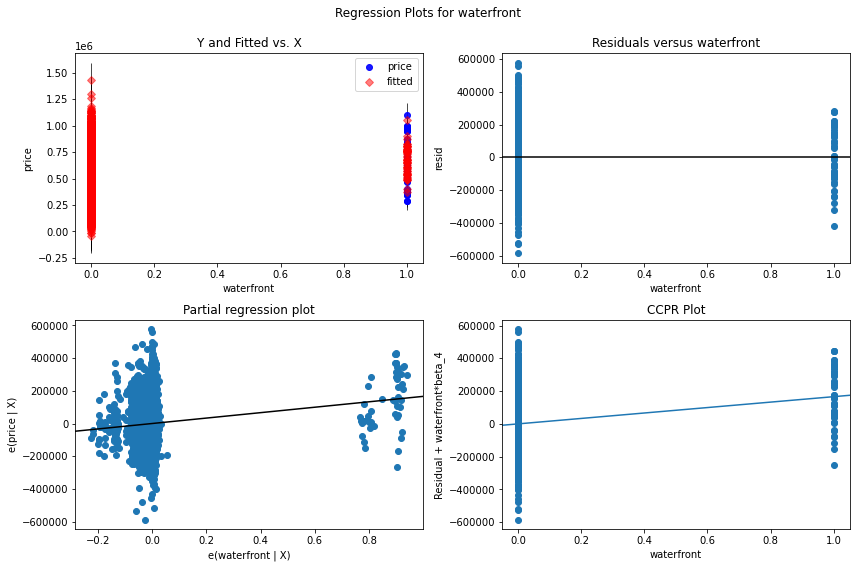

----------------------
view-----------------


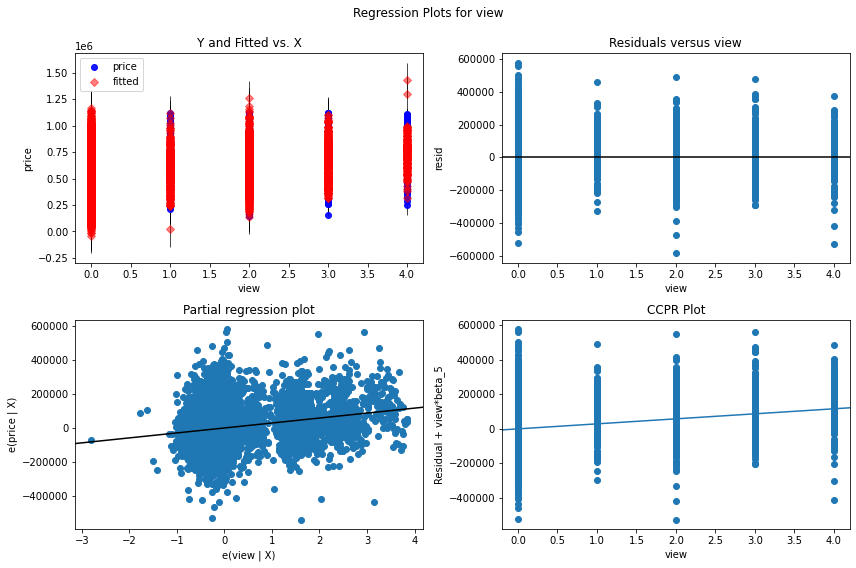

----------------------
condition-----------------


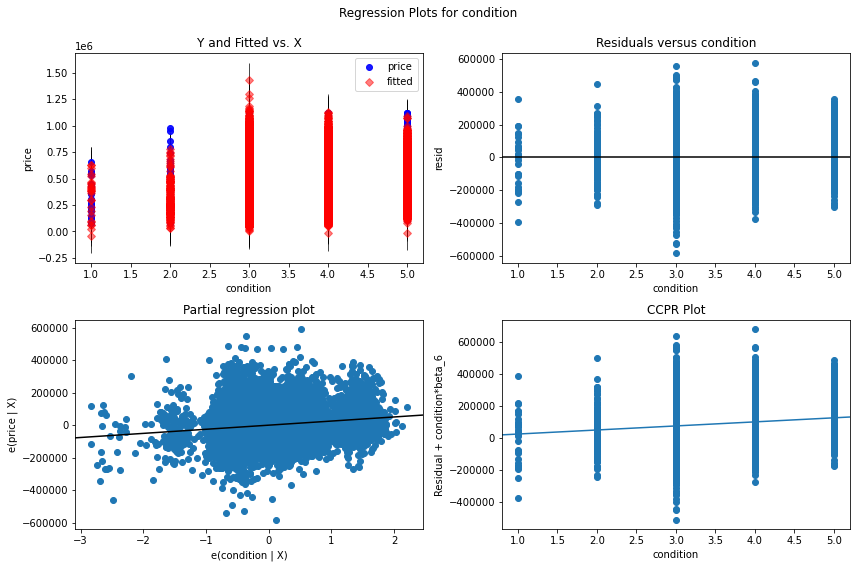

----------------------
grade-----------------


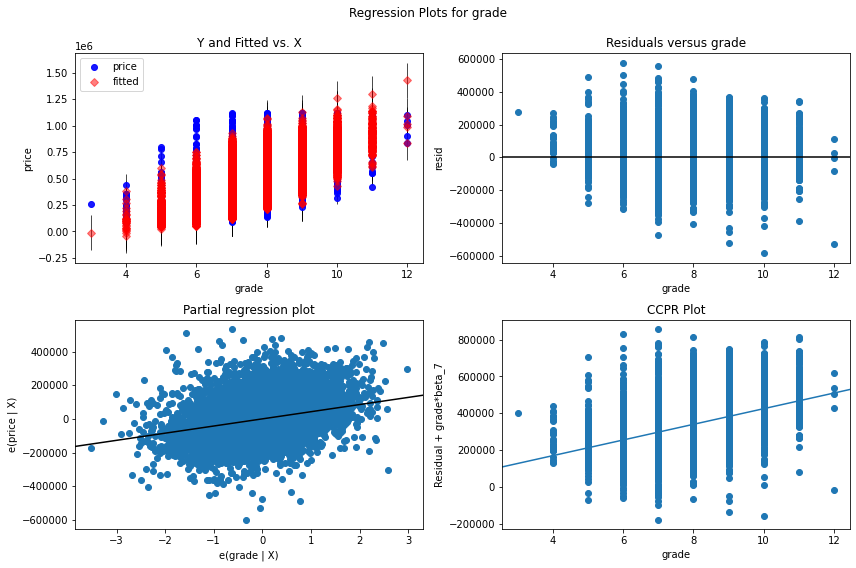

----------------------
lat-----------------


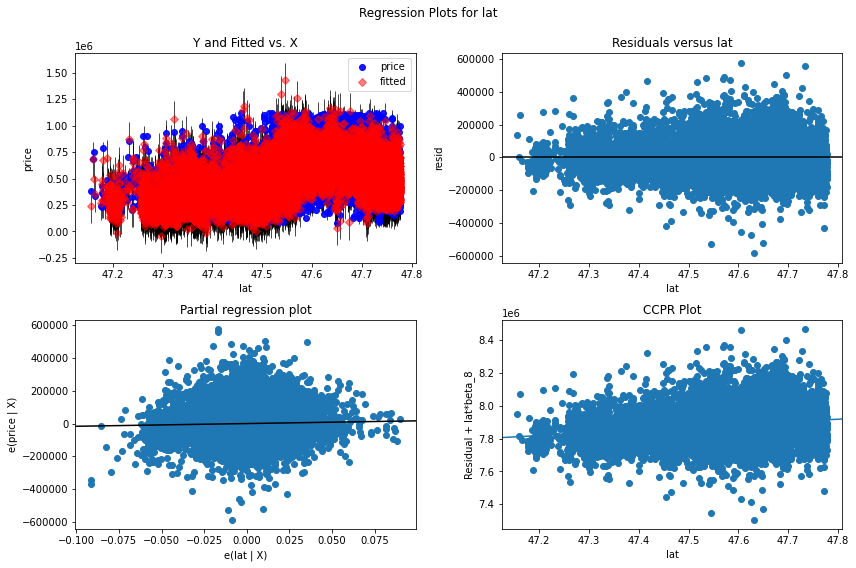

----------------------
long-----------------


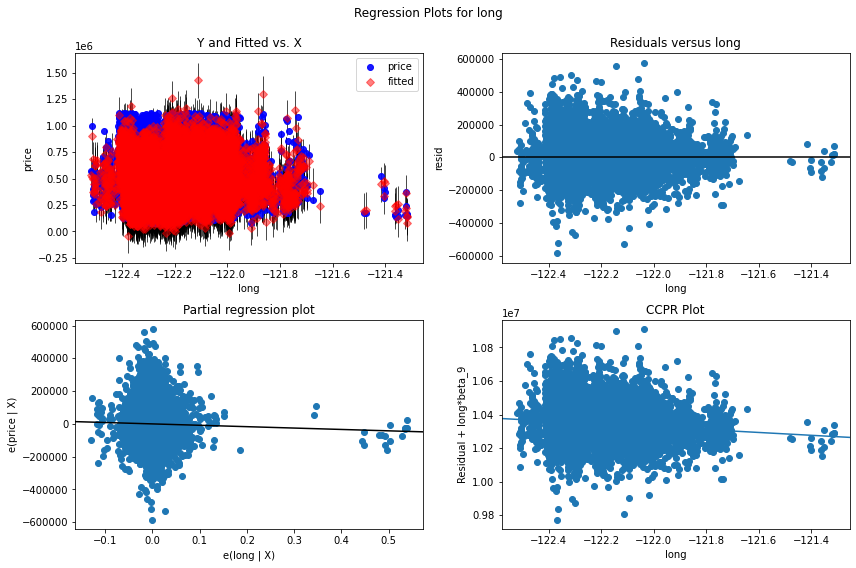

----------------------
sqft_living15-----------------


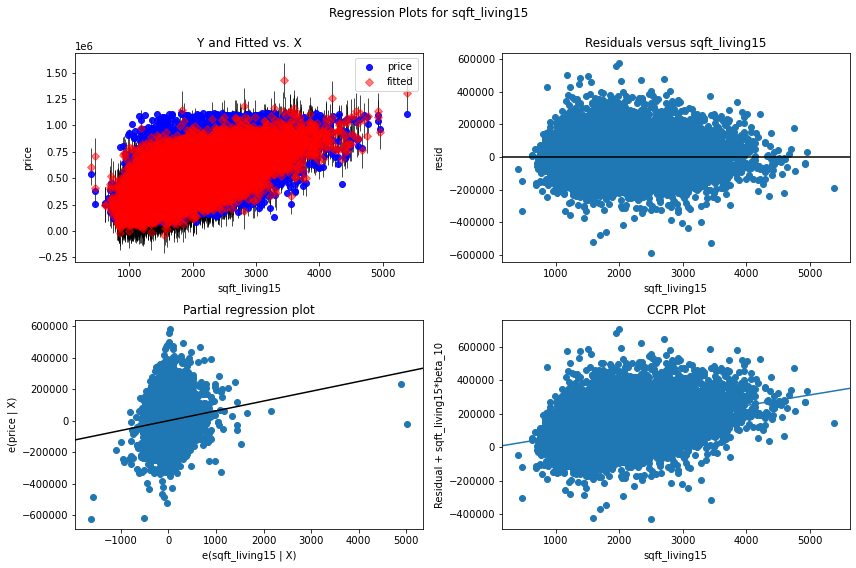

----------------------
sqft_lot15-----------------


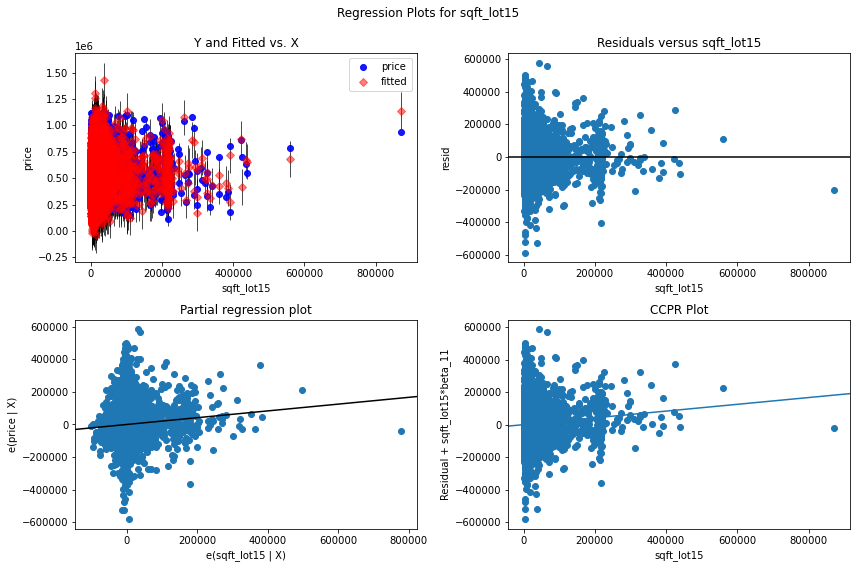

----------------------
basementyes-----------------


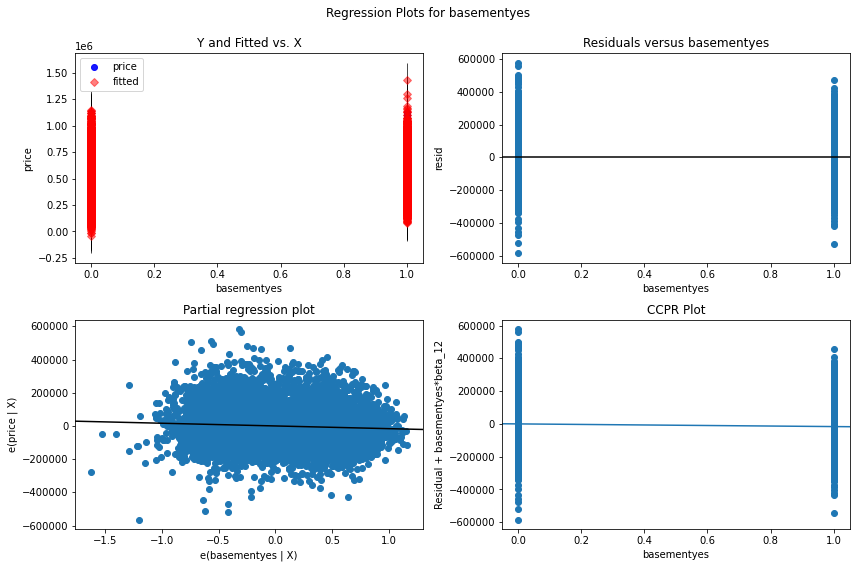

----------------------
living_vs_neighbor-----------------


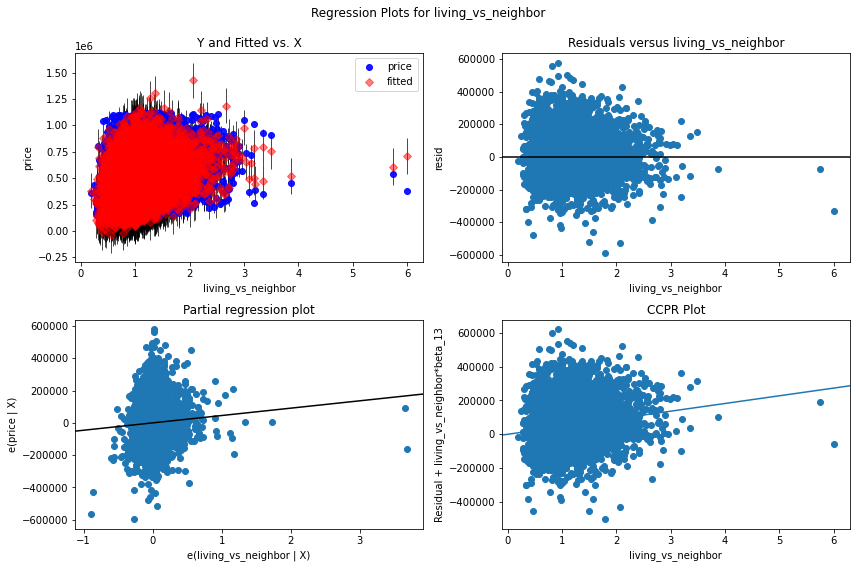

----------------------
lot_vs_neighbor-----------------


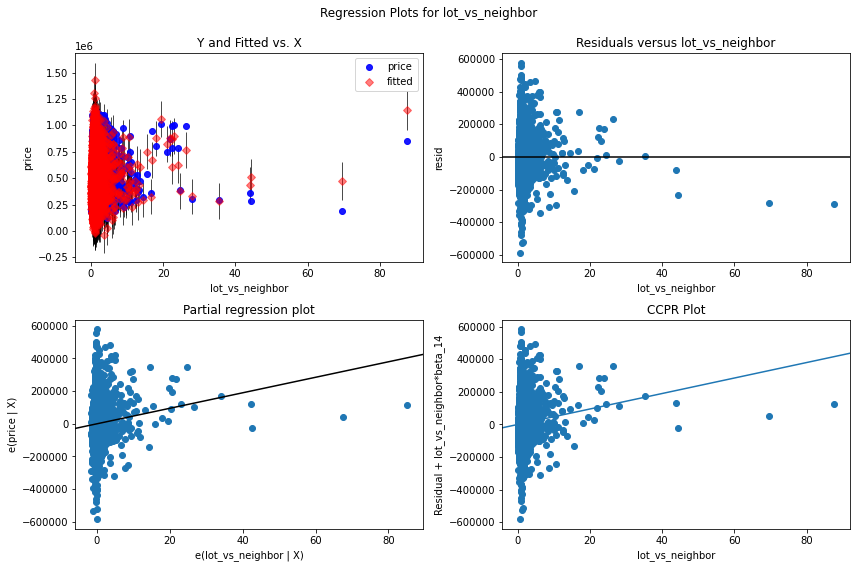

----------------------
live_lot-----------------


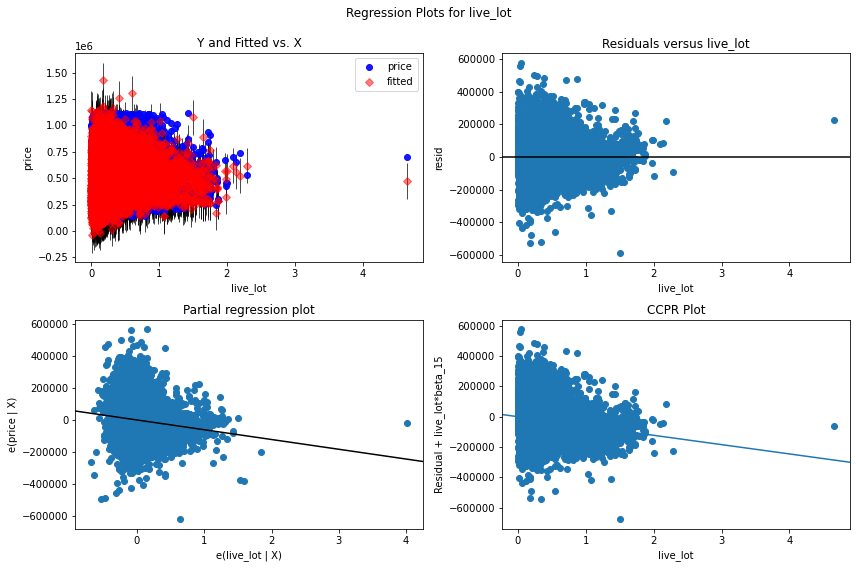

----------------------
renovated_yes-----------------


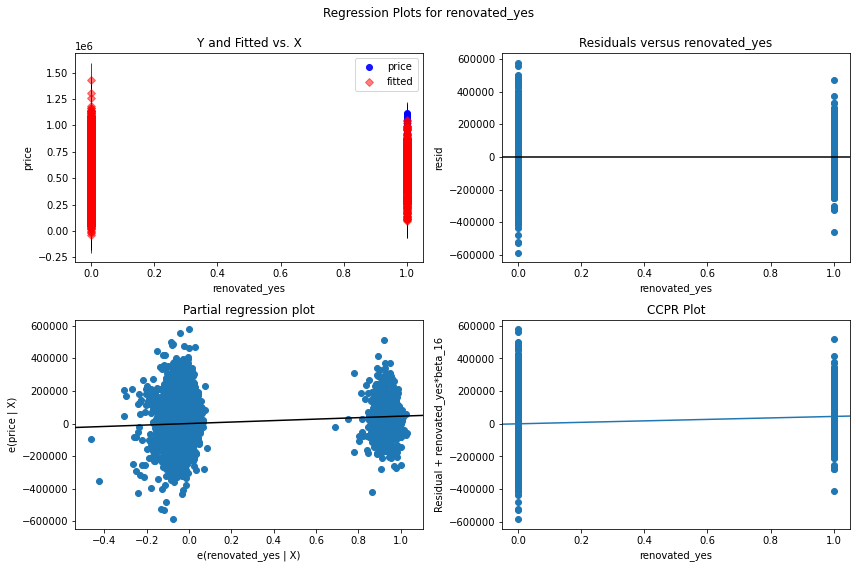

----------------------


In [150]:
exog_check =['bedrooms', 'bathrooms', 'sqft_living',
        'waterfront', 'view', 'condition', 'grade','lat',
       'long', 'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

for col in exog_check:
    print(f'{col}-----------------')
    sm.graphics.plot_regress_exog(model_iqr6, col,plt.figure(figsize=(12,8)))
    plt.show()
    print('----------------------')

### Final Model Conclusion
- R^2 0.832
- All assumptions have been met
- Using 20,235 observations

## Final Visuals

In [151]:
df_iqr_zip2 = df_iqr_zip.copy()
cols_to_scale = ['bedrooms', 'bathrooms', 'sqft_living',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes']

In [152]:
df_iqr_zip2[cols_to_scale] = scaler.fit_transform(df_iqr_zip2[cols_to_scale])


In [153]:
x_targs2 = ['bedrooms', 'bathrooms', 'sqft_living',
       'waterfront', 'view', 'condition', 'grade',
       'sqft_living15', 'sqft_lot15', 'basementyes',
       'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot', 'renovated_yes',
        'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     1199.
Date:                Mon, 19 Apr 2021   Prob (F-statistic):               0.00
Time:                        09:36:38   Log-Likelihood:            -2.5833e+05
No. Observations:               20235   AIC:                         5.168e+05
Df Residuals:                   20151   BIC:                         5.175e+05
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -4.185e+05   1.04e+04    -40.424      0.000   -4.39e+05   -3.98e+05
bedrooms           -5183.1049    906.155     -5.720      0.000   -6959.243   -3406.967
bathrooms           9577.2071   1383.300      6.923      0.000    6865.826    1.23e+04
sqft_living           77.4150      3.646     21.234      0.000      70.269      84.561
waterfront          1.658e+05   1.29e+04     12.852      0.000    1.41e+05    1.91e+05
view                2.909e+04   1034.371     28.120      0.000    2.71e+04    3.11e+04
condition           2.517e+04   1003.892     25.073      0.000    2.32e+04    2.71e+04
grade                4.26e+04    968.267     43.996      0.000    4.07e+04    4.45e+04
sqft_living15         62.5267      3.869     16.163      0.000      54.944      70.109
sqft_lot15             0.2003      0.026      7.617      0.000       0.149       0.252
basementyes        -1.609e+04   1407.154    -11.438      0.000   -1.89e+04   -1.33e+04
living_vs_neighbor  4.538e+04   6234.516      7.279      0.000    3.32e+04    5.76e+04
lot_vs_neighbor     4743.8452    490.349      9.674      0.000    3782.722    5704.969
live_lot           -6.083e+04   3080.937    -19.745      0.000   -6.69e+04   -5.48e+04
renovated_yes        4.53e+04   3537.807     12.805      0.000    3.84e+04    5.22e+04
zipcode_98002        1.37e+04   7567.377      1.811      0.070   -1128.427    2.85e+04
zipcode_98003      -2879.3072   6812.721     -0.423      0.673   -1.62e+04    1.05e+04
zipcode_98004       5.095e+05   8339.934     61.090      0.000    4.93e+05    5.26e+05
zipcode_98005       3.257e+05   8327.736     39.114      0.000    3.09e+05    3.42e+05
zipcode_98006       2.686e+05   6279.117     42.780      0.000    2.56e+05    2.81e+05
zipcode_98007        2.61e+05   8609.375     30.315      0.000    2.44e+05    2.78e+05
zipcode_98008       2.466e+05   6902.822     35.722      0.000    2.33e+05     2.6e+05
zipcode_98010       8.269e+04   9699.006      8.526      0.000    6.37e+04    1.02e+05
zipcode_98011       1.454e+05   7595.278     19.150      0.000    1.31e+05     1.6e+05
zipcode_98014       1.069e+05   9107.159     11.734      0.000     8.9e+04    1.25e+05
zipcode_98019       9.751e+04   7668.803     12.715      0.000    8.25e+04    1.13e+05
zipcode_98022       4831.3082   7259.685      0.665      0.506   -9398.268    1.91e+04
zipcode_98023      -2.154e+04   5918.246     -3.640      0.000   -3.31e+04   -9940.739
zipcode_98024       1.537e+05   1.11e+04     13.866      0.000    1.32e+05    1.75e+05
zipcode_98027       1.959e+05   6283.250     31.177      0.000    1.84e+05    2.08e+05
zipcode_98028       1.346e+05   6788.111     19.831      0.000    1.21e+05    1.48e+05
zipcode_98029       2.363e+05   6650.370     35.539      0.000    2.23e+05    2.49e+05
zipcode_98030       5444.5847   6981.7

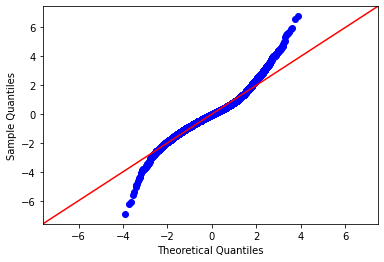

In [154]:
model_iqr7 = model_summary(df_iqr_zip, x_targs2, 'price')

In [155]:
df_coeff=pd.DataFrame({'coeff': model_iqr7.params, 'abs_coeff': abs(model_iqr7.params)})

<AxesSubplot:>

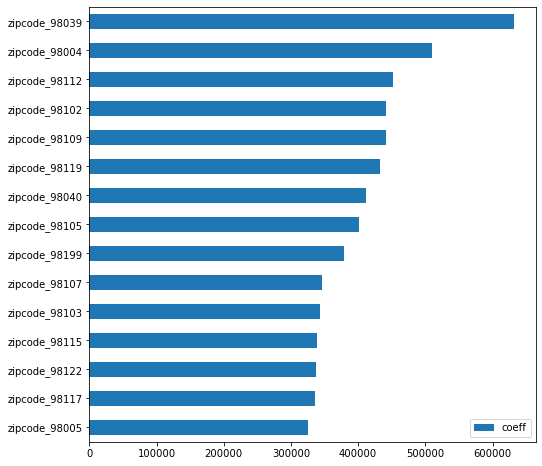

In [156]:
df_coeff.drop('Intercept', axis=0).sort_values(by='abs_coeff').tail(15).plot(kind='barh', y='coeff', figsize=(8,8))

In [157]:
df_coeff2 = df_coeff.copy()

In [158]:
df_coeff2.index
indices = ['Intercept', 'bedrooms', 'bathrooms', 'sqft_living', 'waterfront',
       'view', 'condition', 'grade', 'sqft_living15', 'sqft_lot15',
       'basementyes', 'living_vs_neighbor', 'lot_vs_neighbor', 'live_lot',
       'renovated_yes', 'zipcode_98002', 'zipcode_98003', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98022', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98030', 'zipcode_98031',
       'zipcode_98032', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98042', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zipcode_98103', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98107', 'zipcode_98108', 'zipcode_98109',
       'zipcode_98112', 'zipcode_98115', 'zipcode_98116', 'zipcode_98117',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98122', 'zipcode_98125',
       'zipcode_98126', 'zipcode_98133', 'zipcode_98136', 'zipcode_98144',
       'zipcode_98146', 'zipcode_98148', 'zipcode_98155', 'zipcode_98166',
       'zipcode_98168', 'zipcode_98177', 'zipcode_98178', 'zipcode_98188',
       'zipcode_98198', 'zipcode_98199']

In [159]:
non_zip = []
for ind in indices:
    if ind.startswith('zip') or ind.startswith('Int'):
        pass
    else:
        non_zip.append(ind)

In [160]:
df_coeff2.drop('Intercept', axis=0)

coeff    abs_coeff
bedrooms            -5183.10492   5183.10492
bathrooms            9577.20714   9577.20714
sqft_living            77.41501     77.41501
waterfront         165803.09342 165803.09342
view                29086.11252  29086.11252
condition           25170.41549  25170.41549
grade               42599.51744  42599.51744
sqft_living15          62.52671     62.52671
sqft_lot15              0.20025      0.20025
basementyes        -16094.58374  16094.58374
living_vs_neighbor  45381.65079  45381.65079
lot_vs_neighbor      4743.84521   4743.84521
live_lot           -60834.53408  60834.53408
renovated_yes       45302.24669  45302.24669
zipcode_98002       13704.24998  13704.24998
zipcode_98003       -2879.30722   2879.30722
zipcode_98004      509487.30000 509487.30000
zipcode_98005      325729.15808 325729.15808
zipcode_98006      268618.68349 268618.68349
zipcode_98007      260994.83873 260994.83873
zipcode_98008      246580.17470 246580.17470
zipcode_98010       82694.51135  82694.51135
zipcode_98011      145449.29958 145449.29958
zipcode_98014      106865.57538 106865.57538
zipcode_98019       97507.56206  97507.56206
zipcode_98022        4831.30818   4831.30818
zipcode_98023      -21540.98548  21540.98548
zipcode_98024      153700.31776 153700.31776
zipcode_98027      195891.11094 195891.11094
zipcode_98028      134617.46467 134617.46467
zipcode_98029      236347.04013 236347.04013
zipcode_98030        5444.58467   5444.58467
zipcode_98031       10341.42164  10341.42164
zipcode_98032       -2235.41645   2235.41645
zipcode_98033      323383.44539 323383.44539
zipcode_98034      190192.98414 190192.98414
zipcode_98038       38330.28035  38330.28035
zipcode_98039      632663.58591 632663.58591
zipcode_98040      412199.30611 412199.30611
zipcode_98042        7272.12249   7272.12249
zipcode_98045      106280.18019 106280.18019
zipcode_98052      256954.66612 256954.66612
zipcode_98053      239064.94860 239064.94860
zipcode_98055       49666.62070  49666.62070
zipcode_98056      105447.88981 105447.88981
zipcode_98058       39112.90646  39112.90646
zipcode_98059      105293.62653 105293.62653
zipcode_98065      130273.69581 130273.69581
zipcode_98070      108254.61129 108254.61129
zipcode_98072      173868.41607 173868.41607
zipcode_98074      221492.10955 221492.10955
zipcode_98075      232863.84639 232863.84639
zipcode_98077      171579.60758 171579.60758
zipcode_98092      -16801.69045  16801.69045
zipcode_98102      441877.52855 441877.52855
zipcode_98103      343626.81354 343626.81354
zipcode_98105      401878.69039 401878.69039
zipcode_98106      137168.70589 137168.70589
zipcode_98107      345581.39570 345581.39570
zipcode_98108      132227.09957 132227.09957
zipcode_98109      441276.32581 441276.32581
zipcode_98112      451497.85489 451497.85489
zipcode_98115      338550.71433 338550.71433
zipcode_98116      315581.20878 315581.20878
zipcode_98117      335169.28698 335169.28698
zipcode_98118      182290.81789 182290.81789
zipcode_98119      432266.59475 432266.59475
zipcode_98122      336879.98022 336879.98022
zipcode_98125      203928.49958 203928.49958
zipcode_98126      210389.69526 210389.69526
zipcode_98133      162975.13652 162975.13652
zipcode_98136      273940.22859 273940.22859
zipcode_98144      267887.62478 267887.62478
zipcode_98146      123664.80718 123664.80718
zipcode_98148       65775.41988  65775.41988
zipcode_98155      145090.16174 145090.16174
zipcode_98166      109780.66668 109780.66668
zipcode_98168       56622.79934  56622.79934
zipcode_98177      222362.33690 222362.33690
zipcode_98178       61136.71185  61136.71185
zipcode_98188       37591.37078  37591.37078
zipcode_98198       27326.98225  27326.98225
zipcode_98199      378410.39479 378410.39479

In [161]:
zips = []
for ind in indices:
    if ind.startswith('zip'):
        zips.append(ind)
    else:
        pass
zips

['zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 'zipcode_98125',
 'zipcode_

In [162]:
df_coeff3 = df_coeff2.drop((zips), axis=0)

In [163]:
df_coeff3.drop('Intercept', axis=0, inplace=True)

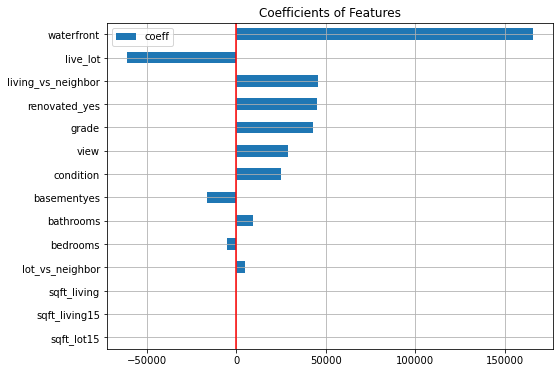

In [164]:
df_coeff3.sort_values(by='abs_coeff').tail(30).plot(kind='barh', y='coeff', figsize=(8,6))
plt.axvline(0, c='red')
plt.title('Coefficients of Features')
plt.grid()

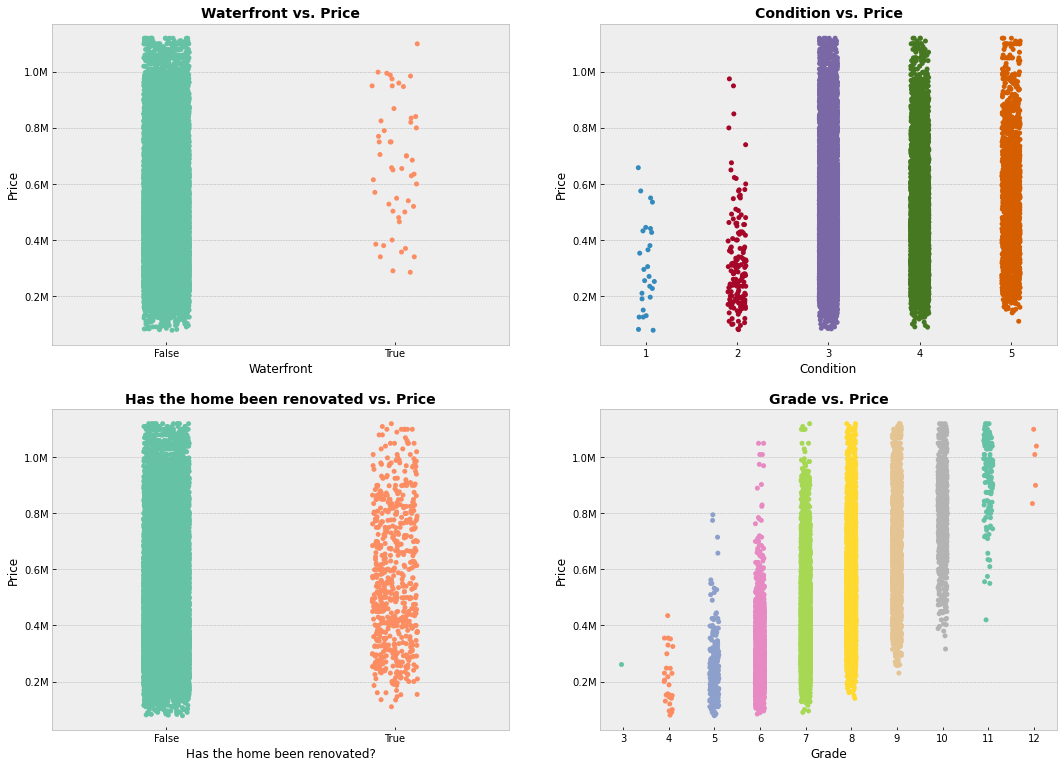

In [165]:
# Variables in the owners control

from matplotlib.ticker import FuncFormatter

def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)

with plt.style.context('bmh'):

    fig, axs=plt.subplots(nrows=2, ncols=2, figsize=(18,13))

    sns.stripplot(data=df_iqr_zip, x='waterfront', y='price', ax=axs[0,0], palette="Set2")
    sns.stripplot(data=df_iqr_zip, x='condition', y='price', ax=axs[0,1])
    sns.stripplot(data=df_iqr_zip, x='renovated_yes', y='price', ax=axs[1,0], palette="Set2")
    sns.stripplot(data=df_iqr_zip, x='grade', y='price',ax=axs[1,1], palette="Set2")
    
    tf_labs = ['False', 'True']
    
    axs[0,0].set_title('Waterfront vs. Price', fontsize=14, fontweight='bold')
    axs[0,0].set_xlabel('Waterfront')
    axs[0,0].set_ylabel('Price')
    axs[0,0].set_xticklabels(tf_labs)
    
    axs[0,1].set_title('Condition vs. Price',fontsize=14, fontweight='bold')
    axs[0,1].set_xlabel('Condition')
    axs[0,1].set_ylabel('Price')
    
    axs[1,0].set_title('Has the home been renovated vs. Price', fontsize=14, fontweight='bold')
    axs[1,0].set_xlabel('Has the home been renovated?')
    axs[1,0].set_ylabel('Price')
    axs[1,0].set_xticklabels(tf_labs)
    
    axs[1,1].set_title('Grade vs. Price', fontsize=14, fontweight='bold')
    axs[1,1].set_xlabel('Grade')
    axs[1,1].set_ylabel('Price')
    
    
    
    formatter = FuncFormatter(millions)
    axs[0,0].yaxis.set_major_formatter(formatter)
    axs[0,1].yaxis.set_major_formatter(formatter)
    axs[1,0].yaxis.set_major_formatter(formatter)
    axs[1,1].yaxis.set_major_formatter(formatter)



## Additional Visualizations for Presentation

In [166]:
# Plot Home prices over time
df_price = df_iqr_zip2.copy()
df_price = df_price.set_index('date')
df_price = df_price.reset_index()


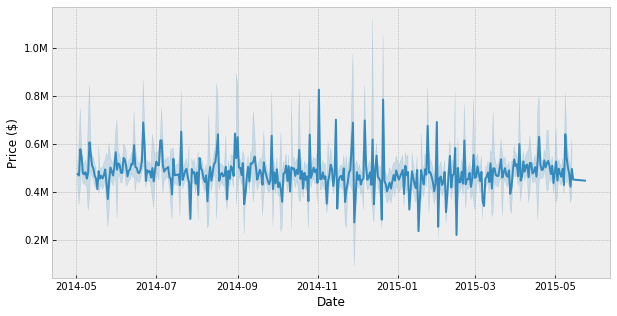

In [167]:
# Not using title because this is only going in PPT

with plt.style.context('bmh'):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.lineplot(data=df_price, x='date', y='price')

    formatter = FuncFormatter(millions)
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylabel('Price ($)')
    ax.set_xlabel('Date')
